# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os 
import glob
from skimage import io
from skimage import color, exposure, transform
import pandas as pd
import numpy as np

def Image_transform(img,ROI):
    # Histogram normalization in v channel
    #hsv = color.rgb2hsv(img)
    #hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
    #img = color.hsv2rgb(hsv)

    # Focus on Region of interest 
    img = img[int(ROI[1]): int(ROI[3]), int(ROI[0]): int(ROI[2]), :]
    
    # rescale to standard size
    size = 32
    img = transform.resize(img, (size, size))

    # roll color axis to axis 0
    #img = np.rollaxis(img, -1)
    #(32,32,3) -> (3,32,32)

    return img    

# Load training data

file_dir_name = 'GTSRB_Final_Training_Images/GTSRB/Final_Training/Images'

all_img_paths = glob.glob(os.path.join(file_dir_name, '*/*.ppm'))
np.random.shuffle(all_img_paths)

train_number = int(0.7*len(all_img_paths))
train_img_paths = all_img_paths[:train_number]
validation_img_paths = all_img_paths[train_number + 1 :]

train_imgs = []
train_labels = []
ROI = []

for img_path in train_img_paths:
    ROI = []
    data = pd.read_csv(file_dir_name + '/' + img_path.split('\\')[1] + '/GT-' + img_path.split('\\')[1] + '.csv')
    print(img_path.split('\\')[1])
    print(img_path.split('\\')[2])
    for i in range(int(data.shape[0])):
        temp = str(data.at[i,"Filename;Width;Height;Roi.X1;Roi.Y1;Roi.X2;Roi.Y2;ClassId"])
        if img_path.split('\\')[2] == temp.split(";")[0]:
            label = int(temp.split(";")[7])
            ROI.extend((temp.split(";")[3],temp.split(";")[4],temp.split(";")[5],temp.split(";")[6]))
            print(ROI)
            break;
    img = Image_transform(io.imread(img_path),ROI)
    train_imgs.append(img)
    train_labels.append(label)
    
# Load validation data
    
validation_imgs = []
validation_labels = []
ROI = []

for img_path in validation_img_paths:
    ROI = []
    data = pd.read_csv(file_dir_name + '/' + img_path.split('\\')[1] + '/GT-' + img_path.split('\\')[1] + '.csv')
    print(img_path.split('\\')[1])
    print(img_path.split('\\')[2])
    for i in range(int(data.shape[0])):
        temp = str(data.at[i,"Filename;Width;Height;Roi.X1;Roi.Y1;Roi.X2;Roi.Y2;ClassId"])
        if img_path.split('\\')[2] == temp.split(";")[0]:
            label = int(temp.split(";")[7])
            ROI.extend((temp.split(";")[3],temp.split(";")[4],temp.split(";")[5],temp.split(";")[6]))
            print(ROI)
            break;
    img = Image_transform(io.imread(img_path),ROI)
    validation_imgs.append(img)
    validation_labels.append(label)
    
# Load testing data

test_imgs = []
ROI = []

test_dir_name = 'GTSRB_Final_Test_Images\GTSRB\Final_Test'
test_img_paths = glob.glob(os.path.join(test_dir_name, '*/*.ppm'))
data = pd.read_csv(test_dir_name +  '/Images/GT-final_test.test.csv')
ppm_count = 0
for img_path in test_img_paths:
    ROI = []
    temp = str(data.at[ppm_count,"Filename;Width;Height;Roi.X1;Roi.Y1;Roi.X2;Roi.Y2"])
    ROI.extend((temp.split(";")[3],temp.split(";")[4],temp.split(";")[5],temp.split(";")[6]))
    print(ROI)
    img = Image_transform(io.imread(img_path),ROI)
    test_imgs.append(img)
    ppm_count += 1
    
# Load label csv 
label = pd.read_csv('signnames.csv')
label_count = label.shape[0]

"""training_file = ?
validation_file=?
testing_file = ?

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']"""
# This cell takes ten minutes to load the data

00015
00009_00009.ppm
['6', '5', '38', '37']
00018
00039_00013.ppm
['6', '6', '47', '43']
00013
00030_00009.ppm
['5', '5', '35', '33']
00031
00024_00028.ppm
['7', '5', '65', '59']
00003
00022_00003.ppm
['5', '6', '23', '26']
00032
00004_00020.ppm
['6', '5', '43', '42']
00026
00004_00018.ppm
['5', '6', '52', '48']
00038
00061_00022.ppm
['5', '5', '38', '38']
00005
00028_00023.ppm
['6', '6', '46', '42']
00024
00005_00023.ppm
['5', '6', '46', '44']
00007
00006_00020.ppm
['5', '5', '52', '52']
00028
00014_00005.ppm
['6', '5', '34', '32']
00038
00064_00015.ppm
['6', '5', '35', '36']
00002
00070_00007.ppm
['5', '5', '26', '26']
00026
00002_00023.ppm
['6', '5', '40', '35']
00033
00004_00015.ppm
['6', '5', '37', '37']
00025
00033_00028.ppm
['8', '8', '90', '84']
00014
00004_00002.ppm
['5', '6', '32', '35']
00034
00013_00001.ppm
['5', '5', '32', '33']
00013
00070_00000.ppm
['7', '6', '62', '56']
00030
00009_00023.ppm
['9', '7', '88', '78']
00014
00022_00027.ppm
['8', '11', '89', '114']


D:\ProgramData\Anaconda3\envs\sign\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


00002
00047_00013.ppm
['5', '5', '24', '24']
00001
00010_00029.ppm
['7', '8', '77', '79']
00008
00016_00027.ppm
['5', '6', '51', '52']
00002
00039_00024.ppm
['6', '5', '44', '44']
00017
00030_00005.ppm
['6', '5', '40', '41']
00008
00029_00017.ppm
['5', '5', '41', '41']
00009
00023_00011.ppm
['5', '5', '28', '29']
00012
00021_00022.ppm
['5', '5', '53', '55']
00042
00004_00000.ppm
['5', '5', '26', '26']
00015
00001_00022.ppm
['6', '10', '46', '99']
00018
00019_00012.ppm
['6', '5', '46', '45']
00008
00041_00026.ppm
['5', '5', '49', '49']
00033
00006_00011.ppm
['6', '5', '32', '32']
00001
00029_00014.ppm
['5', '6', '40', '41']
00014
00013_00025.ppm
['11', '11', '111', '112']
00001
00015_00003.ppm
['5', '5', '21', '22']
00020
00005_00014.ppm
['6', '6', '34', '31']
00010
00056_00002.ppm
['6', '5', '25', '24']
00007
00005_00002.ppm
['5', '5', '28', '28']
00004
00001_00025.ppm
['5', '6', '53', '55']
00001
00043_00000.ppm
['6', '5', '34', '33']
00008
00007_00015.ppm
['5', '6', '35', '36']
00037

00025
00012_00007.ppm
['5', '5', '53', '49']
00042
00002_00014.ppm
['5', '5', '29', '29']
00026
00006_00028.ppm
['8', '7', '86', '80']
00006
00003_00010.ppm
['5', '5', '26', '28']
00002
00013_00024.ppm
['5', '6', '36', '39']
00005
00037_00009.ppm
['5', '5', '25', '23']
00034
00010_00023.ppm
['6', '6', '42', '50']
00017
00005_00020.ppm
['6', '5', '38', '37']
00016
00006_00007.ppm
['7', '8', '73', '74']
00014
00016_00025.ppm
['8', '8', '81', '81']
00010
00026_00010.ppm
['6', '5', '28', '27']
00012
00055_00024.ppm
['6', '6', '63', '63']
00013
00059_00000.ppm
['7', '7', '80', '74']
00018
00028_00005.ppm
['5', '6', '33', '34']
00012
00044_00020.ppm
['5', '5', '48', '48']
00002
00018_00029.ppm
['11', '10', '110', '107']
00037
00002_00003.ppm
['5', '5', '22', '22']
00004
00011_00024.ppm
['6', '6', '52', '54']
00020
00001_00018.ppm
['5', '6', '40', '37']
00004
00047_00015.ppm
['5', '5', '47', '46']
00023
00016_00002.ppm
['5', '5', '35', '33']
00002
00047_00027.ppm
['5', '6', '38', '40']
00038


['5', '6', '45', '46']
00005
00030_00023.ppm
['5', '5', '42', '41']
00014
00019_00023.ppm
['9', '8', '89', '91']
00023
00006_00001.ppm
['6', '6', '32', '28']
00041
00001_00024.ppm
['6', '5', '47', '49']
00005
00004_00023.ppm
['6', '6', '47', '49']
00005
00003_00004.ppm
['6', '5', '24', '22']
00002
00012_00025.ppm
['10', '9', '95', '88']
00025
00025_00023.ppm
['6', '6', '56', '52']
00023
00014_00015.ppm
['8', '6', '79', '70']
00018
00009_00024.ppm
['6', '6', '44', '40']
00009
00027_00022.ppm
['5', '6', '43', '42']
00009
00009_00025.ppm
['7', '6', '69', '68']
00009
00022_00012.ppm
['6', '6', '34', '34']
00001
00033_00024.ppm
['5', '5', '50', '48']
00005
00035_00014.ppm
['5', '5', '36', '35']
00025
00018_00025.ppm
['8', '7', '77', '68']
00033
00017_00015.ppm
['5', '6', '33', '44']
00025
00045_00028.ppm
['6', '6', '68', '64']
00017
00024_00001.ppm
['5', '6', '23', '23']
00017
00001_00018.ppm
['6', '5', '32', '31']
00007
00036_00018.ppm
['5', '5', '38', '35']
00013
00024_00006.ppm
['5', '6'

['6', '6', '28', '28']
00013
00062_00009.ppm
['5', '6', '33', '33']
00025
00031_00009.ppm
['5', '6', '32', '33']
00012
00003_00015.ppm
['6', '6', '42', '41']
00024
00002_00029.ppm
['7', '6', '69', '63']
00001
00038_00023.ppm
['6', '6', '37', '39']
00004
00052_00027.ppm
['5', '5', '54', '54']
00010
00033_00027.ppm
['5', '5', '57', '51']
00038
00041_00005.ppm
['5', '6', '22', '26']
00005
00013_00019.ppm
['5', '6', '40', '41']
00025
00014_00017.ppm
['5', '6', '50', '47']
00038
00016_00025.ppm
['6', '6', '54', '68']
00002
00009_00006.ppm
['5', '6', '38', '38']
00005
00015_00023.ppm
['6', '7', '66', '69']
00033
00002_00006.ppm
['5', '6', '35', '35']
00007
00039_00013.ppm
['5', '6', '31', '32']
00003
00011_00017.ppm
['6', '5', '39', '39']
00021
00008_00021.ppm
['8', '6', '88', '69']
00008
00007_00023.ppm
['5', '5', '44', '44']
00005
00019_00019.ppm
['6', '6', '43', '43']
00008
00037_00013.ppm
['5', '6', '32', '33']
00008
00043_00001.ppm
['6', '6', '23', '23']
00005
00035_00011.ppm
['5', '5',

['6', '6', '50', '50']
00005
00061_00013.ppm
['6', '6', '28', '28']
00012
00033_00005.ppm
['5', '6', '32', '36']
00012
00022_00028.ppm
['6', '6', '67', '64']
00018
00028_00029.ppm
['9', '10', '86', '100']
00009
00001_00010.ppm
['6', '6', '28', '28']
00025
00000_00028.ppm
['10', '9', '102', '94']
00035
00019_00020.ppm
['6', '6', '36', '37']
00028
00007_00021.ppm
['8', '7', '78', '67']
00011
00002_00016.ppm
['9', '9', '103', '94']
00007
00034_00010.ppm
['6', '6', '28', '31']
00017
00027_00019.ppm
['6', '6', '39', '42']
00001
00064_00024.ppm
['5', '6', '59', '61']
00013
00009_00029.ppm
['7', '8', '76', '73']
00004
00009_00029.ppm
['6', '6', '60', '59']
00001
00032_00018.ppm
['5', '6', '47', '48']
00027
00004_00006.ppm
['6', '5', '38', '35']
00010
00027_00007.ppm
['6', '6', '26', '28']
00002
00061_00020.ppm
['5', '5', '57', '58']
00026
00009_00020.ppm
['5', '5', '46', '42']
00025
00042_00023.ppm
['6', '6', '69', '62']
00013
00015_00019.ppm
['8', '9', '89', '85']
00013
00069_00025.ppm
['5',

['5', '5', '25', '22']
00031
00017_00011.ppm
['6', '6', '64', '58']
00012
00037_00020.ppm
['7', '6', '69', '68']
00001
00011_00029.ppm
['11', '10', '111', '113']
00003
00023_00001.ppm
['5', '6', '23', '24']
00018
00005_00025.ppm
['12', '12', '129', '120']
00007
00036_00028.ppm
['7', '6', '71', '69']
00014
00025_00007.ppm
['6', '5', '26', '28']
00018
00036_00026.ppm
['9', '9', '94', '96']
00013
00024_00018.ppm
['5', '5', '53', '48']
00004
00017_00011.ppm
['6', '5', '29', '29']
00025
00043_00007.ppm
['5', '5', '34', '32']
00012
00038_00004.ppm
['6', '6', '30', '30']
00034
00009_00012.ppm
['6', '6', '33', '33']
00013
00062_00029.ppm
['13', '12', '141', '127']
00005
00060_00021.ppm
['5', '6', '30', '35']
00003
00018_00027.ppm
['8', '8', '87', '87']
00001
00050_00005.ppm
['6', '5', '35', '32']
00014
00011_00002.ppm
['6', '5', '38', '37']
00001
00043_00001.ppm
['6', '5', '34', '33']
00006
00002_00007.ppm
['6', '5', '28', '28']
00011
00021_00025.ppm
['7', '5', '64', '54']
00016
00005_00005.pp

00002
00060_00006.ppm
['6', '5', '50', '49']
00005
00043_00018.ppm
['5', '5', '35', '35']
00038
00014_00022.ppm
['5', '5', '41', '46']
00012
00010_00019.ppm
['5', '6', '54', '46']
00007
00043_00019.ppm
['5', '6', '36', '38']
00013
00026_00016.ppm
['6', '5', '41', '54']
00011
00027_00009.ppm
['6', '6', '51', '44']
00023
00015_00004.ppm
['6', '5', '38', '34']
00015
00001_00004.ppm
['5', '5', '22', '53']
00004
00041_00012.ppm
['6', '6', '31', '31']
00014
00007_00008.ppm
['6', '6', '37', '36']
00013
00016_00022.ppm
['6', '6', '69', '65']
00005
00005_00008.ppm
['5', '5', '25', '25']
00001
00040_00013.ppm
['5', '6', '39', '42']
00011
00029_00013.ppm
['6', '6', '61', '56']
00015
00006_00014.ppm
['6', '5', '33', '32']
00018
00002_00026.ppm
['6', '6', '69', '65']
00042
00001_00001.ppm
['5', '6', '23', '24']
00011
00017_00016.ppm
['5', '6', '38', '36']
00028
00009_00010.ppm
['6', '5', '39', '37']
00008
00042_00015.ppm
['5', '5', '35', '35']
00001
00030_00017.ppm
['5', '5', '39', '53']
00031
0000

00033
00017_00018.ppm
['5', '5', '36', '50']
00007
00021_00018.ppm
['6', '6', '37', '36']
00032
00004_00028.ppm
['9', '9', '86', '86']
00015
00004_00023.ppm
['5', '6', '48', '50']
00025
00046_00029.ppm
['9', '9', '97', '96']
00005
00043_00017.ppm
['6', '6', '35', '35']
00002
00053_00024.ppm
['5', '6', '45', '45']
00015
00011_00019.ppm
['6', '5', '50', '55']
00005
00004_00006.ppm
['6', '5', '25', '25']
00031
00003_00009.ppm
['6', '5', '41', '36']
00008
00035_00018.ppm
['5', '6', '37', '38']
00007
00006_00024.ppm
['7', '7', '64', '64']
00012
00051_00020.ppm
['6', '5', '41', '41']
00018
00013_00006.ppm
['5', '5', '38', '38']
00007
00007_00006.ppm
['5', '6', '30', '31']
00033
00020_00011.ppm
['6', '6', '31', '31']
00009
00009_00006.ppm
['6', '5', '28', '29']
00002
00052_00005.ppm
['5', '5', '50', '50']
00011
00024_00002.ppm
['5', '5', '27', '27']
00022
00005_00012.ppm
['5', '5', '34', '31']
00000
00003_00016.ppm
['6', '6', '38', '38']
00013
00060_00019.ppm
['5', '6', '57', '55']
00004
0002

00011
00012_00017.ppm
['5', '5', '57', '54']
00001
00045_00013.ppm
['6', '5', '47', '46']
00009
00026_00020.ppm
['7', '8', '77', '76']
00017
00004_00004.ppm
['6', '6', '36', '40']
00014
00023_00020.ppm
['6', '6', '58', '60']
00003
00036_00010.ppm
['5', '5', '28', '29']
00015
00000_00022.ppm
['6', '6', '49', '49']
00007
00032_00028.ppm
['10', '10', '105', '105']
00040
00005_00004.ppm
['6', '5', '50', '47']
00002
00068_00023.ppm
['6', '6', '54', '54']
00038
00009_00023.ppm
['5', '5', '52', '56']
00038
00031_00029.ppm
['10', '10', '103', '103']
00002
00045_00018.ppm
['5', '5', '35', '34']
00028
00010_00025.ppm
['9', '8', '95', '81']
00009
00000_00001.ppm
['6', '6', '29', '29']
00005
00027_00008.ppm
['6', '6', '26', '26']
00008
00007_00027.ppm
['6', '5', '54', '53']
00010
00023_00019.ppm
['6', '6', '39', '40']
00004
00028_00000.ppm
['5', '6', '25', '26']
00013
00037_00001.ppm
['5', '5', '30', '30']
00010
00009_00018.ppm
['5', '6', '37', '38']
00003
00028_00029.ppm
['6', '6', '56', '60']
00

['6', '5', '37', '38']
00010
00006_00029.ppm
['5', '5', '59', '59']
00018
00015_00025.ppm
['9', '8', '86', '85']
00004
00047_00018.ppm
['5', '6', '53', '51']
00001
00024_00007.ppm
['5', '5', '21', '22']
00018
00036_00027.ppm
['9', '10', '98', '102']
00025
00033_00018.ppm
['6', '5', '50', '45']
00013
00020_00008.ppm
['5', '5', '40', '37']
00010
00065_00008.ppm
['6', '5', '26', '24']
00011
00000_00025.ppm
['7', '7', '75', '71']
00021
00010_00022.ppm
['5', '5', '56', '52']
00012
00013_00021.ppm
['5', '6', '40', '41']
00024
00008_00014.ppm
['6', '6', '42', '45']
00003
00044_00024.ppm
['6', '6', '57', '56']
00020
00004_00012.ppm
['5', '5', '31', '31']
00004
00022_00019.ppm
['6', '6', '35', '35']
00041
00007_00021.ppm
['5', '6', '45', '46']
00001
00064_00019.ppm
['6', '5', '43', '43']
00017
00034_00009.ppm
['6', '5', '26', '26']
00038
00027_00014.ppm
['5', '6', '25', '27']
00010
00049_00019.ppm
['5', '6', '37', '38']
00003
00007_00002.ppm
['6', '5', '23', '22']
00009
00010_00008.ppm
['6', '6

00007
00028_00028.ppm
['5', '6', '44', '50']
00035
00002_00008.ppm
['6', '5', '29', '29']
00004
00004_00013.ppm
['5', '6', '52', '52']
00002
00021_00020.ppm
['5', '6', '36', '38']
00024
00000_00003.ppm
['5', '5', '21', '22']
00009
00025_00025.ppm
['5', '5', '58', '58']
00019
00006_00013.ppm
['5', '5', '42', '38']
00003
00006_00001.ppm
['6', '6', '39', '41']
00013
00000_00016.ppm
['5', '5', '37', '35']
00010
00057_00010.ppm
['6', '6', '34', '32']
00007
00004_00024.ppm
['5', '6', '57', '58']
00027
00005_00002.ppm
['5', '5', '23', '21']
00001
00037_00020.ppm
['5', '6', '40', '41']
00009
00041_00027.ppm
['5', '6', '39', '42']
00014
00015_00003.ppm
['6', '5', '30', '29']
00001
00071_00020.ppm
['6', '6', '55', '55']
00034
00007_00006.ppm
['6', '6', '24', '24']
00031
00014_00016.ppm
['6', '6', '53', '49']
00009
00028_00026.ppm
['8', '9', '90', '89']
00008
00033_00017.ppm
['6', '5', '31', '31']
00014
00006_00026.ppm
['8', '9', '83', '87']
00023
00001_00016.ppm
['10', '8', '97', '85']
00009
000

00026
00006_00024.ppm
['6', '6', '59', '55']
00017
00013_00026.ppm
['6', '6', '28', '35']
00007
00008_00009.ppm
['6', '5', '30', '30']
00013
00053_00014.ppm
['6', '5', '57', '49']
00011
00006_00024.ppm
['6', '6', '51', '45']
00005
00029_00009.ppm
['5', '6', '27', '29']
00004
00047_00014.ppm
['6', '6', '47', '46']
00010
00053_00024.ppm
['8', '8', '80', '83']
00018
00016_00029.ppm
['6', '6', '65', '60']
00002
00019_00010.ppm
['6', '5', '33', '33']
00004
00041_00004.ppm
['6', '5', '27', '26']
00025
00005_00021.ppm
['6', '6', '59', '55']
00012
00033_00023.ppm
['5', '5', '51', '56']
00003
00004_00024.ppm
['5', '5', '48', '49']
00020
00011_00020.ppm
['6', '6', '43', '41']
00002
00071_00017.ppm
['5', '6', '28', '29']
00004
00060_00003.ppm
['6', '5', '26', '25']
00008
00024_00005.ppm
['6', '6', '31', '31']
00004
00042_00009.ppm
['6', '5', '28', '28']
00017
00006_00014.ppm
['6', '5', '34', '34']
00026
00001_00023.ppm
['6', '7', '67', '65']
00013
00050_00017.ppm
['6', '6', '45', '48']
00025
0002

00001
00047_00015.ppm
['6', '6', '41', '41']
00012
00028_00004.ppm
['5', '6', '23', '24']
00002
00038_00005.ppm
['5', '5', '43', '45']
00013
00015_00007.ppm
['7', '6', '66', '61']
00009
00019_00000.ppm
['6', '6', '22', '24']
00026
00008_00016.ppm
['6', '5', '44', '38']
00012
00009_00017.ppm
['5', '5', '40', '39']
00037
00000_00004.ppm
['6', '5', '33', '32']
00014
00020_00023.ppm
['10', '9', '104', '101']
00034
00004_00015.ppm
['6', '6', '60', '60']
00010
00009_00014.ppm
['6', '5', '35', '34']
00007
00001_00026.ppm
['5', '5', '37', '35']
00018
00012_00028.ppm
['5', '5', '49', '45']
00011
00008_00013.ppm
['6', '6', '58', '51']
00004
00051_00002.ppm
['6', '6', '25', '25']
00004
00035_00023.ppm
['5', '6', '56', '59']
00009
00022_00015.ppm
['5', '5', '35', '37']
00025
00028_00021.ppm
['7', '7', '81', '76']
00004
00049_00021.ppm
['5', '6', '38', '40']
00033
00021_00016.ppm
['6', '5', '37', '39']
00005
00049_00010.ppm
['5', '6', '29', '31']
00035
00027_00006.ppm
['6', '5', '27', '27']
00008
0

['5', '5', '39', '36']
00038
00006_00021.ppm
['7', '8', '66', '81']
00042
00001_00027.ppm
['7', '8', '80', '78']
00033
00001_00018.ppm
['5', '5', '37', '38']
00012
00056_00003.ppm
['6', '6', '36', '36']
00003
00003_00007.ppm
['5', '5', '29', '30']
00004
00037_00009.ppm
['6', '5', '31', '30']
00038
00011_00024.ppm
['7', '6', '64', '63']
00002
00025_00023.ppm
['6', '5', '48', '47']
00023
00016_00017.ppm
['5', '6', '48', '48']
00018
00028_00024.ppm
['7', '6', '65', '70']
00004
00060_00005.ppm
['5', '5', '27', '27']
00037
00001_00005.ppm
['5', '6', '26', '27']
00018
00029_00017.ppm
['6', '5', '51', '44']
00003
00001_00009.ppm
['6', '6', '28', '28']
00013
00034_00011.ppm
['6', '5', '33', '30']
00029
00003_00028.ppm
['10', '8', '97', '89']
00040
00009_00022.ppm
['5', '6', '50', '50']
00030
00011_00023.ppm
['6', '7', '68', '70']
00018
00020_00023.ppm
['10', '10', '106', '97']
00007
00030_00028.ppm
['5', '6', '41', '42']
00001
00063_00019.ppm
['5', '6', '41', '42']
00026
00010_00007.ppm
['5', 

00010
00036_00006.ppm
['5', '5', '25', '21']
00002
00042_00009.ppm
['6', '5', '26', '25']
00006
00009_00005.ppm
['6', '5', '23', '24']
00010
00021_00010.ppm
['5', '5', '34', '34']
00005
00013_00010.ppm
['5', '5', '29', '29']
00020
00001_00025.ppm
['6', '6', '53', '46']
00025
00003_00023.ppm
['13', '12', '142', '127']
00007
00029_00007.ppm
['6', '5', '25', '24']
00032
00004_00013.ppm
['6', '6', '30', '30']
00002
00032_00001.ppm
['6', '6', '24', '23']
00021
00008_00023.ppm
['9', '8', '92', '75']
00004
00036_00003.ppm
['5', '6', '26', '27']
00011
00031_00006.ppm
['5', '6', '37', '36']
00008
00046_00010.ppm
['6', '5', '27', '27']
00038
00055_00011.ppm
['5', '6', '49', '52']
00015
00015_00022.ppm
['5', '5', '49', '57']
00004
00054_00016.ppm
['6', '5', '50', '51']
00002
00054_00025.ppm
['5', '6', '49', '50']
00010
00034_00006.ppm
['6', '6', '27', '25']
00010
00048_00011.ppm
['5', '5', '29', '29']
00008
00001_00026.ppm
['6', '6', '64', '62']
00030
00005_00013.ppm
['6', '5', '40', '36']
00033


['6', '6', '29', '28']
00014
00017_00013.ppm
['5', '6', '33', '34']
00021
00001_00003.ppm
['5', '6', '28', '28']
00005
00002_00014.ppm
['6', '5', '30', '29']
00033
00009_00015.ppm
['8', '8', '82', '80']
00010
00038_00002.ppm
['5', '5', '23', '23']
00008
00034_00002.ppm
['6', '5', '27', '27']
00019
00003_00026.ppm
['7', '7', '81', '73']
00001
00048_00008.ppm
['5', '6', '34', '35']
00018
00024_00024.ppm
['7', '6', '67', '64']
00014
00020_00002.ppm
['5', '5', '36', '40']
00005
00020_00008.ppm
['6', '5', '24', '23']
00004
00028_00010.ppm
['5', '5', '30', '31']
00001
00068_00002.ppm
['6', '5', '23', '22']
00014
00016_00024.ppm
['7', '8', '76', '77']
00012
00013_00013.ppm
['5', '6', '31', '32']
00039
00008_00015.ppm
['6', '6', '35', '35']
00009
00039_00001.ppm
['5', '5', '36', '36']
00016
00011_00013.ppm
['5', '5', '28', '28']
00038
00007_00018.ppm
['6', '5', '44', '43']
00013
00062_00011.ppm
['6', '6', '35', '34']
00005
00048_00002.ppm
['6', '6', '27', '27']
00013
00051_00026.ppm
['9', '7',

00001
00021_00010.ppm
['6', '6', '26', '28']
00001
00070_00009.ppm
['5', '6', '50', '56']
00038
00065_00026.ppm
['5', '5', '54', '56']
00006
00008_00017.ppm
['6', '6', '30', '34']
00005
00037_00011.ppm
['5', '5', '26', '24']
00021
00000_00012.ppm
['5', '6', '43', '41']
00012
00069_00029.ppm
['9', '10', '89', '95']
00009
00031_00014.ppm
['6', '6', '28', '28']
00001
00004_00028.ppm
['6', '6', '54', '54']
00008
00044_00000.ppm
['6', '5', '24', '25']
00002
00022_00002.ppm
['5', '6', '22', '24']
00004
00029_00007.ppm
['5', '6', '27', '28']
00033
00012_00004.ppm
['5', '6', '30', '29']
00001
00031_00021.ppm
['5', '5', '50', '50']
00013
00052_00015.ppm
['5', '6', '38', '36']
00038
00002_00022.ppm
['6', '5', '59', '58']
00013
00044_00014.ppm
['5', '6', '46', '41']
00005
00000_00007.ppm
['6', '6', '29', '30']
00018
00015_00013.ppm
['5', '5', '48', '48']
00018
00025_00021.ppm
['7', '7', '69', '65']
00005
00033_00002.ppm
['5', '5', '21', '22']
00010
00036_00009.ppm
['6', '6', '26', '23']
00018
000

00007
00045_00010.ppm
['5', '5', '26', '27']
00010
00034_00027.ppm
['7', '6', '70', '63']
00034
00005_00003.ppm
['6', '6', '24', '26']
00010
00045_00021.ppm
['5', '6', '46', '50']
00005
00015_00018.ppm
['6', '6', '48', '48']
00009
00002_00021.ppm
['5', '6', '53', '56']
00017
00008_00013.ppm
['5', '5', '23', '25']
00005
00031_00017.ppm
['5', '6', '32', '34']
00035
00027_00008.ppm
['6', '6', '27', '28']
00023
00007_00002.ppm
['5', '5', '30', '27']
00017
00033_00025.ppm
['5', '5', '32', '32']
00025
00044_00022.ppm
['7', '5', '64', '58']
00033
00008_00021.ppm
['7', '7', '67', '67']
00001
00073_00012.ppm
['6', '5', '46', '46']
00008
00040_00026.ppm
['6', '5', '48', '47']
00025
00020_00013.ppm
['5', '5', '36', '33']
00017
00000_00014.ppm
['6', '6', '23', '26']
00005
00040_00016.ppm
['5', '6', '30', '32']
00005
00044_00016.ppm
['6', '6', '40', '43']
00018
00012_00012.ppm
['6', '5', '33', '33']
00038
00005_00015.ppm
['5', '5', '33', '34']
00009
00034_00003.ppm
['5', '5', '22', '22']
00005
0003

00008
00023_00005.ppm
['6', '5', '32', '31']
00011
00021_00006.ppm
['5', '6', '28', '25']
00013
00066_00005.ppm
['6', '5', '31', '28']
00013
00020_00013.ppm
['6', '5', '47', '41']
00037
00006_00017.ppm
['6', '5', '55', '57']
00013
00037_00027.ppm
['10', '11', '111', '112']
00017
00025_00003.ppm
['5', '6', '32', '33']
00031
00025_00002.ppm
['6', '6', '33', '30']
00031
00019_00027.ppm
['7', '7', '79', '73']
00009
00044_00009.ppm
['6', '5', '28', '27']
00038
00021_00010.ppm
['6', '5', '30', '29']
00010
00052_00027.ppm
['7', '7', '68', '68']
00001
00018_00027.ppm
['9', '10', '100', '104']
00005
00010_00018.ppm
['5', '5', '35', '35']
00040
00007_00024.ppm
['5', '5', '54', '58']
00012
00005_00008.ppm
['6', '6', '47', '47']
00024
00007_00025.ppm
['10', '8', '95', '81']
00004
00034_00009.ppm
['6', '5', '30', '29']
00038
00065_00022.ppm
['6', '6', '44', '45']
00026
00014_00016.ppm
['7', '7', '70', '65']
00038
00041_00015.ppm
['5', '5', '30', '32']
00028
00013_00007.ppm
['5', '6', '42', '43']
00

['5', '6', '39', '40']
00002
00040_00018.ppm
['6', '6', '33', '33']
00006
00008_00016.ppm
['6', '6', '29', '32']
00011
00003_00009.ppm
['5', '5', '38', '35']
00005
00031_00002.ppm
['6', '6', '22', '24']
00039
00006_00016.ppm
['5', '6', '29', '30']
00007
00042_00019.ppm
['6', '6', '45', '45']
00018
00011_00025.ppm
['8', '8', '79', '73']
00029
00002_00004.ppm
['5', '6', '34', '33']
00012
00034_00015.ppm
['7', '7', '70', '70']
00012
00069_00027.ppm
['8', '7', '80', '80']
00038
00020_00001.ppm
['6', '6', '21', '21']
00008
00001_00000.ppm
['6', '5', '22', '22']
00030
00005_00008.ppm
['6', '6', '36', '32']
00026
00008_00023.ppm
['7', '5', '62', '53']
00007
00022_00028.ppm
['9', '9', '103', '101']
00012
00055_00022.ppm
['6', '6', '55', '56']
00014
00015_00009.ppm
['6', '6', '35', '35']
00013
00020_00017.ppm
['5', '6', '54', '50']
00007
00028_00006.ppm
['5', '6', '26', '28']
00012
00039_00013.ppm
['6', '5', '42', '41']
00038
00001_00006.ppm
['6', '5', '29', '35']
00033
00013_00011.ppm
['6', '6

['6', '6', '44', '44']
00004
00065_00019.ppm
['5', '5', '35', '35']
00000
00000_00006.ppm
['6', '6', '28', '28']
00003
00043_00024.ppm
['6', '5', '37', '39']
00040
00003_00016.ppm
['5', '6', '52', '51']
00005
00034_00000.ppm
['6', '6', '22', '23']
00034
00004_00026.ppm
['8', '7', '79', '78']
00038
00040_00020.ppm
['6', '7', '59', '69']
00005
00023_00002.ppm
['5', '6', '27', '28']
00035
00025_00002.ppm
['6', '5', '26', '26']
00002
00026_00007.ppm
['6', '6', '29', '30']
00015
00020_00022.ppm
['5', '6', '47', '50']
00004
00025_00023.ppm
['6', '6', '63', '62']
00038
00031_00028.ppm
['10', '9', '98', '97']
00011
00021_00008.ppm
['5', '5', '29', '25']
00004
00045_00024.ppm
['5', '5', '44', '44']
00004
00049_00007.ppm
['5', '6', '25', '27']
00015
00007_00018.ppm
['6', '6', '33', '37']
00038
00066_00002.ppm
['5', '5', '27', '29']
00011
00001_00026.ppm
['11', '10', '108', '102']
00022
00006_00017.ppm
['5', '6', '39', '36']
00005
00016_00023.ppm
['6', '5', '56', '55']
00001
00001_00007.ppm
['6',

00013
00070_00027.ppm
['13', '11', '141', '124']
00025
00031_00005.ppm
['6', '6', '30', '28']
00017
00011_00029.ppm
['5', '6', '23', '26']
00013
00024_00023.ppm
['8', '7', '80', '71']
00010
00045_00011.ppm
['5', '5', '38', '38']
00033
00003_00017.ppm
['6', '6', '42', '45']
00014
00000_00013.ppm
['5', '6', '59', '60']
00007
00019_00029.ppm
['7', '7', '62', '69']
00010
00060_00023.ppm
['5', '6', '42', '39']
00007
00028_00014.ppm
['5', '5', '29', '31']
00009
00001_00011.ppm
['6', '6', '28', '28']
00038
00033_00018.ppm
['6', '5', '34', '40']
00031
00011_00020.ppm
['6', '5', '40', '40']
00025
00009_00010.ppm
['5', '5', '26', '26']
00013
00055_00011.ppm
['5', '6', '40', '37']
00001
00064_00022.ppm
['6', '6', '53', '54']
00011
00023_00025.ppm
['6', '5', '66', '58']
00005
00011_00006.ppm
['6', '6', '32', '33']
00012
00004_00015.ppm
['5', '6', '26', '23']
00023
00014_00006.ppm
['8', '7', '73', '66']
00028
00003_00024.ppm
['6', '6', '70', '65']
00033
00016_00000.ppm
['5', '5', '31', '33']
00021


['7', '6', '66', '67']
00009
00035_00012.ppm
['6', '5', '35', '34']
00038
00036_00002.ppm
['5', '6', '40', '41']
00005
00020_00006.ppm
['6', '6', '24', '24']
00001
00043_00022.ppm
['6', '5', '60', '59']
00008
00003_00000.ppm
['6', '5', '24', '23']
00035
00031_00011.ppm
['5', '6', '26', '27']
00001
00015_00021.ppm
['6', '6', '48', '48']
00005
00017_00006.ppm
['5', '6', '30', '31']
00031
00001_00020.ppm
['6', '6', '53', '49']
00035
00024_00018.ppm
['5', '6', '35', '38']
00004
00011_00026.ppm
['6', '6', '59', '63']
00012
00029_00011.ppm
['6', '6', '44', '42']
00004
00047_00022.ppm
['7', '6', '63', '60']
00009
00002_00006.ppm
['5', '5', '35', '35']
00010
00065_00022.ppm
['6', '6', '32', '33']
00035
00023_00010.ppm
['6', '5', '31', '30']
00003
00032_00028.ppm
['9', '10', '98', '112']
00011
00014_00016.ppm
['6', '5', '44', '40']
00001
00029_00008.ppm
['5', '6', '33', '34']
00002
00054_00027.ppm
['6', '6', '55', '55']
00038
00068_00026.ppm
['7', '8', '74', '75']
00034
00011_00026.ppm
['8', '9

00041
00007_00007.ppm
['5', '5', '31', '31']
00008
00046_00005.ppm
['5', '6', '23', '26']
00002
00058_00010.ppm
['5', '6', '23', '24']
00038
00014_00016.ppm
['6', '5', '29', '31']
00023
00009_00016.ppm
['6', '5', '47', '42']
00005
00003_00007.ppm
['5', '6', '25', '25']
00009
00030_00004.ppm
['6', '6', '23', '25']
00041
00004_00003.ppm
['5', '6', '22', '23']
00011
00031_00002.ppm
['5', '6', '33', '34']
00001
00039_00015.ppm
['6', '6', '46', '47']
00034
00011_00002.ppm
['6', '6', '23', '23']
00005
00009_00015.ppm
['5', '6', '39', '40']
00038
00035_00011.ppm
['5', '5', '29', '29']
00006
00004_00028.ppm
['6', '7', '65', '64']
00026
00002_00021.ppm
['5', '6', '36', '35']
00011
00025_00020.ppm
['5', '5', '49', '45']
00005
00055_00010.ppm
['5', '6', '29', '30']
00012
00025_00018.ppm
['5', '5', '44', '49']
00038
00032_00017.ppm
['6', '5', '44', '43']
00001
00016_00021.ppm
['5', '6', '51', '52']
00004
00002_00010.ppm
['6', '5', '33', '33']
00010
00027_00012.ppm
['5', '5', '32', '34']
00038
0005

00028
00001_00006.ppm
['5', '5', '34', '31']
00010
00039_00005.ppm
['5', '5', '24', '24']
00005
00033_00029.ppm
['5', '6', '54', '60']
00038
00027_00008.ppm
['5', '6', '23', '24']
00025
00030_00029.ppm
['10', '12', '114', '117']
00012
00057_00022.ppm
['6', '5', '43', '44']
00017
00030_00027.ppm
['5', '7', '53', '62']
00010
00017_00004.ppm
['6', '6', '27', '27']
00004
00033_00026.ppm
['7', '7', '67', '68']
00012
00024_00024.ppm
['7', '6', '65', '64']
00021
00007_00002.ppm
['5', '5', '29', '28']
00004
00011_00017.ppm
['5', '5', '35', '36']
00002
00016_00017.ppm
['6', '5', '39', '40']
00017
00029_00006.ppm
['6', '6', '25', '27']
00029
00008_00018.ppm
['6', '6', '62', '56']
00025
00017_00022.ppm
['7', '5', '65', '58']
00035
00001_00029.ppm
['7', '6', '70', '70']
00001
00051_00008.ppm
['6', '5', '32', '33']
00035
00037_00007.ppm
['5', '5', '33', '38']
00005
00029_00025.ppm
['5', '6', '47', '44']
00011
00005_00019.ppm
['7', '6', '68', '61']
00013
00042_00026.ppm
['7', '5', '62', '51']
00004


['8', '9', '89', '88']
00040
00011_00010.ppm
['6', '6', '40', '42']
00009
00041_00004.ppm
['5', '5', '24', '24']
00018
00033_00003.ppm
['5', '5', '41', '37']
00008
00024_00006.ppm
['5', '6', '30', '31']
00004
00040_00022.ppm
['5', '5', '41', '41']
00022
00003_00028.ppm
['8', '7', '89', '77']
00031
00016_00021.ppm
['6', '6', '56', '53']
00011
00042_00005.ppm
['6', '6', '30', '30']
00022
00004_00023.ppm
['5', '5', '50', '47']
00012
00060_00007.ppm
['6', '6', '40', '40']
00012
00046_00015.ppm
['6', '6', '34', '36']
00016
00008_00028.ppm
['10', '11', '108', '108']
00008
00030_00029.ppm
['6', '6', '46', '45']
00008
00003_00007.ppm
['5', '5', '26', '26']
00008
00044_00008.ppm
['5', '5', '27', '29']
00001
00057_00002.ppm
['5', '6', '24', '25']
00010
00026_00001.ppm
['6', '6', '22', '22']
00004
00035_00000.ppm
['6', '5', '23', '22']
00010
00010_00019.ppm
['6', '6', '37', '37']
00010
00048_00003.ppm
['5', '5', '25', '25']
00010
00041_00026.ppm
['6', '6', '60', '60']
00038
00001_00012.ppm
['5', 

00001
00014_00018.ppm
['5', '5', '37', '37']
00018
00037_00019.ppm
['5', '6', '49', '50']
00003
00017_00017.ppm
['5', '5', '49', '51']
00004
00011_00004.ppm
['6', '6', '25', '25']
00025
00025_00024.ppm
['5', '6', '57', '54']
00004
00050_00022.ppm
['5', '5', '41', '44']
00008
00032_00003.ppm
['6', '5', '25', '26']
00018
00016_00024.ppm
['5', '6', '47', '45']
00014
00001_00000.ppm
['5', '5', '25', '25']
00023
00005_00024.ppm
['7', '7', '77', '68']
00031
00000_00006.ppm
['5', '6', '40', '36']
00028
00002_00004.ppm
['6', '6', '38', '35']
00022
00000_00028.ppm
['11', '11', '118', '106']
00017
00020_00024.ppm
['5', '5', '46', '44']
00005
00056_00020.ppm
['5', '5', '46', '45']
00008
00044_00018.ppm
['5', '5', '37', '38']
00029
00001_00022.ppm
['7', '7', '74', '67']
00038
00003_00012.ppm
['5', '5', '37', '38']
00008
00022_00029.ppm
['8', '9', '87', '85']
00020
00011_00002.ppm
['6', '6', '26', '23']
00038
00055_00027.ppm
['9', '8', '89', '87']
00018
00018_00014.ppm
['5', '5', '53', '51']
00018


['11', '12', '118', '117']
00034
00006_00016.ppm
['6', '5', '28', '30']
00028
00013_00020.ppm
['8', '7', '73', '69']
00002
00056_00021.ppm
['6', '5', '46', '46']
00009
00040_00014.ppm
['6', '5', '40', '40']
00038
00053_00014.ppm
['6', '5', '30', '29']
00030
00013_00012.ppm
['6', '6', '35', '30']
00009
00018_00012.ppm
['5', '5', '30', '29']
00021
00000_00010.ppm
['5', '6', '39', '38']
00028
00005_00022.ppm
['7', '7', '64', '64']
00040
00004_00015.ppm
['6', '5', '53', '52']
00015
00006_00007.ppm
['6', '6', '26', '28']
00005
00000_00005.ppm
['5', '5', '28', '28']
00002
00004_00015.ppm
['6', '5', '33', '33']
00001
00034_00017.ppm
['6', '5', '40', '39']
00018
00013_00008.ppm
['6', '6', '35', '35']
00007
00044_00020.ppm
['5', '5', '32', '34']
00034
00013_00020.ppm
['6', '6', '45', '45']
00023
00002_00006.ppm
['6', '6', '36', '33']
00031
00004_00020.ppm
['5', '5', '51', '45']
00008
00024_00028.ppm
['5', '5', '55', '55']
00038
00066_00028.ppm
['6', '6', '62', '59']
00012
00063_00000.ppm
['6', 

['9', '10', '88', '103']
00011
00016_00027.ppm
['11', '10', '116', '107']
00010
00026_00004.ppm
['6', '5', '25', '24']
00007
00007_00024.ppm
['7', '6', '69', '70']
00042
00001_00008.ppm
['6', '5', '26', '25']
00001
00003_00027.ppm
['10', '10', '104', '106']
00009
00032_00020.ppm
['5', '6', '48', '49']
00023
00007_00008.ppm
['5', '6', '36', '33']
00006
00009_00025.ppm
['5', '5', '40', '42']
00014
00010_00016.ppm
['7', '8', '72', '81']
00010
00049_00014.ppm
['6', '5', '33', '32']
00013
00001_00011.ppm
['5', '6', '34', '36']
00025
00018_00001.ppm
['6', '5', '22', '22']
00030
00009_00027.ppm
['11', '11', '121', '106']
00013
00034_00024.ppm
['6', '6', '42', '40']
00025
00010_00012.ppm
['6', '5', '45', '42']
00027
00001_00013.ppm
['6', '5', '44', '41']
00002
00038_00018.ppm
['6', '6', '60', '60']
00012
00033_00009.ppm
['6', '6', '37', '42']
00002
00045_00027.ppm
['6', '7', '61', '62']
00001
00053_00018.ppm
['6', '7', '64', '70']
00009
00042_00029.ppm
['14', '15', '156', '156']
00028
00014_00

['6', '5', '23', '22']
00002
00006_00018.ppm
['5', '5', '33', '34']
00007
00025_00011.ppm
['6', '5', '30', '29']
00013
00018_00000.ppm
['5', '6', '26', '27']
00013
00007_00016.ppm
['6', '5', '45', '40']
00017
00018_00023.ppm
['5', '6', '32', '34']
00017
00012_00007.ppm
['6', '6', '24', '22']
00013
00041_00000.ppm
['5', '5', '58', '52']
00013
00028_00024.ppm
['6', '6', '45', '42']
00005
00033_00025.ppm
['6', '5', '45', '47']
00002
00041_00024.ppm
['6', '5', '39', '41']
00004
00000_00022.ppm
['6', '6', '62', '62']
00012
00025_00002.ppm
['5', '5', '25', '32']
00012
00026_00025.ppm
['6', '6', '68', '68']
00007
00014_00001.ppm
['6', '5', '31', '30']
00017
00005_00012.ppm
['5', '5', '29', '29']
00038
00000_00011.ppm
['6', '6', '30', '30']
00013
00019_00009.ppm
['5', '6', '50', '45']
00031
00020_00019.ppm
['5', '5', '46', '43']
00039
00000_00020.ppm
['11', '12', '116', '117']
00036
00000_00027.ppm
['6', '5', '55', '56']
00005
00037_00028.ppm
['5', '6', '47', '44']
00036
00008_00014.ppm
['6', 

00002
00004_00011.ppm
['6', '6', '29', '31']
00039
00008_00016.ppm
['6', '6', '36', '36']
00038
00005_00009.ppm
['5', '5', '28', '29']
00035
00014_00017.ppm
['5', '6', '39', '40']
00035
00009_00006.ppm
['6', '5', '25', '24']
00001
00004_00012.ppm
['5', '5', '23', '24']
00033
00019_00010.ppm
['6', '6', '28', '29']
00018
00015_00002.ppm
['5', '6', '36', '37']
00007
00009_00002.ppm
['6', '5', '23', '22']
00019
00006_00012.ppm
['6', '6', '41', '38']
00003
00002_00027.ppm
['6', '7', '59', '64']
00035
00016_00021.ppm
['7', '7', '64', '66']
00034
00001_00018.ppm
['5', '5', '33', '33']
00013
00038_00014.ppm
['5', '6', '48', '44']
00001
00011_00013.ppm
['6', '6', '34', '34']
00002
00044_00026.ppm
['8', '7', '74', '72']
00012
00009_00022.ppm
['5', '5', '50', '52']
00004
00054_00026.ppm
['9', '10', '92', '99']
00023
00002_00023.ppm
['7', '7', '78', '70']
00013
00019_00014.ppm
['5', '5', '57', '49']
00010
00036_00002.ppm
['5', '6', '25', '22']
00031
00014_00027.ppm
['11', '10', '115', '100']
00026

['6', '5', '39', '38']
00008
00001_00004.ppm
['5', '6', '23', '25']
00019
00000_00028.ppm
['13', '12', '135', '117']
00002
00053_00005.ppm
['5', '6', '27', '27']
00010
00024_00024.ppm
['5', '5', '56', '57']
00013
00054_00020.ppm
['11', '10', '107', '101']
00002
00028_00023.ppm
['6', '6', '42', '42']
00017
00015_00025.ppm
['5', '6', '42', '45']
00008
00032_00022.ppm
['6', '6', '40', '41']
00018
00024_00020.ppm
['6', '5', '51', '48']
00035
00016_00002.ppm
['5', '6', '33', '35']
00037
00000_00006.ppm
['5', '5', '33', '33']
00034
00008_00007.ppm
['6', '6', '27', '29']
00004
00022_00016.ppm
['6', '5', '32', '33']
00006
00011_00000.ppm
['5', '6', '21', '24']
00007
00046_00026.ppm
['5', '5', '36', '37']
00023
00013_00028.ppm
['9', '7', '86', '76']
00007
00001_00019.ppm
['5', '6', '30', '33']
00001
00056_00027.ppm
['9', '9', '90', '90']
00038
00052_00017.ppm
['7', '8', '62', '89']
00001
00019_00004.ppm
['5', '6', '25', '26']
00018
00012_00001.ppm
['5', '6', '31', '33']
00033
00010_00002.ppm
['

['6', '5', '36', '36']
00039
00007_00016.ppm
['7', '7', '65', '68']
00014
00008_00024.ppm
['6', '7', '59', '71']
00010
00035_00020.ppm
['5', '5', '43', '40']
00035
00021_00022.ppm
['5', '5', '47', '47']
00004
00018_00017.ppm
['6', '6', '46', '49']
00038
00043_00028.ppm
['5', '8', '54', '73']
00004
00009_00007.ppm
['5', '6', '28', '29']
00025
00013_00014.ppm
['6', '5', '35', '33']
00013
00023_00024.ppm
['6', '7', '52', '76']
00035
00039_00013.ppm
['5', '6', '35', '36']
00027
00002_00014.ppm
['5', '6', '43', '39']
00007
00039_00003.ppm
['6', '6', '25', '25']
00013
00064_00006.ppm
['6', '5', '25', '24']
00017
00014_00019.ppm
['6', '6', '28', '32']
00031
00011_00004.ppm
['6', '6', '29', '29']
00009
00043_00026.ppm
['6', '6', '67', '68']
00012
00039_00023.ppm
['7', '6', '69', '68']
00030
00002_00001.ppm
['6', '6', '33', '30']
00002
00046_00001.ppm
['6', '5', '27', '26']
00033
00022_00011.ppm
['6', '6', '24', '24']
00038
00010_00024.ppm
['6', '5', '41', '39']
00026
00011_00007.ppm
['5', '6',

00009
00043_00010.ppm
['6', '6', '28', '27']
00008
00045_00007.ppm
['6', '5', '31', '29']
00038
00013_00000.ppm
['6', '6', '21', '22']
00005
00031_00022.ppm
['6', '5', '40', '40']
00001
00038_00017.ppm
['6', '5', '32', '32']
00029
00006_00000.ppm
['5', '6', '24', '24']
00007
00043_00029.ppm
['6', '6', '59', '64']
00003
00011_00024.ppm
['6', '6', '56', '58']
00011
00006_00028.ppm
['7', '7', '68', '63']
00001
00059_00004.ppm
['6', '5', '32', '32']
00005
00035_00020.ppm
['6', '6', '48', '48']
00031
00025_00023.ppm
['7', '6', '73', '65']
00007
00039_00010.ppm
['5', '6', '28', '29']
00002
00010_00013.ppm
['6', '6', '32', '31']
00003
00003_00017.ppm
['5', '5', '35', '35']
00013
00026_00007.ppm
['6', '6', '32', '40']
00016
00008_00014.ppm
['6', '6', '64', '64']
00001
00061_00005.ppm
['6', '5', '29', '30']
00004
00028_00011.ppm
['6', '5', '32', '32']
00020
00010_00027.ppm
['8', '7', '74', '65']
00012
00061_00019.ppm
['5', '5', '46', '48']
00035
00008_00018.ppm
['5', '6', '58', '57']
00001
0003

['5', '5', '24', '25']
00028
00010_00007.ppm
['5', '5', '45', '39']
00010
00035_00008.ppm
['6', '5', '28', '25']
00032
00003_00017.ppm
['5', '5', '32', '33']
00009
00033_00017.ppm
['5', '6', '40', '39']
00003
00007_00020.ppm
['5', '6', '37', '39']
00010
00060_00005.ppm
['6', '6', '24', '23']
00010
00026_00008.ppm
['5', '5', '24', '24']
00023
00013_00013.ppm
['6', '5', '48', '44']
00012
00055_00000.ppm
['5', '6', '25', '26']
00004
00007_00013.ppm
['6', '5', '30', '29']
00007
00042_00012.ppm
['6', '5', '34', '33']
00012
00053_00018.ppm
['6', '5', '56', '47']
00013
00031_00017.ppm
['6', '5', '34', '30']
00035
00002_00021.ppm
['6', '5', '38', '38']
00026
00003_00029.ppm
['14', '14', '153', '149']
00001
00025_00029.ppm
['6', '7', '67', '66']
00009
00010_00020.ppm
['6', '5', '56', '55']
00034
00010_00004.ppm
['5', '6', '25', '30']
00019
00004_00025.ppm
['8', '6', '76', '70']
00013
00028_00029.ppm
['5', '5', '45', '42']
00034
00009_00020.ppm
['6', '5', '44', '44']
00033
00006_00028.ppm
['13',

00005
00038_00025.ppm
['6', '5', '49', '51']
00010
00009_00008.ppm
['5', '5', '30', '30']
00034
00000_00013.ppm
['5', '5', '35', '42']
00009
00002_00005.ppm
['5', '6', '35', '35']
00034
00000_00014.ppm
['5', '5', '41', '46']
00038
00020_00023.ppm
['6', '7', '62', '68']
00004
00024_00020.ppm
['6', '6', '50', '50']
00025
00021_00021.ppm
['5', '6', '59', '56']
00037
00005_00005.ppm
['5', '5', '36', '38']
00008
00040_00018.ppm
['6', '6', '35', '35']
00015
00009_00012.ppm
['6', '5', '43', '42']
00026
00015_00025.ppm
['15', '12', '150', '134']
00025
00035_00018.ppm
['6', '5', '43', '37']
00038
00023_00019.ppm
['5', '5', '44', '45']
00005
00058_00005.ppm
['5', '6', '23', '24']
00026
00017_00006.ppm
['5', '6', '29', '26']
00015
00003_00011.ppm
['5', '6', '27', '31']
00010
00053_00008.ppm
['6', '5', '38', '37']
00014
00005_00010.ppm
['5', '6', '49', '50']
00033
00002_00016.ppm
['5', '6', '43', '43']
00015
00015_00024.ppm
['6', '6', '56', '63']
00001
00056_00009.ppm
['6', '6', '39', '41']
00017


00033
00016_00016.ppm
['6', '6', '39', '43']
00004
00041_00016.ppm
['6', '6', '35', '35']
00007
00008_00008.ppm
['6', '5', '29', '29']
00008
00005_00015.ppm
['5', '6', '33', '36']
00003
00013_00029.ppm
['9', '9', '84', '90']
00025
00003_00003.ppm
['5', '6', '53', '55']
00005
00047_00003.ppm
['5', '6', '24', '25']
00013
00048_00004.ppm
['6', '5', '45', '40']
00013
00001_00027.ppm
['9', '8', '96', '89']
00001
00021_00009.ppm
['6', '6', '26', '28']
00025
00045_00005.ppm
['6', '5', '32', '28']
00021
00009_00004.ppm
['6', '6', '32', '30']
00011
00037_00000.ppm
['5', '5', '27', '29']
00005
00032_00000.ppm
['6', '6', '21', '21']
00018
00026_00005.ppm
['5', '5', '36', '30']
00025
00032_00001.ppm
['5', '6', '20', '21']
00015
00009_00024.ppm
['6', '5', '60', '59']
00035
00012_00004.ppm
['6', '6', '29', '30']
00004
00022_00018.ppm
['6', '6', '34', '34']
00015
00020_00010.ppm
['6', '6', '28', '29']
00011
00010_00007.ppm
['6', '5', '53', '47']
00002
00004_00016.ppm
['6', '5', '34', '34']
00003
0003

['6', '6', '59', '58']
00017
00021_00018.ppm
['6', '5', '40', '36']
00031
00007_00015.ppm
['5', '5', '37', '34']
00031
00002_00021.ppm
['6', '6', '67', '63']
00005
00042_00002.ppm
['6', '5', '27', '27']
00041
00003_00002.ppm
['6', '5', '33', '33']
00010
00057_00029.ppm
['12', '10', '124', '110']
00018
00030_00015.ppm
['6', '5', '36', '34']
00002
00029_00025.ppm
['7', '8', '76', '76']
00032
00005_00006.ppm
['5', '6', '23', '25']
00002
00021_00018.ppm
['6', '5', '34', '35']
00013
00024_00021.ppm
['7', '6', '70', '59']
00002
00063_00000.ppm
['6', '6', '24', '25']
00011
00038_00024.ppm
['8', '8', '85', '78']
00038
00012_00011.ppm
['5', '6', '24', '25']
00017
00005_00019.ppm
['6', '6', '38', '38']
00012
00063_00022.ppm
['5', '6', '45', '48']
00010
00017_00008.ppm
['6', '5', '28', '27']
00038
00002_00004.ppm
['5', '6', '33', '35']
00034
00003_00024.ppm
['8', '10', '90', '99']
00025
00047_00018.ppm
['9', '8', '88', '79']
00025
00023_00025.ppm
['10', '10', '97', '97']
00001
00037_00005.ppm
['5

00013
00039_00020.ppm
['6', '5', '47', '40']
00001
00047_00005.ppm
['5', '5', '31', '31']
00012
00057_00027.ppm
['5', '5', '44', '46']
00011
00011_00014.ppm
['6', '6', '54', '49']
00012
00039_00001.ppm
['6', '5', '30', '29']
00010
00064_00029.ppm
['5', '5', '52', '54']
00010
00020_00012.ppm
['6', '6', '28', '27']
00002
00028_00016.ppm
['5', '5', '35', '35']
00011
00026_00010.ppm
['7', '7', '69', '63']
00003
00015_00025.ppm
['6', '6', '36', '36']
00038
00005_00002.ppm
['6', '5', '22', '23']
00013
00014_00002.ppm
['5', '6', '39', '37']
00012
00046_00010.ppm
['5', '5', '28', '30']
00025
00024_00002.ppm
['5', '6', '34', '34']
00038
00010_00002.ppm
['6', '5', '23', '22']
00031
00007_00029.ppm
['7', '5', '66', '59']
00002
00070_00013.ppm
['6', '5', '30', '30']
00014
00001_00022.ppm
['9', '9', '88', '91']
00010
00024_00003.ppm
['5', '5', '25', '25']
00009
00001_00002.ppm
['5', '6', '21', '22']
00002
00040_00026.ppm
['6', '6', '47', '47']
00003
00017_00009.ppm
['6', '6', '38', '38']
00007
0001

00025
00040_00016.ppm
['5', '6', '47', '44']
00004
00025_00021.ppm
['6', '5', '54', '52']
00012
00001_00011.ppm
['5', '5', '32', '32']
00017
00009_00020.ppm
['6', '6', '39', '43']
00042
00003_00024.ppm
['6', '5', '50', '49']
00000
00001_00002.ppm
['6', '5', '25', '24']
00010
00005_00026.ppm
['6', '5', '51', '50']
00026
00004_00009.ppm
['6', '5', '39', '33']
00014
00000_00029.ppm
['14', '15', '158', '157']
00004
00057_00002.ppm
['5', '6', '24', '25']
00011
00004_00016.ppm
['5', '6', '51', '51']
00011
00006_00001.ppm
['6', '5', '25', '22']
00012
00058_00008.ppm
['5', '6', '39', '37']
00024
00000_00019.ppm
['6', '6', '50', '46']
00033
00004_00004.ppm
['5', '5', '24', '24']
00028
00010_00015.ppm
['7', '6', '62', '51']
00011
00042_00008.ppm
['6', '6', '34', '34']
00015
00003_00026.ppm
['6', '5', '42', '43']
00002
00028_00026.ppm
['5', '5', '45', '45']
00001
00055_00019.ppm
['6', '8', '64', '73']
00017
00011_00018.ppm
['5', '6', '22', '24']
00002
00073_00001.ppm
['6', '6', '23', '23']
00040


['10', '9', '100', '91']
00001
00016_00019.ppm
['5', '5', '47', '47']
00010
00052_00013.ppm
['5', '5', '38', '38']
00012
00017_00017.ppm
['6', '5', '45', '44']
00008
00016_00011.ppm
['5', '6', '31', '32']
00004
00003_00002.ppm
['6', '5', '24', '23']
00002
00000_00020.ppm
['5', '5', '53', '48']
00018
00036_00025.ppm
['8', '9', '90', '93']
00035
00026_00018.ppm
['6', '6', '44', '44']
00026
00008_00026.ppm
['7', '7', '77', '70']
00010
00046_00013.ppm
['5', '5', '28', '29']
00033
00016_00029.ppm
['6', '7', '55', '66']
00025
00012_00013.ppm
['5', '5', '59', '57']
00035
00014_00011.ppm
['5', '5', '31', '31']
00034
00004_00006.ppm
['6', '5', '50', '49']
00017
00026_00004.ppm
['5', '6', '23', '25']
00028
00014_00000.ppm
['5', '5', '30', '29']
00013
00011_00008.ppm
['5', '5', '36', '40']
00004
00037_00013.ppm
['5', '6', '33', '34']
00011
00041_00015.ppm
['6', '6', '45', '38']
00038
00065_00012.ppm
['5', '6', '28', '30']
00018
00007_00000.ppm
['5', '5', '51', '45']
00032
00000_00022.ppm
['5', '5

['6', '5', '23', '23']
00033
00009_00019.ppm
['9', '8', '88', '84']
00002
00069_00011.ppm
['6', '6', '25', '26']
00002
00036_00023.ppm
['5', '6', '50', '51']
00013
00063_00006.ppm
['6', '5', '29', '25']
00003
00039_00008.ppm
['6', '5', '25', '25']
00002
00017_00028.ppm
['9', '9', '88', '88']
00013
00061_00007.ppm
['5', '6', '48', '45']
00013
00003_00003.ppm
['6', '5', '25', '25']
00022
00010_00017.ppm
['5', '5', '34', '34']
00003
00009_00022.ppm
['5', '5', '45', '47']
00038
00022_00001.ppm
['5', '6', '22', '23']
00001
00073_00005.ppm
['6', '6', '44', '45']
00006
00013_00001.ppm
['5', '6', '21', '22']
00011
00017_00015.ppm
['5', '6', '36', '34']
00039
00003_00026.ppm
['8', '8', '76', '77']
00015
00016_00018.ppm
['5', '6', '34', '36']
00008
00005_00025.ppm
['6', '5', '49', '50']
00016
00001_00024.ppm
['8', '9', '89', '91']
00016
00004_00010.ppm
['6', '5', '30', '29']
00038
00009_00026.ppm
['6', '6', '59', '63']
00005
00001_00021.ppm
['5', '5', '33', '33']
00002
00072_00011.ppm
['5', '5',

['6', '6', '30', '30']
00002
00058_00022.ppm
['6', '6', '36', '36']
00010
00050_00028.ppm
['6', '5', '56', '53']
00003
00009_00023.ppm
['6', '5', '49', '49']
00002
00023_00029.ppm
['5', '5', '54', '55']
00017
00031_00012.ppm
['5', '5', '29', '33']
00012
00043_00021.ppm
['6', '5', '40', '39']
00009
00019_00022.ppm
['6', '5', '40', '39']
00004
00013_00007.ppm
['6', '5', '25', '24']
00005
00032_00024.ppm
['6', '6', '43', '44']
00018
00016_00023.ppm
['6', '5', '46', '42']
00011
00042_00027.ppm
['10', '9', '107', '102']
00004
00040_00023.ppm
['5', '6', '43', '44']
00005
00054_00027.ppm
['6', '5', '44', '42']
00024
00001_00025.ppm
['7', '7', '68', '67']
00008
00016_00025.ppm
['6', '6', '46', '48']
00008
00029_00012.ppm
['6', '6', '33', '33']
00006
00003_00016.ppm
['5', '5', '35', '37']
00025
00011_00022.ppm
['10', '11', '97', '107']
00020
00006_00006.ppm
['6', '6', '26', '24']
00022
00011_00020.ppm
['6', '5', '49', '46']
00005
00054_00007.ppm
['5', '6', '26', '26']
00008
00040_00024.ppm
['6'

00012
00020_00011.ppm
['6', '5', '30', '32']
00003
00020_00029.ppm
['5', '5', '56', '55']
00029
00002_00021.ppm
['6', '6', '55', '51']
00023
00004_00005.ppm
['6', '5', '26', '25']
00008
00027_00019.ppm
['5', '5', '29', '28']
00011
00012_00025.ppm
['11', '9', '112', '102']
00010
00050_00002.ppm
['6', '5', '26', '25']
00002
00031_00027.ppm
['6', '6', '46', '49']
00003
00019_00000.ppm
['5', '5', '27', '27']
00040
00001_00023.ppm
['6', '5', '57', '56']
00022
00010_00010.ppm
['6', '6', '29', '29']
00013
00036_00015.ppm
['5', '5', '37', '37']
00009
00025_00023.ppm
['5', '5', '52', '52']
00027
00005_00016.ppm
['5', '6', '35', '33']
00003
00043_00002.ppm
['6', '6', '24', '25']
00033
00010_00011.ppm
['5', '6', '26', '27']
00024
00003_00000.ppm
['6', '5', '45', '42']
00012
00037_00027.ppm
['11', '10', '112', '111']
00008
00018_00022.ppm
['5', '5', '46', '45']
00009
00047_00006.ppm
['5', '6', '27', '28']
00033
00019_00018.ppm
['5', '5', '29', '30']
00007
00047_00010.ppm
['5', '5', '23', '23']
000

['5', '6', '59', '62']
00018
00022_00010.ppm
['5', '5', '58', '58']
00019
00001_00023.ppm
['6', '6', '68', '60']
00002
00072_00003.ppm
['6', '6', '22', '23']
00010
00029_00026.ppm
['5', '5', '43', '41']
00017
00035_00016.ppm
['5', '5', '25', '26']
00038
00038_00003.ppm
['6', '5', '24', '23']
00009
00002_00026.ppm
['7', '6', '69', '70']
00003
00002_00024.ppm
['5', '6', '48', '52']
00013
00022_00013.ppm
['6', '5', '48', '48']
00010
00043_00007.ppm
['5', '6', '24', '23']
00010
00030_00019.ppm
['5', '5', '33', '33']
00035
00027_00004.ppm
['5', '6', '24', '25']
00023
00016_00018.ppm
['6', '6', '50', '48']
00013
00029_00016.ppm
['5', '6', '35', '33']
00002
00065_00011.ppm
['6', '6', '50', '51']
00011
00030_00020.ppm
['6', '6', '67', '63']
00005
00051_00012.ppm
['5', '6', '33', '34']
00003
00014_00002.ppm
['5', '5', '24', '24']
00017
00025_00004.ppm
['5', '6', '32', '33']
00009
00018_00028.ppm
['5', '6', '40', '39']
00038
00003_00029.ppm
['7', '7', '65', '67']
00005
00002_00005.ppm
['6', '6',

00001
00023_00011.ppm
['5', '5', '33', '31']
00010
00014_00027.ppm
['5', '6', '59', '60']
00014
00023_00016.ppm
['5', '6', '49', '50']
00026
00007_00015.ppm
['5', '6', '33', '31']
00003
00029_00019.ppm
['5', '6', '36', '36']
00004
00015_00018.ppm
['6', '6', '34', '33']
00023
00013_00015.ppm
['6', '5', '51', '46']
00017
00006_00016.ppm
['6', '6', '36', '38']
00009
00026_00013.ppm
['6', '5', '59', '56']
00025
00031_00006.ppm
['6', '5', '31', '31']
00008
00025_00014.ppm
['5', '6', '29', '30']
00005
00004_00004.ppm
['6', '5', '22', '21']
00041
00004_00018.ppm
['5', '6', '33', '35']
00026
00007_00000.ppm
['6', '6', '27', '24']
00031
00025_00000.ppm
['5', '6', '31', '30']
00038
00046_00014.ppm
['5', '5', '29', '30']
00039
00007_00003.ppm
['6', '5', '51', '52']
00015
00003_00025.ppm
['6', '6', '41', '43']
00038
00025_00013.ppm
['5', '6', '31', '32']
00001
00050_00017.ppm
['5', '6', '43', '43']
00008
00045_00025.ppm
['6', '6', '67', '67']
00025
00016_00013.ppm
['5', '5', '34', '33']
00022
0000

00023
00016_00016.ppm
['6', '5', '47', '46']
00001
00032_00001.ppm
['6', '5', '28', '27']
00011
00031_00023.ppm
['9', '7', '89', '78']
00025
00047_00012.ppm
['7', '7', '75', '68']
00001
00011_00005.ppm
['5', '5', '24', '26']
00004
00058_00019.ppm
['5', '5', '36', '36']
00013
00054_00011.ppm
['7', '6', '75', '70']
00012
00028_00015.ppm
['6', '6', '30', '30']
00033
00005_00009.ppm
['6', '6', '63', '62']
00001
00041_00005.ppm
['6', '5', '40', '39']
00013
00036_00017.ppm
['5', '5', '39', '38']
00002
00065_00019.ppm
['6', '8', '70', '73']
00036
00009_00024.ppm
['6', '6', '50', '51']
00030
00005_00012.ppm
['6', '5', '39', '35']
00026
00013_00008.ppm
['6', '5', '30', '28']
00036
00012_00004.ppm
['6', '6', '51', '51']
00001
00065_00018.ppm
['5', '5', '40', '43']
00005
00013_00015.ppm
['5', '5', '33', '33']
00010
00045_00020.ppm
['6', '5', '47', '48']
00031
00006_00025.ppm
['6', '6', '57', '53']
00007
00027_00008.ppm
['5', '5', '25', '25']
00004
00016_00024.ppm
['6', '5', '44', '47']
00012
0006

00060_00015.ppm
['6', '5', '34', '35']
00033
00019_00023.ppm
['5', '5', '30', '32']
00017
00018_00005.ppm
['6', '5', '28', '29']
00038
00066_00013.ppm
['6', '6', '35', '35']
00011
00028_00025.ppm
['5', '5', '25', '41']
00032
00002_00018.ppm
['5', '6', '39', '39']
00041
00006_00015.ppm
['6', '6', '33', '33']
00028
00016_00003.ppm
['6', '5', '33', '31']
00038
00047_00020.ppm
['5', '6', '25', '26']
00035
00036_00025.ppm
['5', '5', '55', '53']
00004
00049_00010.ppm
['5', '6', '26', '28']
00036
00010_00017.ppm
['6', '5', '34', '34']
00006
00004_00009.ppm
['6', '5', '31', '31']
00042
00003_00009.ppm
['5', '5', '26', '26']
00038
00036_00006.ppm
['6', '6', '46', '45']
00002
00059_00016.ppm
['5', '5', '53', '53']
00008
00034_00010.ppm
['5', '5', '34', '33']
00012
00011_00027.ppm
['11', '10', '110', '109']
00009
00009_00000.ppm
['6', '6', '24', '26']
00012
00045_00016.ppm
['5', '7', '59', '63']
00040
00004_00023.ppm
['8', '8', '81', '80']
00015
00012_00017.ppm
['5', '6', '35', '42']
00005
00005_

00017_00006.ppm
['5', '6', '54', '51']
00008
00042_00012.ppm
['5', '6', '30', '31']
00002
00021_00008.ppm
['6', '5', '28', '27']
00002
00008_00010.ppm
['5', '5', '27', '28']
00007
00034_00008.ppm
['5', '5', '25', '28']
00038
00008_00027.ppm
['6', '5', '35', '34']
00025
00012_00002.ppm
['5', '6', '49', '47']
00005
00026_00002.ppm
['6', '5', '24', '21']
00007
00042_00013.ppm
['6', '6', '35', '35']
00031
00019_00021.ppm
['5', '5', '59', '54']
00010
00054_00005.ppm
['5', '5', '29', '29']
00015
00007_00019.ppm
['6', '6', '34', '37']
00004
00023_00025.ppm
['6', '6', '37', '36']
00038
00061_00012.ppm
['5', '6', '34', '36']
00039
00007_00018.ppm
['7', '6', '68', '70']
00003
00024_00014.ppm
['5', '5', '28', '23']
00025
00033_00016.ppm
['6', '6', '45', '43']
00005
00005_00022.ppm
['6', '6', '36', '39']
00017
00030_00022.ppm
['6', '5', '51', '53']
00003
00038_00018.ppm
['6', '5', '39', '39']
00042
00003_00021.ppm
['6', '5', '42', '41']
00008
00022_00016.ppm
['6', '5', '36', '34']
00001
00056_0001

00025
00016_00026.ppm
['6', '6', '67', '66']
00015
00009_00002.ppm
['5', '5', '30', '30']
00005
00047_00029.ppm
['8', '9', '87', '92']
00005
00002_00029.ppm
['5', '6', '44', '46']
00010
00049_00020.ppm
['5', '5', '39', '39']
00020
00000_00029.ppm
['15', '14', '152', '139']
00039
00006_00012.ppm
['5', '5', '26', '27']
00002
00010_00025.ppm
['7', '7', '67', '64']
00001
00053_00014.ppm
['6', '6', '59', '65']
00033
00004_00006.ppm
['6', '5', '26', '26']
00010
00035_00025.ppm
['6', '5', '60', '55']
00020
00009_00014.ppm
['6', '5', '38', '37']
00009
00041_00018.ppm
['5', '5', '31', '33']
00031
00008_00000.ppm
['5', '5', '30', '29']
00038
00013_00010.ppm
['5', '6', '25', '27']
00022
00001_00012.ppm
['5', '6', '35', '32']
00012
00057_00015.ppm
['6', '5', '41', '42']
00007
00040_00004.ppm
['6', '6', '23', '24']
00002
00070_00026.ppm
['5', '6', '47', '44']
00031
00017_00008.ppm
['6', '5', '58', '52']
00010
00065_00001.ppm
['6', '6', '22', '22']
00013
00007_00001.ppm
['6', '5', '33', '30']
00009


00012
00053_00024.ppm
['7', '6', '71', '58']
00014
00015_00027.ppm
['11', '10', '115', '112']
00010
00022_00026.ppm
['5', '5', '50', '52']
00016
00005_00022.ppm
['6', '5', '36', '36']
00004
00046_00020.ppm
['6', '6', '45', '44']
00026
00015_00008.ppm
['9', '7', '91', '81']
00006
00002_00024.ppm
['5', '7', '57', '65']
00037
00002_00007.ppm
['5', '6', '28', '28']
00008
00040_00017.ppm
['6', '5', '35', '34']
00013
00002_00017.ppm
['5', '6', '42', '44']
00039
00009_00003.ppm
['6', '6', '23', '25']
00022
00012_00014.ppm
['6', '5', '40', '37']
00033
00012_00021.ppm
['5', '5', '36', '34']
00002
00005_00022.ppm
['6', '5', '47', '47']
00003
00037_00002.ppm
['5', '5', '22', '23']
00015
00009_00015.ppm
['6', '6', '47', '47']
00012
00065_00013.ppm
['6', '6', '51', '52']
00004
00038_00016.ppm
['6', '5', '37', '36']
00002
00012_00011.ppm
['5', '6', '48', '48']
00002
00070_00022.ppm
['6', '5', '41', '39']
00023
00007_00009.ppm
['5', '5', '37', '33']
00025
00035_00005.ppm
['5', '6', '26', '26']
00012


['7', '8', '79', '79']
00004
00037_00021.ppm
['6', '6', '44', '44']
00010
00023_00003.ppm
['6', '5', '31', '31']
00038
00037_00010.ppm
['6', '6', '39', '41']
00014
00016_00027.ppm
['8', '8', '89', '87']
00005
00029_00026.ppm
['5', '6', '50', '48']
00032
00002_00010.ppm
['6', '6', '30', '30']
00004
00020_00016.ppm
['6', '5', '30', '29']
00040
00008_00011.ppm
['5', '5', '42', '42']
00004
00010_00019.ppm
['6', '6', '41', '42']
00007
00032_00000.ppm
['5', '5', '25', '27']
00010
00046_00023.ppm
['6', '6', '44', '43']
00013
00023_00014.ppm
['6', '5', '32', '41']
00013
00018_00017.ppm
['6', '5', '46', '44']
00010
00016_00002.ppm
['5', '6', '24', '25']
00025
00044_00023.ppm
['7', '6', '68', '64']
00010
00044_00001.ppm
['6', '6', '22', '23']
00033
00009_00000.ppm
['6', '7', '65', '69']
00014
00020_00022.ppm
['10', '10', '95', '96']
00009
00046_00007.ppm
['5', '5', '42', '39']
00035
00038_00023.ppm
['6', '5', '42', '44']
00035
00010_00011.ppm
['5', '6', '43', '45']
00040
00009_00017.ppm
['5', '5

['5', '6', '59', '61']
00036
00007_00013.ppm
['6', '6', '29', '30']
00002
00041_00022.ppm
['6', '5', '35', '36']
00038
00016_00002.ppm
['5', '5', '35', '43']
00011
00041_00014.ppm
['5', '6', '40', '36']
00003
00028_00002.ppm
['6', '6', '22', '24']
00012
00024_00015.ppm
['6', '5', '48', '47']
00001
00028_00014.ppm
['5', '6', '32', '40']
00008
00002_00003.ppm
['5', '6', '22', '23']
00018
00015_00022.ppm
['7', '7', '76', '76']
00038
00042_00013.ppm
['5', '6', '37', '42']
00001
00035_00007.ppm
['5', '6', '23', '25']
00012
00021_00004.ppm
['6', '5', '35', '35']
00003
00032_00022.ppm
['7', '8', '75', '80']
00013
00020_00024.ppm
['8', '7', '87', '78']
00017
00011_00023.ppm
['6', '5', '24', '25']
00031
00018_00028.ppm
['12', '11', '126', '114']
00023
00002_00014.ppm
['5', '6', '46', '43']
00015
00018_00015.ppm
['10', '10', '95', '111']
00028
00004_00016.ppm
['6', '5', '43', '38']
00038
00052_00001.ppm
['5', '5', '35', '49']
00012
00041_00021.ppm
['5', '5', '38', '38']
00033
00011_00019.ppm
['5

['6', '6', '46', '49']
00002
00015_00026.ppm
['10', '10', '98', '104']
00005
00040_00008.ppm
['5', '5', '24', '24']
00003
00004_00008.ppm
['5', '5', '29', '29']
00038
00012_00025.ppm
['6', '5', '37', '36']
00010
00008_00000.ppm
['6', '6', '26', '26']
00003
00005_00000.ppm
['6', '5', '25', '24']
00042
00003_00008.ppm
['5', '5', '26', '27']
00035
00025_00016.ppm
['6', '5', '39', '39']
00002
00029_00010.ppm
['6', '5', '37', '36']
00011
00003_00029.ppm
['16', '15', '173', '154']
00000
00006_00012.ppm
['5', '6', '41', '44']
00008
00015_00003.ppm
['6', '6', '27', '25']
00010
00031_00010.ppm
['5', '5', '29', '29']
00012
00068_00008.ppm
['6', '6', '29', '30']
00005
00007_00013.ppm
['6', '6', '34', '34']
00026
00001_00014.ppm
['6', '5', '47', '44']
00006
00012_00003.ppm
['6', '6', '23', '24']
00025
00000_00024.ppm
['8', '7', '79', '76']
00005
00040_00025.ppm
['6', '6', '45', '47']
00016
00005_00019.ppm
['6', '6', '33', '33']
00013
00043_00010.ppm
['5', '5', '39', '36']
00008
00016_00020.ppm
['5

['6', '6', '27', '27']
00013
00021_00001.ppm
['6', '5', '23', '22']
00002
00041_00005.ppm
['5', '5', '22', '22']
00001
00006_00006.ppm
['6', '5', '40', '47']
00025
00046_00015.ppm
['5', '6', '49', '45']
00018
00019_00024.ppm
['9', '8', '85', '84']
00035
00020_00004.ppm
['5', '6', '26', '27']
00007
00024_00000.ppm
['5', '6', '26', '27']
00002
00055_00026.ppm
['5', '6', '59', '64']
00031
00014_00006.ppm
['6', '5', '38', '35']
00022
00011_00017.ppm
['6', '5', '44', '41']
00011
00008_00025.ppm
['9', '9', '99', '90']
00000
00005_00022.ppm
['5', '5', '50', '49']
00010
00000_00015.ppm
['5', '6', '39', '41']
00001
00038_00024.ppm
['5', '6', '38', '41']
00010
00050_00012.ppm
['6', '6', '31', '31']
00001
00020_00016.ppm
['5', '5', '54', '56']
00007
00047_00009.ppm
['5', '5', '23', '23']
00031
00004_00006.ppm
['6', '5', '34', '31']
00012
00008_00026.ppm
['10', '9', '96', '95']
00011
00013_00001.ppm
['6', '5', '35', '33']
00014
00016_00012.ppm
['5', '5', '55', '55']
00001
00044_00004.ppm
['5', '6'

['5', '5', '31', '32']
00010
00000_00017.ppm
['5', '5', '40', '41']
00004
00031_00010.ppm
['6', '6', '28', '29']
00013
00067_00010.ppm
['5', '5', '31', '29']
00018
00031_00002.ppm
['5', '6', '31', '29']
00034
00005_00018.ppm
['6', '5', '34', '37']
00017
00021_00029.ppm
['7', '7', '71', '64']
00003
00039_00010.ppm
['6', '5', '27', '27']
00001
00058_00023.ppm
['6', '7', '67', '64']
00014
00021_00022.ppm
['6', '7', '70', '74']
00011
00019_00012.ppm
['6', '5', '31', '26']
00002
00049_00006.ppm
['6', '6', '26', '26']
00038
00032_00001.ppm
['5', '5', '27', '27']
00039
00000_00004.ppm
['8', '8', '78', '78']
00010
00005_00010.ppm
['6', '5', '30', '29']
00003
00025_00020.ppm
['5', '6', '41', '42']
00038
00039_00018.ppm
['6', '5', '37', '37']
00038
00043_00007.ppm
['6', '5', '31', '33']
00015
00020_00007.ppm
['5', '6', '23', '24']
00015
00013_00026.ppm
['7', '7', '62', '64']
00016
00010_00004.ppm
['5', '5', '27', '27']
00008
00014_00016.ppm
['5', '6', '41', '44']
00002
00026_00021.ppm
['5', '5',

['8', '7', '75', '68']
00018
00038_00004.ppm
['6', '6', '39', '39']
00003
00030_00014.ppm
['5', '6', '31', '33']
00041
00007_00019.ppm
['6', '5', '42', '41']
00017
00011_00014.ppm
['5', '6', '23', '26']
00002
00000_00025.ppm
['6', '7', '69', '68']
00025
00045_00007.ppm
['6', '6', '32', '29']
00001
00033_00029.ppm
['6', '7', '69', '69']
00009
00001_00000.ppm
['5', '6', '20', '21']
00017
00020_00006.ppm
['6', '5', '28', '26']
00036
00000_00004.ppm
['5', '5', '27', '28']
00010
00039_00019.ppm
['6', '6', '38', '38']
00017
00032_00010.ppm
['5', '6', '28', '28']
00015
00009_00003.ppm
['5', '6', '31', '32']
00038
00051_00007.ppm
['5', '6', '30', '31']
00010
00034_00021.ppm
['5', '5', '45', '42']
00009
00008_00020.ppm
['6', '6', '36', '36']
00013
00051_00015.ppm
['5', '6', '41', '39']
00030
00007_00024.ppm
['8', '7', '85', '77']
00038
00029_00001.ppm
['5', '5', '25', '25']
00022
00001_00004.ppm
['6', '5', '28', '25']
00027
00001_00012.ppm
['6', '6', '43', '41']
00038
00015_00021.ppm
['6', '6',

['6', '5', '35', '32']
00035
00002_00019.ppm
['6', '5', '35', '35']
00011
00021_00011.ppm
['6', '6', '34', '28']
00036
00003_00015.ppm
['5', '6', '32', '34']
00005
00044_00002.ppm
['5', '6', '29', '31']
00006
00008_00024.ppm
['5', '5', '39', '43']
00018
00038_00014.ppm
['5', '5', '49', '49']
00015
00019_00004.ppm
['5', '6', '22', '23']
00022
00011_00018.ppm
['6', '5', '46', '43']
00010
00021_00025.ppm
['8', '7', '76', '75']
00002
00004_00018.ppm
['5', '6', '36', '38']
00013
00006_00022.ppm
['5', '5', '52', '46']
00039
00002_00013.ppm
['5', '6', '49', '55']
00018
00004_00020.ppm
['10', '9', '114', '99']
00013
00027_00027.ppm
['5', '6', '35', '34']
00003
00000_00027.ppm
['6', '6', '67', '69']
00008
00003_00025.ppm
['5', '6', '49', '51']
00017
00011_00027.ppm
['5', '5', '24', '26']
00009
00040_00018.ppm
['5', '6', '41', '43']
00008
00004_00019.ppm
['6', '5', '39', '37']
00004
00027_00029.ppm
['6', '6', '60', '58']
00005
00027_00017.ppm
['6', '5', '36', '36']
00027
00001_00026.ppm
['9', '8

['6', '5', '61', '58']
00004
00000_00021.ppm
['5', '5', '59', '59']
00013
00062_00005.ppm
['5', '5', '28', '28']
00001
00055_00008.ppm
['6', '6', '53', '61']
00007
00044_00013.ppm
['5', '5', '26', '26']
00036
00006_00007.ppm
['6', '5', '29', '28']
00006
00001_00017.ppm
['6', '5', '38', '38']
00007
00045_00026.ppm
['6', '8', '70', '75']
00010
00025_00003.ppm
['6', '5', '25', '25']
00017
00036_00024.ppm
['6', '5', '25', '32']
00038
00043_00001.ppm
['6', '6', '28', '30']
00035
00005_00013.ppm
['5', '5', '27', '27']
00023
00007_00011.ppm
['5', '5', '38', '34']
00038
00025_00019.ppm
['6', '6', '37', '37']
00014
00025_00005.ppm
['6', '6', '25', '26']
00012
00001_00028.ppm
['7', '7', '78', '81']
00009
00014_00018.ppm
['6', '5', '46', '46']
00017
00024_00008.ppm
['6', '6', '28', '29']
00004
00064_00005.ppm
['6', '6', '25', '24']
00004
00043_00010.ppm
['6', '5', '30', '29']
00003
00022_00028.ppm
['5', '6', '55', '56']
00012
00065_00005.ppm
['5', '5', '38', '40']
00035
00009_00016.ppm
['6', '6',

['9', '8', '85', '84']
00012
00026_00008.ppm
['6', '5', '30', '29']
00005
00016_00027.ppm
['7', '8', '79', '80']
00038
00003_00022.ppm
['6', '5', '47', '48']
00009
00018_00015.ppm
['5', '6', '31', '31']
00018
00010_00028.ppm
['13', '11', '131', '115']
00012
00034_00002.ppm
['5', '6', '47', '48']
00038
00064_00023.ppm
['5', '6', '51', '54']
00007
00018_00005.ppm
['5', '6', '24', '26']
00005
00025_00025.ppm
['6', '5', '38', '37']
00035
00020_00019.ppm
['5', '5', '42', '42']
00001
00068_00024.ppm
['7', '7', '64', '64']
00003
00005_00002.ppm
['6', '6', '26', '26']
00001
00047_00010.ppm
['6', '6', '35', '35']
00004
00020_00020.ppm
['5', '6', '32', '33']
00017
00004_00019.ppm
['6', '6', '23', '23']
00018
00032_00005.ppm
['5', '6', '44', '45']
00031
00006_00024.ppm
['5', '5', '55', '51']
00026
00009_00003.ppm
['5', '6', '26', '24']
00037
00001_00023.ppm
['7', '6', '63', '60']
00038
00008_00015.ppm
['5', '6', '27', '28']
00011
00018_00026.ppm
['9', '9', '97', '87']
00003
00027_00008.ppm
['6', 

00002
00074_00020.ppm
['5', '5', '38', '38']
00033
00005_00019.ppm
['6', '7', '64', '64']
00008
00042_00025.ppm
['6', '6', '46', '46']
00005
00010_00021.ppm
['6', '6', '41', '41']
00021
00001_00014.ppm
['5', '6', '38', '37']
00036
00007_00026.ppm
['6', '5', '34', '34']
00025
00019_00020.ppm
['7', '7', '76', '74']
00001
00011_00016.ppm
['5', '5', '37', '37']
00025
00044_00008.ppm
['6', '5', '36', '33']
00012
00040_00025.ppm
['7', '8', '81', '82']
00001
00072_00000.ppm
['5', '6', '30', '31']
00008
00039_00025.ppm
['5', '7', '58', '63']
00009
00036_00029.ppm
['12', '13', '132', '131']
00030
00013_00014.ppm
['6', '6', '35', '30']
00038
00015_00012.ppm
['5', '5', '32', '34']
00011
00035_00024.ppm
['7', '8', '69', '73']
00011
00022_00005.ppm
['6', '5', '50', '46']
00022
00010_00012.ppm
['6', '5', '30', '29']
00003
00015_00000.ppm
['6', '5', '24', '23']
00040
00008_00012.ppm
['5', '6', '43', '46']
00030
00011_00019.ppm
['6', '6', '50', '51']
00036
00003_00005.ppm
['5', '5', '24', '24']
00033


['13', '13', '131', '131']
00010
00029_00009.ppm
['6', '5', '28', '27']
00001
00073_00004.ppm
['6', '5', '43', '42']
00033
00015_00001.ppm
['6', '6', '22', '25']
00036
00005_00007.ppm
['6', '6', '30', '30']
00025
00012_00015.ppm
['6', '6', '64', '61']
00004
00019_00015.ppm
['6', '5', '42', '41']
00018
00032_00025.ppm
['8', '9', '83', '84']
00003
00015_00018.ppm
['5', '6', '30', '31']
00004
00005_00027.ppm
['10', '10', '109', '107']
00012
00058_00006.ppm
['6', '6', '38', '35']
00010
00021_00017.ppm
['5', '6', '45', '46']
00010
00020_00021.ppm
['6', '6', '36', '36']
00001
00018_00013.ppm
['6', '6', '52', '51']
00025
00045_00004.ppm
['6', '5', '32', '28']
00008
00037_00028.ppm
['6', '6', '49', '49']
00007
00020_00001.ppm
['6', '6', '24', '25']
00012
00002_00002.ppm
['6', '6', '28', '29']
00001
00032_00020.ppm
['6', '6', '53', '54']
00007
00007_00022.ppm
['7', '7', '64', '64']
00025
00015_00006.ppm
['6', '6', '36', '32']
00008
00044_00022.ppm
['6', '6', '44', '45']
00001
00056_00003.ppm
['

00027
00002_00028.ppm
['12', '12', '130', '118']
00038
00065_00013.ppm
['6', '5', '30', '30']
00007
00010_00004.ppm
['6', '5', '29', '28']
00012
00017_00025.ppm
['7', '8', '74', '75']
00020
00004_00026.ppm
['5', '6', '43', '44']
00038
00068_00017.ppm
['5', '5', '36', '38']
00021
00002_00010.ppm
['6', '5', '34', '31']
00031
00011_00006.ppm
['5', '5', '30', '30']
00010
00039_00024.ppm
['6', '5', '49', '51']
00031
00020_00028.ppm
['8', '7', '89', '80']
00025
00028_00000.ppm
['5', '6', '38', '37']
00008
00046_00029.ppm
['6', '6', '66', '67']
00005
00046_00003.ppm
['5', '5', '25', '26']
00042
00006_00026.ppm
['6', '5', '49', '48']
00001
00012_00001.ppm
['5', '5', '23', '24']
00011
00010_00006.ppm
['5', '5', '49', '45']
00010
00026_00025.ppm
['6', '6', '42', '42']
00010
00015_00026.ppm
['7', '7', '73', '73']
00035
00021_00023.ppm
['5', '6', '53', '54']
00001
00033_00025.ppm
['5', '5', '53', '51']
00011
00013_00005.ppm
['6', '6', '37', '36']
00003
00026_00001.ppm
['5', '6', '21', '22']
00005


['5', '6', '53', '58']
00005
00033_00011.ppm
['6', '5', '28', '29']
00001
00019_00012.ppm
['5', '6', '30', '31']
00008
00043_00003.ppm
['5', '5', '24', '23']
00014
00012_00009.ppm
['5', '5', '40', '40']
00012
00010_00009.ppm
['6', '5', '35', '30']
00009
00041_00010.ppm
['6', '5', '27', '27']
00010
00050_00025.ppm
['5', '6', '47', '47']
00005
00047_00025.ppm
['6', '6', '59', '61']
00002
00035_00022.ppm
['5', '5', '49', '49']
00031
00016_00017.ppm
['6', '6', '47', '44']
00007
00002_00001.ppm
['5', '5', '32', '35']
00004
00062_00028.ppm
['6', '6', '57', '57']
00002
00040_00024.ppm
['6', '5', '43', '43']
00009
00010_00021.ppm
['6', '6', '59', '58']
00035
00027_00000.ppm
['5', '5', '20', '20']
00002
00059_00027.ppm
['10', '11', '108', '107']
00010
00020_00000.ppm
['5', '6', '23', '23']
00001
00042_00015.ppm
['6', '5', '44', '44']
00003
00044_00021.ppm
['5', '5', '43', '44']
00008
00042_00026.ppm
['5', '5', '47', '47']
00041
00006_00009.ppm
['6', '5', '27', '26']
00035
00015_00026.ppm
['7', 

['5', '5', '30', '34']
00038
00046_00010.ppm
['6', '5', '26', '24']
00031
00003_00022.ppm
['5', '6', '56', '54']
00005
00007_00002.ppm
['6', '5', '26', '25']
00025
00040_00025.ppm
['10', '9', '99', '88']
00037
00001_00003.ppm
['6', '6', '27', '27']
00013
00070_00002.ppm
['7', '6', '62', '56']
00003
00025_00004.ppm
['6', '5', '26', '26']
00003
00001_00001.ppm
['5', '5', '23', '23']
00021
00000_00016.ppm
['6', '5', '51', '46']
00031
00004_00008.ppm
['5', '5', '33', '30']
00017
00036_00022.ppm
['5', '6', '22', '32']
00008
00011_00014.ppm
['6', '5', '38', '36']
00022
00010_00016.ppm
['6', '6', '34', '34']
00037
00002_00015.ppm
['6', '5', '46', '44']
00035
00015_00027.ppm
['9', '8', '87', '83']
00038
00043_00029.ppm
['6', '7', '59', '77']
00025
00040_00023.ppm
['7', '8', '80', '73']
00012
00040_00026.ppm
['9', '8', '89', '88']
00002
00015_00007.ppm
['5', '6', '50', '53']
00001
00037_00021.ppm
['5', '5', '43', '43']
00010
00034_00022.ppm
['5', '6', '48', '45']
00017
00023_00029.ppm
['6', '6'

00005
00052_00009.ppm
['5', '5', '29', '29']
00002
00051_00007.ppm
['6', '6', '30', '29']
00022
00006_00015.ppm
['5', '5', '37', '33']
00011
00012_00011.ppm
['5', '5', '43', '41']
00012
00007_00008.ppm
['5', '5', '29', '31']
00039
00005_00000.ppm
['5', '6', '26', '27']
00011
00004_00024.ppm
['8', '8', '91', '90']
00002
00028_00006.ppm
['6', '6', '29', '31']
00002
00054_00024.ppm
['5', '6', '48', '46']
00033
00011_00009.ppm
['6', '5', '34', '33']
00009
00022_00009.ppm
['5', '5', '30', '30']
00018
00015_00028.ppm
['11', '10', '108', '100']
00002
00009_00004.ppm
['5', '6', '36', '36']
00015
00008_00028.ppm
['7', '7', '65', '65']
00002
00016_00007.ppm
['5', '6', '25', '27']
00011
00002_00023.ppm
['12', '12', '135', '123']
00009
00043_00014.ppm
['5', '5', '32', '30']
00025
00024_00018.ppm
['7', '5', '64', '57']
00017
00032_00009.ppm
['5', '5', '24', '26']
00014
00024_00013.ppm
['5', '5', '30', '30']
00004
00012_00007.ppm
['6', '6', '28', '28']
00005
00023_00013.ppm
['6', '6', '34', '34']
00

00013
00026_00005.ppm
['6', '6', '31', '38']
00033
00006_00003.ppm
['6', '5', '23', '23']
00018
00023_00006.ppm
['6', '5', '33', '29']
00009
00018_00006.ppm
['5', '5', '26', '26']
00023
00013_00002.ppm
['5', '5', '36', '34']
00013
00035_00020.ppm
['8', '8', '80', '86']
00003
00002_00022.ppm
['6', '6', '45', '47']
00004
00036_00021.ppm
['6', '5', '55', '54']
00013
00068_00017.ppm
['8', '6', '81', '64']
00013
00026_00017.ppm
['5', '5', '41', '55']
00041
00007_00025.ppm
['5', '5', '52', '53']
00013
00039_00004.ppm
['5', '5', '30', '26']
00013
00019_00022.ppm
['7', '7', '70', '64']
00012
00008_00005.ppm
['6', '6', '29', '29']
00007
00008_00023.ppm
['6', '5', '49', '50']
00022
00012_00003.ppm
['5', '6', '28', '27']
00023
00004_00025.ppm
['6', '5', '59', '56']
00036
00010_00024.ppm
['6', '5', '48', '47']
00002
00074_00002.ppm
['5', '6', '25', '26']
00004
00039_00018.ppm
['5', '6', '45', '46']
00012
00036_00001.ppm
['6', '5', '34', '33']
00008
00003_00026.ppm
['6', '5', '53', '53']
00002
0000

00004
00016_00023.ppm
['6', '5', '43', '46']
00018
00001_00000.ppm
['5', '6', '39', '37']
00005
00047_00028.ppm
['7', '7', '77', '81']
00035
00014_00025.ppm
['5', '6', '59', '59']
00002
00053_00016.ppm
['6', '5', '35', '33']
00027
00004_00026.ppm
['6', '6', '66', '64']
00018
00026_00009.ppm
['5', '5', '37', '34']
00002
00035_00019.ppm
['6', '5', '43', '42']
00008
00001_00011.ppm
['6', '6', '30', '31']
00007
00034_00000.ppm
['6', '6', '27', '28']
00002
00024_00029.ppm
['6', '7', '67', '69']
00012
00041_00011.ppm
['6', '6', '27', '27']
00017
00023_00020.ppm
['5', '5', '35', '36']
00005
00048_00015.ppm
['5', '5', '35', '35']
00001
00020_00029.ppm
['7', '8', '76', '78']
00038
00066_00027.ppm
['5', '5', '58', '54']
00011
00025_00009.ppm
['5', '5', '32', '29']
00030
00014_00002.ppm
['6', '5', '25', '24']
00008
00040_00029.ppm
['6', '5', '56', '55']
00020
00002_00009.ppm
['5', '6', '34', '34']
00031
00008_00007.ppm
['6', '5', '35', '33']
00034
00004_00017.ppm
['6', '6', '62', '62']
00031
0002

['6', '6', '49', '46']
00002
00058_00016.ppm
['6', '6', '28', '28']
00010
00019_00000.ppm
['6', '6', '25', '25']
00003
00029_00008.ppm
['5', '5', '25', '24']
00012
00006_00009.ppm
['5', '5', '39', '39']
00018
00000_00000.ppm
['6', '6', '21', '21']
00038
00054_00001.ppm
['6', '5', '24', '23']
00004
00048_00025.ppm
['7', '6', '66', '66']
00007
00026_00017.ppm
['6', '6', '34', '35']
00001
00070_00016.ppm
['6', '7', '65', '71']
00013
00009_00025.ppm
['7', '6', '64', '60']
00010
00032_00029.ppm
['6', '5', '70', '54']
00007
00047_00002.ppm
['6', '6', '22', '22']
00041
00004_00007.ppm
['5', '5', '25', '25']
00017
00031_00023.ppm
['6', '6', '38', '42']
00004
00006_00015.ppm
['5', '6', '36', '38']
00036
00008_00007.ppm
['6', '6', '25', '27']
00001
00070_00008.ppm
['6', '6', '49', '54']
00026
00016_00018.ppm
['6', '6', '40', '36']
00013
00056_00014.ppm
['5', '5', '50', '47']
00011
00043_00008.ppm
['5', '5', '35', '35']
00009
00048_00028.ppm
['6', '7', '64', '66']
00014
00025_00022.ppm
['6', '5',

['6', '5', '45', '44']
00019
00002_00003.ppm
['5', '6', '41', '36']
00022
00005_00021.ppm
['5', '6', '44', '43']
00028
00003_00003.ppm
['6', '5', '33', '28']
00010
00004_00023.ppm
['6', '5', '43', '42']
00025
00013_00025.ppm
['7', '7', '69', '67']
00012
00016_00016.ppm
['6', '6', '35', '34']
00035
00026_00005.ppm
['5', '6', '29', '30']
00005
00048_00007.ppm
['6', '5', '31', '30']
00002
00011_00015.ppm
['5', '6', '32', '29']
00038
00001_00019.ppm
['6', '5', '42', '54']
00008
00029_00021.ppm
['6', '5', '55', '54']
00029
00006_00005.ppm
['5', '5', '26', '24']
00007
00041_00017.ppm
['5', '5', '37', '37']
00035
00027_00007.ppm
['6', '5', '26', '26']
00003
00022_00014.ppm
['5', '5', '29', '31']
00005
00016_00018.ppm
['5', '6', '41', '42']
00005
00057_00003.ppm
['6', '6', '26', '28']
00030
00003_00008.ppm
['6', '5', '42', '35']
00038
00034_00009.ppm
['6', '5', '28', '27']
00011
00025_00014.ppm
['6', '5', '37', '34']
00023
00003_00026.ppm
['11', '9', '118', '102']
00033
00021_00014.ppm
['6', '

00012
00019_00026.ppm
['8', '9', '86', '88']
00002
00011_00024.ppm
['5', '5', '48', '45']
00011
00027_00001.ppm
['6', '5', '44', '37']
00014
00006_00021.ppm
['5', '5', '56', '57']
00003
00001_00028.ppm
['6', '5', '48', '47']
00005
00061_00006.ppm
['5', '5', '24', '24']
00032
00003_00018.ppm
['6', '5', '34', '35']
00003
00046_00019.ppm
['6', '5', '36', '34']
00031
00009_00021.ppm
['6', '6', '61', '55']
00001
00019_00025.ppm
['5', '6', '44', '47']
00035
00007_00010.ppm
['5', '5', '27', '27']
00005
00003_00015.ppm
['5', '6', '29', '29']
00019
00006_00017.ppm
['5', '5', '48', '45']
00025
00016_00016.ppm
['5', '6', '38', '37']
00030
00002_00022.ppm
['7', '7', '71', '64']
00034
00007_00027.ppm
['5', '5', '59', '59']
00022
00010_00002.ppm
['6', '6', '23', '23']
00013
00010_00022.ppm
['7', '5', '63', '59']
00008
00028_00008.ppm
['5', '5', '26', '23']
00002
00066_00014.ppm
['5', '6', '33', '37']
00025
00010_00001.ppm
['5', '6', '38', '37']
00009
00022_00020.ppm
['5', '5', '43', '44']
00018
0000

00001
00023_00014.ppm
['6', '5', '34', '31']
00010
00024_00019.ppm
['5', '6', '42', '44']
00007
00037_00019.ppm
['5', '6', '38', '38']
00007
00042_00006.ppm
['6', '6', '28', '28']
00001
00031_00002.ppm
['6', '6', '24', '25']
00004
00023_00012.ppm
['5', '5', '28', '28']
00010
00018_00026.ppm
['6', '7', '69', '70']
00009
00023_00012.ppm
['6', '5', '31', '31']
00031
00024_00008.ppm
['6', '6', '30', '28']
00005
00002_00025.ppm
['6', '6', '36', '38']
00003
00019_00021.ppm
['5', '6', '38', '38']
00008
00037_00014.ppm
['6', '5', '34', '33']
00012
00047_00001.ppm
['5', '5', '32', '33']
00013
00023_00023.ppm
['5', '7', '48', '70']
00038
00049_00029.ppm
['5', '6', '33', '36']
00017
00007_00011.ppm
['5', '6', '28', '30']
00017
00014_00009.ppm
['6', '5', '26', '28']
00017
00007_00028.ppm
['5', '6', '43', '47']
00011
00029_00025.ppm
['10', '8', '103', '91']
00005
00002_00027.ppm
['6', '6', '40', '42']
00007
00010_00011.ppm
['5', '6', '33', '33']
00010
00059_00008.ppm
['6', '6', '32', '32']
00002
00

00021
00000_00011.ppm
['5', '5', '41', '38']
00030
00001_00009.ppm
['5', '6', '33', '31']
00002
00039_00019.ppm
['6', '6', '36', '37']
00032
00006_00022.ppm
['5', '5', '42', '44']
00026
00013_00000.ppm
['6', '5', '23', '21']
00015
00002_00022.ppm
['6', '6', '53', '63']
00012
00001_00027.ppm
['8', '7', '74', '74']
00005
00001_00010.ppm
['5', '5', '24', '25']
00001
00056_00013.ppm
['5', '5', '42', '44']
00017
00006_00008.ppm
['6', '6', '29', '30']
00026
00019_00025.ppm
['6', '5', '59', '52']
00010
00014_00002.ppm
['5', '5', '25', '25']
00038
00007_00026.ppm
['8', '8', '76', '78']
00021
00003_00025.ppm
['9', '8', '91', '80']
00008
00024_00004.ppm
['5', '5', '30', '30']
00038
00055_00003.ppm
['6', '5', '44', '42']
00001
00073_00023.ppm
['7', '6', '63', '65']
00007
00044_00016.ppm
['6', '6', '28', '29']
00038
00054_00007.ppm
['5', '6', '26', '27']
00005
00048_00023.ppm
['5', '6', '48', '50']
00018
00009_00002.ppm
['5', '5', '25', '22']
00004
00010_00007.ppm
['5', '5', '25', '26']
00001
0002

00025
00038_00026.ppm
['8', '7', '75', '67']
00025
00034_00001.ppm
['6', '5', '42', '40']
00008
00023_00008.ppm
['6', '6', '32', '32']
00004
00024_00010.ppm
['6', '5', '34', '33']
00035
00008_00020.ppm
['7', '6', '63', '61']
00016
00012_00003.ppm
['5', '6', '24', '25']
00008
00014_00012.ppm
['5', '6', '35', '38']
00019
00006_00020.ppm
['5', '6', '58', '54']
00023
00002_00004.ppm
['5', '5', '34', '31']
00014
00021_00029.ppm
['14', '15', '145', '155']
00012
00016_00022.ppm
['5', '6', '40', '40']
00011
00033_00011.ppm
['6', '5', '40', '35']
00017
00024_00015.ppm
['6', '6', '35', '37']
00007
00035_00019.ppm
['6', '6', '39', '39']
00012
00056_00022.ppm
['5', '6', '51', '54']
00003
00015_00024.ppm
['6', '5', '35', '34']
00035
00029_00011.ppm
['6', '5', '40', '38']
00002
00055_00012.ppm
['5', '5', '30', '30']
00017
00000_00006.ppm
['5', '5', '21', '28']
00003
00028_00007.ppm
['5', '5', '22', '24']
00030
00004_00002.ppm
['5', '5', '34', '33']
00035
00023_00009.ppm
['6', '6', '30', '30']
00018


00003
00038_00011.ppm
['5', '5', '27', '27']
00017
00007_00016.ppm
['5', '6', '29', '32']
00038
00050_00028.ppm
['5', '5', '46', '47']
00038
00039_00000.ppm
['6', '5', '25', '23']
00017
00000_00000.ppm
['6', '6', '23', '28']
00010
00009_00000.ppm
['5', '5', '26', '26']
00001
00014_00009.ppm
['6', '5', '29', '28']
00036
00005_00018.ppm
['5', '5', '42', '42']
00025
00018_00008.ppm
['6', '5', '33', '29']
00011
00043_00013.ppm
['6', '6', '37', '36']
00007
00015_00026.ppm
['5', '7', '57', '66']
00012
00030_00007.ppm
['5', '6', '29', '30']
00013
00068_00000.ppm
['5', '6', '48', '42']
00035
00028_00015.ppm
['6', '6', '35', '37']
00004
00064_00015.ppm
['5', '5', '31', '30']
00031
00015_00027.ppm
['7', '7', '77', '70']
00004
00007_00001.ppm
['6', '6', '24', '25']
00039
00008_00017.ppm
['6', '5', '37', '36']
00009
00006_00025.ppm
['5', '5', '51', '50']
00001
00036_00016.ppm
['5', '5', '38', '37']
00030
00009_00016.ppm
['6', '6', '61', '55']
00032
00006_00021.ppm
['5', '6', '40', '43']
00028
0001

['6', '5', '24', '24']
00012
00044_00007.ppm
['5', '6', '30', '31']
00026
00014_00021.ppm
['10', '9', '95', '87']
00019
00006_00001.ppm
['6', '6', '33', '30']
00003
00036_00016.ppm
['5', '5', '35', '36']
00036
00005_00012.ppm
['6', '6', '34', '34']
00035
00034_00000.ppm
['6', '6', '27', '30']
00013
00019_00018.ppm
['7', '6', '65', '56']
00041
00002_00008.ppm
['5', '6', '29', '31']
00010
00032_00000.ppm
['5', '6', '24', '21']
00003
00016_00027.ppm
['6', '5', '48', '48']
00002
00061_00023.ppm
['7', '7', '69', '70']
00003
00033_00002.ppm
['6', '5', '22', '22']
00014
00020_00019.ppm
['7', '8', '78', '85']
00004
00016_00002.ppm
['5', '5', '24', '27']
00035
00006_00028.ppm
['8', '9', '89', '91']
00001
00029_00017.ppm
['6', '5', '47', '47']
00011
00015_00016.ppm
['5', '6', '32', '33']
00030
00000_00017.ppm
['5', '6', '46', '41']
00009
00014_00021.ppm
['5', '6', '51', '53']
00000
00005_00011.ppm
['5', '5', '30', '28']
00008
00028_00002.ppm
['5', '5', '22', '21']
00019
00002_00005.ppm
['6', '5'

['5', '6', '39', '39']
00020
00007_00010.ppm
['5', '5', '22', '22']
00034
00002_00000.ppm
['6', '5', '24', '22']
00016
00002_00021.ppm
['6', '5', '37', '37']
00003
00014_00006.ppm
['5', '5', '25', '25']
00035
00033_00012.ppm
['5', '6', '32', '34']
00028
00016_00021.ppm
['6', '5', '56', '56']
00007
00035_00001.ppm
['6', '5', '24', '24']
00018
00008_00013.ppm
['7', '5', '62', '54']
00009
00008_00006.ppm
['5', '6', '23', '24']
00012
00024_00011.ppm
['6', '5', '46', '45']
00038
00057_00006.ppm
['6', '5', '28', '29']
00007
00010_00029.ppm
['6', '6', '53', '52']
00015
00009_00028.ppm
['7', '7', '71', '71']
00001
00008_00013.ppm
['5', '6', '44', '48']
00007
00034_00029.ppm
['6', '6', '56', '63']
00004
00058_00000.ppm
['5', '6', '23', '24']
00009
00032_00014.ppm
['5', '6', '38', '39']
00025
00014_00020.ppm
['5', '6', '56', '52']
00011
00008_00017.ppm
['6', '5', '65', '59']
00012
00015_00025.ppm
['6', '5', '56', '57']
00001
00073_00018.ppm
['5', '5', '52', '52']
00023
00006_00000.ppm
['6', '6',

00029
00007_00025.ppm
['8', '8', '74', '73']
00013
00064_00007.ppm
['6', '5', '25', '24']
00025
00007_00016.ppm
['7', '7', '73', '67']
00029
00008_00005.ppm
['6', '5', '37', '34']
00001
00008_00014.ppm
['5', '5', '43', '47']
00019
00000_00022.ppm
['11', '8', '106', '91']
00019
00001_00029.ppm
['13', '11', '138', '123']
00001
00010_00001.ppm
['6', '6', '25', '24']
00012
00048_00022.ppm
['6', '6', '62', '65']
00025
00021_00022.ppm
['6', '7', '64', '62']
00038
00029_00000.ppm
['6', '5', '25', '24']
00018
00028_00014.ppm
['5', '6', '43', '46']
00000
00004_00007.ppm
['6', '6', '57', '62']
00008
00022_00022.ppm
['5', '6', '47', '48']
00003
00045_00004.ppm
['5', '5', '24', '24']
00007
00018_00000.ppm
['5', '5', '21', '22']
00018
00029_00028.ppm
['11', '10', '120', '106']
00009
00011_00028.ppm
['10', '12', '114', '122']
00007
00045_00021.ppm
['6', '5', '46', '46']
00019
00005_00016.ppm
['5', '6', '41', '38']
00001
00023_00028.ppm
['6', '5', '45', '41']
00030
00008_00006.ppm
['5', '6', '31', '2

00039
00007_00010.ppm
['6', '5', '57', '58']
00003
00011_00026.ppm
['7', '7', '72', '72']
00004
00051_00008.ppm
['5', '5', '29', '28']
00016
00003_00003.ppm
['6', '5', '30', '30']
00028
00013_00022.ppm
['9', '8', '84', '80']
00004
00007_00018.ppm
['6', '5', '34', '33']
00008
00013_00011.ppm
['6', '6', '38', '38']
00011
00035_00012.ppm
['5', '6', '52', '55']
00002
00041_00007.ppm
['6', '5', '23', '22']
00006
00002_00011.ppm
['6', '6', '31', '33']
00009
00030_00011.ppm
['6', '5', '27', '26']
00001
00071_00016.ppm
['6', '6', '48', '48']
00013
00044_00015.ppm
['5', '5', '46', '40']
00007
00044_00009.ppm
['6', '6', '24', '25']
00012
00038_00018.ppm
['6', '5', '45', '44']
00010
00025_00008.ppm
['6', '6', '28', '29']
00018
00028_00010.ppm
['5', '6', '39', '40']
00034
00002_00009.ppm
['5', '5', '27', '26']
00042
00006_00022.ppm
['5', '5', '39', '39']
00009
00041_00003.ppm
['6', '6', '24', '25']
00033
00014_00019.ppm
['5', '6', '36', '39']
00009
00027_00023.ppm
['6', '6', '46', '44']
00038
0006

00008
00041_00017.ppm
['5', '6', '35', '36']
00019
00001_00008.ppm
['6', '5', '32', '28']
00007
00032_00012.ppm
['5', '6', '35', '37']
00001
00040_00007.ppm
['5', '5', '33', '34']
00001
00071_00027.ppm
['8', '8', '81', '81']
00022
00007_00004.ppm
['6', '6', '34', '30']
00007
00032_00014.ppm
['6', '5', '38', '38']
00012
00030_00023.ppm
['5', '5', '37', '37']
00002
00019_00004.ppm
['5', '5', '28', '28']
00012
00065_00023.ppm
['7', '7', '73', '74']
00001
00004_00007.ppm
['5', '5', '55', '56']
00001
00061_00012.ppm
['5', '5', '34', '35']
00022
00003_00014.ppm
['6', '6', '47', '42']
00025
00035_00000.ppm
['5', '5', '21', '20']
00010
00041_00014.ppm
['5', '6', '30', '30']
00005
00037_00027.ppm
['6', '5', '46', '41']
00023
00015_00028.ppm
['17', '14', '173', '150']
00012
00028_00021.ppm
['5', '5', '43', '43']
00001
00002_00012.ppm
['5', '6', '47', '50']
00038
00008_00001.ppm
['5', '6', '20', '23']
00002
00002_00029.ppm
['8', '7', '76', '76']
00010
00001_00024.ppm
['6', '5', '64', '52']
00005


['5', '6', '46', '47']
00007
00042_00024.ppm
['6', '6', '57', '56']
00034
00012_00025.ppm
['5', '6', '32', '35']
00025
00040_00019.ppm
['5', '5', '57', '52']
00003
00019_00016.ppm
['6', '6', '37', '37']
00001
00069_00004.ppm
['6', '5', '29', '28']
00036
00006_00002.ppm
['5', '6', '24', '25']
00026
00014_00025.ppm
['12', '11', '124', '109']
00012
00032_00029.ppm
['9', '10', '94', '96']
00031
00010_00008.ppm
['6', '5', '30', '26']
00008
00010_00014.ppm
['6', '5', '34', '33']
00001
00042_00004.ppm
['5', '6', '29', '31']
00010
00047_00025.ppm
['6', '5', '51', '48']
00035
00027_00002.ppm
['6', '6', '23', '22']
00002
00004_00023.ppm
['5', '6', '45', '47']
00033
00018_00013.ppm
['5', '6', '29', '42']
00038
00039_00019.ppm
['6', '6', '37', '38']
00027
00004_00012.ppm
['5', '6', '42', '41']
00017
00029_00007.ppm
['6', '6', '25', '27']
00004
00060_00015.ppm
['5', '5', '33', '33']
00004
00025_00009.ppm
['5', '6', '33', '34']
00026
00018_00005.ppm
['6', '5', '25', '22']
00009
00030_00027.ppm
['5',

00038
00064_00013.ppm
['6', '6', '34', '35']
00035
00030_00022.ppm
['5', '5', '47', '44']
00013
00029_00024.ppm
['6', '5', '42', '38']
00038
00017_00022.ppm
['5', '5', '43', '44']
00019
00003_00023.ppm
['7', '5', '64', '57']
00012
00059_00025.ppm
['6', '6', '61', '61']
00017
00022_00009.ppm
['6', '5', '37', '36']
00010
00064_00024.ppm
['6', '6', '39', '41']
00036
00011_00027.ppm
['7', '9', '81', '84']
00005
00038_00009.ppm
['6', '6', '26', '27']
00023
00011_00008.ppm
['6', '6', '51', '46']
00005
00010_00025.ppm
['5', '5', '48', '48']
00001
00056_00021.ppm
['5', '6', '58', '61']
00004
00031_00011.ppm
['5', '5', '25', '26']
00012
00025_00013.ppm
['6', '6', '39', '44']
00002
00071_00020.ppm
['5', '5', '30', '31']
00030
00007_00020.ppm
['6', '6', '63', '60']
00038
00062_00010.ppm
['5', '5', '27', '27']
00013
00056_00025.ppm
['6', '5', '60', '54']
00005
00045_00024.ppm
['5', '5', '51', '49']
00007
00045_00000.ppm
['5', '5', '20', '21']
00012
00034_00001.ppm
['6', '6', '47', '47']
00001
0004

00011
00014_00007.ppm
['6', '5', '32', '30']
00004
00006_00027.ppm
['8', '8', '90', '92']
00008
00010_00024.ppm
['6', '5', '50', '49']
00017
00013_00025.ppm
['5', '6', '27', '35']
00005
00038_00012.ppm
['5', '5', '28', '29']
00005
00051_00021.ppm
['6', '6', '46', '46']
00004
00029_00018.ppm
['6', '5', '43', '42']
00002
00066_00002.ppm
['6', '6', '30', '34']
00001
00046_00028.ppm
['9', '10', '102', '103']
00029
00008_00015.ppm
['5', '5', '54', '49']
00010
00042_00016.ppm
['6', '6', '38', '40']
00025
00027_00024.ppm
['8', '7', '81', '74']
00014
00009_00023.ppm
['6', '7', '63', '65']
00010
00062_00004.ppm
['5', '5', '25', '25']
00004
00040_00026.ppm
['5', '5', '50', '50']
00002
00027_00012.ppm
['6', '6', '29', '29']
00021
00002_00024.ppm
['6', '5', '55', '48']
00013
00024_00029.ppm
['14', '12', '147', '126']
00038
00033_00005.ppm
['6', '6', '22', '28']
00038
00050_00018.ppm
['5', '6', '29', '30']
00035
00014_00000.ppm
['6', '6', '25', '25']
00001
00014_00010.ppm
['5', '5', '29', '29']
000

['6', '5', '39', '35']
00012
00001_00004.ppm
['6', '5', '27', '24']
00003
00009_00025.ppm
['6', '5', '54', '56']
00023
00011_00011.ppm
['6', '6', '58', '52']
00001
00036_00008.ppm
['5', '6', '30', '32']
00000
00000_00024.ppm
['7', '7', '70', '70']
00012
00022_00001.ppm
['6', '5', '30', '29']
00009
00021_00017.ppm
['6', '6', '43', '43']
00041
00007_00028.ppm
['6', '6', '58', '60']
00003
00039_00024.ppm
['6', '5', '55', '58']
00033
00020_00018.ppm
['6', '5', '46', '45']
00041
00003_00012.ppm
['5', '5', '40', '41']
00003
00038_00017.ppm
['6', '5', '39', '37']
00027
00007_00028.ppm
['8', '6', '73', '65']
00022
00001_00008.ppm
['6', '5', '31', '26']
00025
00009_00000.ppm
['5', '5', '21', '20']
00013
00054_00021.ppm
['10', '11', '111', '107']
00017
00016_00020.ppm
['6', '6', '33', '34']
00002
00033_00023.ppm
['6', '5', '33', '34']
00002
00005_00009.ppm
['5', '6', '29', '30']
00010
00061_00007.ppm
['6', '6', '30', '25']
00007
00003_00024.ppm
['7', '7', '66', '69']
00005
00013_00012.ppm
['6', 

00010
00016_00005.ppm
['5', '6', '26', '27']
00009
00009_00009.ppm
['5', '6', '31', '33']
00009
00018_00029.ppm
['5', '6', '42', '41']
00010
00042_00027.ppm
['5', '5', '55', '58']
00038
00039_00028.ppm
['5', '7', '59', '63']
00002
00023_00000.ppm
['5', '5', '23', '23']
00013
00024_00027.ppm
['11', '9', '114', '102']
00026
00007_00016.ppm
['5', '5', '34', '31']
00018
00017_00026.ppm
['7', '6', '69', '63']
00038
00029_00017.ppm
['6', '5', '41', '40']
00018
00029_00019.ppm
['6', '5', '56', '50']
00002
00072_00000.ppm
['6', '5', '21', '21']
00038
00067_00003.ppm
['5', '6', '25', '29']
00016
00005_00001.ppm
['6', '5', '23', '22']
00013
00063_00018.ppm
['5', '6', '41', '40']
00011
00001_00003.ppm
['5', '6', '50', '48']
00023
00013_00007.ppm
['5', '5', '41', '38']
00013
00031_00004.ppm
['6', '6', '25', '24']
00009
00008_00001.ppm
['5', '5', '21', '21']
00003
00002_00011.ppm
['5', '5', '29', '31']
00020
00006_00004.ppm
['6', '5', '25', '22']
00015
00019_00017.ppm
['6', '5', '26', '25']
00001
0

['5', '6', '29', '32']
00004
00039_00008.ppm
['5', '5', '28', '28']
00033
00016_00022.ppm
['5', '5', '43', '47']
00028
00015_00002.ppm
['5', '5', '26', '25']
00016
00002_00018.ppm
['5', '6', '34', '36']
00006
00009_00006.ppm
['6', '6', '24', '26']
00011
00025_00029.ppm
['11', '11', '124', '110']
00013
00044_00024.ppm
['6', '6', '67', '61']
00004
00064_00006.ppm
['6', '6', '26', '25']
00004
00019_00027.ppm
['9', '10', '99', '99']
00017
00026_00008.ppm
['5', '5', '22', '24']
00011
00026_00013.ppm
['7', '7', '79', '68']
00009
00014_00008.ppm
['5', '6', '32', '34']
00038
00038_00028.ppm
['9', '8', '90', '91']
00017
00012_00028.ppm
['5', '6', '30', '29']
00028
00014_00029.ppm
['8', '7', '87', '78']
00013
00030_00029.ppm
['11', '9', '112', '98']
00038
00036_00019.ppm
['7', '6', '65', '65']
00011
00036_00021.ppm
['6', '7', '68', '72']
00011
00004_00025.ppm
['9', '10', '101', '99']
00031
00013_00026.ppm
['7', '7', '69', '66']
00011
00001_00020.ppm
['8', '7', '84', '78']
00025
00044_00009.ppm
[

00034
00013_00014.ppm
['6', '5', '39', '38']
00034
00009_00002.ppm
['6', '5', '27', '26']
00031
00018_00005.ppm
['6', '6', '35', '32']
00038
00032_00016.ppm
['6', '5', '42', '41']
00035
00031_00018.ppm
['6', '5', '31', '31']
00001
00066_00016.ppm
['6', '5', '49', '48']
00007
00042_00027.ppm
['7', '6', '71', '69']
00026
00009_00022.ppm
['5', '6', '52', '47']
00018
00020_00010.ppm
['6', '6', '70', '62']
00038
00024_00025.ppm
['7', '7', '64', '68']
00027
00001_00000.ppm
['6', '5', '32', '29']
00013
00055_00006.ppm
['5', '5', '38', '35']
00031
00002_00010.ppm
['6', '6', '37', '35']
00010
00037_00018.ppm
['5', '6', '32', '33']
00012
00031_00012.ppm
['5', '6', '43', '44']
00005
00055_00023.ppm
['6', '6', '41', '43']
00009
00019_00004.ppm
['5', '5', '22', '23']
00026
00014_00001.ppm
['6', '5', '47', '42']
00013
00031_00020.ppm
['6', '5', '39', '33']
00009
00025_00021.ppm
['5', '5', '46', '46']
00027
00000_00020.ppm
['9', '8', '84', '79']
00006
00008_00005.ppm
['5', '5', '22', '24']
00025
0000

['6', '5', '50', '49']
00004
00002_00025.ppm
['6', '7', '64', '65']
00003
00044_00023.ppm
['6', '5', '53', '53']
00022
00003_00029.ppm
['10', '8', '95', '82']
00011
00028_00005.ppm
['6', '5', '23', '38']
00012
00012_00013.ppm
['6', '6', '40', '39']
00014
00014_00000.ppm
['5', '5', '33', '41']
00012
00031_00024.ppm
['7', '6', '62', '61']
00038
00007_00010.ppm
['6', '5', '32', '33']
00008
00038_00014.ppm
['6', '6', '29', '32']
00009
00014_00020.ppm
['5', '5', '48', '50']
00038
00051_00018.ppm
['5', '6', '43', '45']
00002
00034_00000.ppm
['5', '6', '21', '24']
00026
00018_00003.ppm
['6', '6', '24', '22']
00034
00004_00008.ppm
['6', '6', '52', '52']
00013
00029_00022.ppm
['5', '6', '40', '37']
00003
00017_00023.ppm
['7', '7', '67', '70']
00018
00008_00012.ppm
['5', '5', '59', '53']
00010
00030_00003.ppm
['5', '6', '23', '24']
00025
00035_00003.ppm
['6', '6', '26', '25']
00009
00007_00017.ppm
['6', '5', '38', '36']
00017
00007_00001.ppm
['6', '6', '23', '24']
00013
00012_00028.ppm
['9', '7'

['5', '6', '42', '43']
00003
00033_00013.ppm
['5', '6', '30', '32']
00005
00036_00010.ppm
['6', '5', '29', '28']
00007
00041_00014.ppm
['6', '6', '35', '35']
00033
00004_00000.ppm
['5', '5', '22', '23']
00029
00001_00012.ppm
['5', '6', '43', '41']
00012
00048_00010.ppm
['6', '6', '39', '43']
00025
00031_00001.ppm
['5', '6', '26', '27']
00003
00007_00008.ppm
['6', '6', '26', '26']
00009
00036_00004.ppm
['5', '5', '31', '31']
00018
00032_00013.ppm
['5', '5', '52', '52']
00014
00002_00020.ppm
['6', '6', '48', '48']
00038
00065_00018.ppm
['5', '5', '35', '36']
00001
00031_00001.ppm
['6', '5', '23', '24']
00024
00004_00003.ppm
['5', '6', '26', '24']
00009
00004_00018.ppm
['6', '6', '36', '36']
00026
00004_00021.ppm
['6', '5', '67', '58']
00005
00007_00009.ppm
['6', '5', '29', '28']
00013
00015_00005.ppm
['6', '5', '60', '56']
00008
00023_00020.ppm
['6', '6', '40', '40']
00011
00001_00017.ppm
['7', '8', '74', '73']
00004
00036_00024.ppm
['7', '7', '69', '68']
00019
00000_00029.ppm
['13', '11

00012
00017_00014.ppm
['5', '6', '40', '40']
00009
00017_00022.ppm
['6', '5', '51', '53']
00003
00044_00025.ppm
['7', '6', '62', '59']
00002
00060_00014.ppm
['6', '6', '61', '61']
00004
00015_00012.ppm
['5', '5', '31', '30']
00001
00034_00014.ppm
['6', '6', '36', '36']
00038
00009_00016.ppm
['6', '6', '39', '41']
00001
00061_00016.ppm
['5', '6', '36', '39']
00030
00000_00022.ppm
['7', '6', '70', '59']
00002
00015_00010.ppm
['6', '6', '55', '57']
00009
00019_00005.ppm
['6', '5', '25', '24']
00038
00046_00024.ppm
['5', '5', '46', '45']
00030
00012_00028.ppm
['7', '7', '78', '75']
00014
00000_00022.ppm
['8', '8', '92', '91']
00003
00040_00007.ppm
['6', '5', '27', '27']
00002
00044_00006.ppm
['6', '6', '28', '28']
00010
00057_00028.ppm
['9', '9', '102', '97']
00038
00041_00002.ppm
['5', '6', '22', '26']
00011
00040_00001.ppm
['5', '5', '28', '27']
00001
00001_00010.ppm
['5', '6', '33', '34']
00014
00007_00023.ppm
['9', '9', '96', '92']
00006
00000_00005.ppm
['5', '5', '27', '28']
00005
000

['7', '8', '73', '73']
00001
00034_00029.ppm
['11', '11', '119', '124']
00024
00007_00022.ppm
['6', '7', '70', '63']
00010
00050_00016.ppm
['6', '6', '35', '35']
00031
00004_00022.ppm
['6', '5', '57', '49']
00010
00033_00018.ppm
['5', '5', '34', '34']
00022
00008_00019.ppm
['5', '6', '45', '42']
00002
00032_00015.ppm
['5', '5', '34', '32']
00010
00014_00000.ppm
['5', '5', '23', '23']
00038
00068_00009.ppm
['5', '6', '25', '27']
00001
00072_00006.ppm
['5', '5', '37', '37']
00016
00008_00017.ppm
['6', '6', '69', '68']
00011
00031_00005.ppm
['6', '6', '37', '36']
00032
00001_00018.ppm
['6', '5', '33', '31']
00013
00019_00004.ppm
['6', '6', '48', '43']
00003
00043_00029.ppm
['5', '5', '43', '47']
00001
00056_00004.ppm
['6', '6', '36', '38']
00003
00010_00008.ppm
['5', '6', '27', '30']
00002
00058_00025.ppm
['5', '5', '43', '42']
00002
00062_00010.ppm
['6', '5', '35', '35']
00011
00023_00013.ppm
['6', '5', '37', '33']
00016
00003_00025.ppm
['6', '6', '46', '46']
00026
00008_00000.ppm
['5', 

00001
00063_00001.ppm
['5', '6', '21', '22']
00001
00048_00000.ppm
['5', '5', '30', '30']
00008
00039_00008.ppm
['5', '5', '29', '30']
00020
00011_00004.ppm
['5', '6', '25', '23']
00011
00030_00024.ppm
['8', '9', '92', '86']
00038
00004_00026.ppm
['6', '5', '54', '58']
00008
00044_00021.ppm
['5', '5', '41', '43']
00023
00010_00018.ppm
['5', '5', '57', '53']
00025
00042_00011.ppm
['5', '5', '35', '33']
00038
00008_00008.ppm
['5', '6', '24', '25']
00008
00033_00002.ppm
['6', '5', '23', '23']
00007
00047_00025.ppm
['5', '6', '38', '42']
00004
00045_00012.ppm
['6', '6', '31', '32']
00018
00036_00005.ppm
['6', '5', '42', '39']
00001
00048_00019.ppm
['6', '6', '45', '45']
00014
00011_00009.ppm
['6', '6', '41', '41']
00035
00010_00020.ppm
['6', '6', '56', '56']
00026
00008_00004.ppm
['6', '5', '32', '27']
00012
00057_00003.ppm
['5', '5', '38', '39']
00035
00017_00010.ppm
['6', '6', '36', '38']
00002
00037_00016.ppm
['6', '6', '33', '33']
00009
00022_00018.ppm
['5', '6', '40', '42']
00035
0003

['5', '6', '38', '44']
00004
00065_00014.ppm
['5', '6', '28', '30']
00026
00015_00026.ppm
['14', '13', '157', '142']
00012
00053_00007.ppm
['6', '6', '44', '37']
00002
00024_00020.ppm
['5', '6', '40', '42']
00002
00048_00013.ppm
['5', '6', '29', '28']
00030
00004_00000.ppm
['5', '6', '33', '33']
00026
00003_00004.ppm
['5', '5', '28', '24']
00001
00066_00005.ppm
['5', '5', '34', '36']
00007
00038_00013.ppm
['5', '6', '33', '34']
00015
00011_00022.ppm
['6', '5', '54', '57']
00018
00003_00027.ppm
['10', '10', '110', '102']
00039
00003_00012.ppm
['5', '5', '30', '30']
00025
00027_00025.ppm
['9', '8', '90', '81']
00018
00024_00025.ppm
['7', '7', '73', '71']
00007
00010_00002.ppm
['5', '5', '27', '27']
00013
00005_00018.ppm
['6', '5', '47', '41']
00005
00021_00012.ppm
['6', '5', '33', '32']
00010
00025_00029.ppm
['8', '7', '75', '75']
00001
00067_00009.ppm
['6', '5', '35', '33']
00008
00025_00028.ppm
['5', '5', '49', '48']
00007
00035_00000.ppm
['5', '6', '23', '25']
00010
00018_00004.ppm
['

['6', '6', '43', '44']
00013
00063_00022.ppm
['5', '5', '51', '47']
00005
00054_00010.ppm
['6', '5', '31', '29']
00007
00007_00015.ppm
['5', '5', '40', '40']
00013
00068_00011.ppm
['6', '6', '63', '49']
00004
00047_00024.ppm
['7', '7', '74', '72']
00001
00035_00011.ppm
['6', '5', '27', '26']
00038
00022_00028.ppm
['5', '6', '57', '62']
00013
00060_00024.ppm
['8', '6', '81', '69']
00009
00031_00017.ppm
['6', '6', '28', '28']
00011
00029_00027.ppm
['12', '10', '117', '104']
00018
00029_00007.ppm
['6', '5', '34', '32']
00038
00059_00021.ppm
['5', '5', '50', '50']
00012
00024_00023.ppm
['6', '7', '62', '63']
00018
00019_00006.ppm
['5', '5', '37', '37']
00011
00027_00024.ppm
['10', '9', '98', '86']
00021
00001_00023.ppm
['6', '5', '62', '53']
00010
00063_00020.ppm
['5', '6', '36', '37']
00003
00003_00006.ppm
['5', '6', '28', '29']
00003
00015_00011.ppm
['6', '6', '28', '28']
00012
00037_00005.ppm
['5', '5', '40', '40']
00010
00048_00023.ppm
['5', '6', '43', '44']
00002
00059_00014.ppm
['5',

['6', '6', '29', '30']
00010
00005_00004.ppm
['6', '6', '28', '28']
00008
00019_00019.ppm
['5', '5', '48', '48']
00030
00012_00001.ppm
['6', '6', '27', '27']
00017
00011_00016.ppm
['5', '6', '23', '25']
00001
00030_00003.ppm
['6', '5', '26', '31']
00011
00014_00025.ppm
['8', '6', '81', '70']
00004
00017_00025.ppm
['5', '6', '40', '44']
00022
00004_00021.ppm
['5', '5', '45', '43']
00001
00018_00020.ppm
['6', '8', '69', '73']
00011
00021_00002.ppm
['6', '5', '27', '22']
00012
00035_00019.ppm
['6', '5', '43', '43']
00042
00000_00007.ppm
['6', '6', '28', '28']
00010
00055_00013.ppm
['6', '5', '32', '31']
00007
00027_00023.ppm
['5', '5', '43', '45']
00026
00014_00005.ppm
['6', '5', '50', '44']
00008
00034_00009.ppm
['5', '5', '30', '32']
00038
00068_00022.ppm
['6', '6', '52', '53']
00023
00008_00013.ppm
['5', '5', '51', '47']
00005
00011_00003.ppm
['5', '5', '29', '30']
00007
00023_00007.ppm
['5', '5', '25', '25']
00034
00009_00017.ppm
['6', '6', '38', '38']
00020
00008_00015.ppm
['6', '6',

['6', '5', '54', '50']
00035
00023_00006.ppm
['6', '6', '28', '29']
00013
00071_00007.ppm
['6', '5', '34', '31']
00038
00055_00001.ppm
['6', '6', '43', '43']
00013
00038_00018.ppm
['5', '6', '57', '53']
00039
00004_00003.ppm
['6', '6', '24', '24']
00016
00000_00019.ppm
['8', '8', '83', '83']
00004
00048_00017.ppm
['6', '5', '39', '40']
00002
00059_00022.ppm
['7', '7', '74', '72']
00010
00011_00015.ppm
['6', '5', '40', '39']
00004
00062_00021.ppm
['5', '5', '42', '42']
00011
00028_00019.ppm
['5', '5', '24', '39']
00013
00053_00010.ppm
['5', '5', '44', '41']
00007
00014_00018.ppm
['5', '5', '49', '50']
00017
00006_00028.ppm
['6', '7', '66', '73']
00016
00004_00005.ppm
['5', '6', '24', '25']
00004
00065_00002.ppm
['5', '6', '21', '24']
00018
00016_00019.ppm
['6', '6', '39', '36']
00011
00034_00006.ppm
['5', '6', '35', '35']
00042
00002_00006.ppm
['6', '5', '25', '24']
00025
00019_00017.ppm
['7', '5', '65', '59']
00011
00010_00011.ppm
['6', '5', '57', '50']
00013
00007_00010.ppm
['5', '6',

['5', '6', '22', '24']
00031
00010_00002.ppm
['5', '6', '25', '24']
00001
00061_00011.ppm
['6', '5', '34', '34']
00007
00028_00024.ppm
['6', '5', '39', '42']
00038
00013_00009.ppm
['6', '6', '26', '27']
00006
00001_00025.ppm
['6', '6', '52', '54']
00016
00008_00007.ppm
['5', '5', '57', '57']
00009
00013_00018.ppm
['5', '5', '45', '46']
00013
00021_00010.ppm
['6', '5', '31', '26']
00038
00037_00027.ppm
['7', '8', '69', '74']
00021
00010_00020.ppm
['6', '6', '48', '45']
00035
00008_00028.ppm
['10', '10', '99', '95']
00025
00036_00009.ppm
['5', '6', '39', '37']
00003
00035_00027.ppm
['7', '7', '65', '65']
00012
00062_00025.ppm
['9', '8', '85', '84']
00038
00065_00029.ppm
['7', '7', '77', '76']
00002
00008_00005.ppm
['6', '5', '24', '24']
00039
00005_00017.ppm
['5', '5', '42', '42']
00023
00000_00028.ppm
['10', '9', '101', '94']
00013
00055_00019.ppm
['6', '5', '53', '48']
00014
00014_00020.ppm
['9', '9', '84', '91']
00013
00065_00011.ppm
['6', '5', '36', '32']
00005
00061_00003.ppm
['6', 

['6', '6', '41', '41']
00035
00017_00027.ppm
['10', '10', '105', '104']
00009
00013_00000.ppm
['6', '6', '26', '26']
00031
00023_00006.ppm
['5', '6', '28', '29']
00002
00010_00004.ppm
['5', '5', '23', '22']
00004
00063_00021.ppm
['6', '5', '40', '39']
00025
00048_00015.ppm
['6', '6', '39', '47']
00001
00054_00028.ppm
['8', '9', '89', '89']
00009
00020_00008.ppm
['6', '5', '25', '25']
00009
00005_00000.ppm
['5', '6', '20', '21']
00002
00034_00015.ppm
['6', '6', '35', '36']
00025
00023_00012.ppm
['6', '6', '50', '50']
00018
00021_00004.ppm
['6', '5', '25', '24']
00010
00025_00026.ppm
['6', '5', '54', '55']
00002
00037_00013.ppm
['5', '6', '31', '33']
00007
00028_00003.ppm
['5', '5', '24', '27']
00035
00007_00011.ppm
['5', '5', '28', '29']
00018
00005_00012.ppm
['9', '8', '89', '82']
00033
00011_00026.ppm
['7', '8', '75', '76']
00012
00039_00017.ppm
['5', '5', '49', '49']
00034
00008_00005.ppm
['5', '5', '26', '27']
00014
00012_00007.ppm
['5', '6', '39', '40']
00013
00008_00014.ppm
['5', 

['5', '5', '26', '24']
00011
00001_00009.ppm
['5', '6', '56', '55']
00002
00012_00020.ppm
['7', '7', '76', '71']
00011
00001_00011.ppm
['6', '5', '61', '58']
00012
00053_00001.ppm
['6', '6', '37', '32']
00004
00016_00012.ppm
['6', '5', '30', '32']
00035
00028_00011.ppm
['5', '6', '29', '31']
00025
00036_00006.ppm
['6', '5', '38', '34']
00002
00067_00024.ppm
['6', '6', '61', '59']
00017
00032_00020.ppm
['5', '5', '29', '33']
00018
00025_00014.ppm
['6', '6', '47', '43']
00042
00005_00004.ppm
['6', '6', '23', '23']
00030
00001_00006.ppm
['5', '5', '32', '29']
00015
00001_00018.ppm
['6', '9', '38', '86']
00001
00042_00028.ppm
['9', '10', '94', '95']
00012
00017_00024.ppm
['7', '7', '68', '69']
00007
00046_00006.ppm
['5', '5', '25', '24']
00003
00008_00014.ppm
['5', '5', '33', '33']
00004
00047_00017.ppm
['6', '5', '52', '49']
00013
00064_00000.ppm
['5', '6', '21', '22']
00025
00043_00026.ppm
['9', '8', '91', '82']
00038
00022_00014.ppm
['5', '5', '31', '34']
00006
00006_00004.ppm
['6', '5'

00048_00016.ppm
['5', '6', '30', '29']
00013
00014_00001.ppm
['6', '5', '39', '35']
00004
00047_00004.ppm
['6', '6', '35', '35']
00012
00039_00025.ppm
['7', '7', '80', '80']
00038
00004_00011.ppm
['6', '5', '29', '31']
00022
00005_00013.ppm
['6', '6', '35', '36']
00022
00005_00020.ppm
['6', '6', '46', '43']
00001
00061_00021.ppm
['6', '5', '43', '44']
00005
00053_00001.ppm
['5', '5', '22', '22']
00017
00027_00020.ppm
['6', '5', '42', '44']
00018
00022_00003.ppm
['5', '6', '54', '56']
00008
00018_00006.ppm
['5', '6', '27', '34']
00023
00014_00021.ppm
['8', '8', '89', '77']
00001
00017_00015.ppm
['5', '5', '40', '41']
00018
00012_00015.ppm
['5', '5', '33', '35']
00023
00004_00024.ppm
['5', '5', '54', '53']
00030
00004_00028.ppm
['12', '11', '135', '118']
00002
00013_00018.ppm
['5', '6', '31', '33']
00001
00052_00020.ppm
['5', '6', '46', '49']
00025
00049_00017.ppm
['5', '5', '47', '44']
00015
00006_00000.ppm
['6', '6', '21', '22']
00038
00041_00017.ppm
['5', '5', '32', '35']
00011
00036_

00002
00037_00006.ppm
['6', '6', '28', '28']
00024
00000_00026.ppm
['9', '8', '89', '81']
00033
00006_00008.ppm
['5', '5', '26', '27']
00038
00034_00002.ppm
['5', '6', '21', '22']
00011
00028_00001.ppm
['6', '6', '22', '38']
00015
00003_00005.ppm
['6', '5', '25', '27']
00006
00001_00001.ppm
['6', '5', '26', '26']
00016
00013_00013.ppm
['6', '6', '50', '50']
00035
00030_00024.ppm
['6', '5', '52', '48']
00008
00026_00001.ppm
['6', '5', '21', '21']
00034
00000_00004.ppm
['5', '5', '23', '29']
00038
00058_00015.ppm
['6', '6', '43', '44']
00009
00023_00023.ppm
['5', '5', '38', '40']
00017
00018_00018.ppm
['6', '6', '32', '35']
00002
00042_00028.ppm
['7', '6', '63', '64']
00002
00047_00006.ppm
['6', '6', '24', '24']
00017
00036_00009.ppm
['6', '6', '22', '27']
00005
00019_00026.ppm
['5', '5', '59', '57']
00007
00038_00017.ppm
['6', '5', '37', '36']
00011
00041_00021.ppm
['5', '5', '57', '51']
00009
00016_00012.ppm
['6', '5', '43', '41']
00003
00024_00001.ppm
['6', '6', '24', '25']
00004
0003

00034
00001_00026.ppm
['6', '6', '41', '41']
00017
00001_00014.ppm
['5', '6', '28', '29']
00012
00024_00002.ppm
['6', '6', '40', '40']
00009
00016_00028.ppm
['7', '7', '65', '65']
00013
00008_00021.ppm
['6', '7', '54', '71']
00037
00003_00005.ppm
['6', '6', '26', '26']
00002
00063_00015.ppm
['5', '6', '29', '30']
00005
00051_00014.ppm
['6', '6', '35', '35']
00023
00016_00021.ppm
['5', '6', '54', '53']
00001
00036_00000.ppm
['6', '5', '26', '25']
00036
00010_00015.ppm
['5', '5', '31', '32']
00005
00052_00026.ppm
['5', '5', '47', '47']
00034
00010_00009.ppm
['5', '5', '27', '33']
00039
00002_00001.ppm
['6', '6', '43', '47']
00018
00016_00026.ppm
['6', '6', '54', '50']
00004
00022_00027.ppm
['6', '6', '40', '43']
00038
00045_00026.ppm
['6', '6', '38', '37']
00014
00018_00000.ppm
['6', '6', '37', '37']
00018
00002_00001.ppm
['6', '5', '31', '27']
00021
00004_00022.ppm
['6', '5', '47', '40']
00042
00004_00024.ppm
['5', '5', '55', '54']
00009
00000_00029.ppm
['6', '5', '61', '57']
00003
0001

00025
00001_00014.ppm
['8', '8', '80', '76']
00030
00000_00001.ppm
['6', '5', '27', '21']
00038
00012_00017.ppm
['5', '6', '27', '27']
00027
00007_00000.ppm
['5', '5', '27', '25']
00002
00050_00014.ppm
['6', '6', '28', '28']
00024
00004_00010.ppm
['5', '6', '35', '31']
00034
00011_00012.ppm
['6', '5', '27', '26']
00014
00009_00021.ppm
['5', '6', '55', '57']
00038
00061_00001.ppm
['6', '5', '33', '33']
00010
00008_00015.ppm
['5', '6', '35', '36']
00031
00008_00001.ppm
['6', '6', '32', '32']
00005
00042_00009.ppm
['6', '6', '30', '31']
00024
00005_00011.ppm
['5', '6', '25', '25']
00031
00001_00009.ppm
['6', '6', '40', '36']
00011
00001_00005.ppm
['6', '6', '54', '49']
00002
00017_00009.ppm
['6', '5', '29', '29']
00001
00040_00023.ppm
['6', '6', '65', '67']
00035
00029_00015.ppm
['6', '6', '42', '43']
00040
00007_00019.ppm
['5', '6', '40', '41']
00003
00021_00027.ppm
['7', '7', '73', '74']
00009
00014_00028.ppm
['8', '9', '81', '86']
00031
00005_00012.ppm
['5', '5', '33', '34']
00035
0000

00015
00014_00013.ppm
['6', '5', '31', '35']
00023
00002_00001.ppm
['6', '6', '32', '29']
00005
00057_00018.ppm
['6', '6', '38', '38']
00013
00003_00014.ppm
['5', '6', '52', '49']
00005
00007_00016.ppm
['6', '6', '36', '36']
00004
00064_00002.ppm
['6', '6', '24', '23']
00003
00010_00022.ppm
['6', '6', '52', '52']
00014
00013_00010.ppm
['6', '5', '52', '52']
00027
00001_00024.ppm
['8', '8', '81', '73']
00002
00052_00007.ppm
['6', '5', '53', '52']
00038
00000_00019.ppm
['6', '6', '42', '42']
00004
00017_00012.ppm
['6', '5', '30', '31']
00008
00043_00014.ppm
['5', '6', '32', '30']
00007
00007_00027.ppm
['9', '9', '94', '94']
00033
00017_00001.ppm
['5', '6', '24', '31']
00037
00000_00024.ppm
['5', '5', '44', '43']
00010
00030_00002.ppm
['5', '6', '23', '24']
00020
00005_00007.ppm
['5', '6', '27', '26']
00004
00008_00024.ppm
['6', '5', '60', '58']
00031
00008_00017.ppm
['5', '6', '47', '44']
00015
00005_00028.ppm
['5', '6', '59', '60']
00011
00012_00023.ppm
['8', '9', '91', '86']
00035
0002

00001
00029_00010.ppm
['5', '5', '35', '36']
00005
00029_00019.ppm
['6', '6', '35', '36']
00038
00009_00021.ppm
['6', '6', '48', '50']
00011
00013_00016.ppm
['6', '6', '54', '52']
00020
00008_00013.ppm
['6', '6', '31', '31']
00004
00023_00006.ppm
['5', '5', '25', '25']
00013
00046_00026.ppm
['8', '7', '82', '77']
00013
00067_00019.ppm
['5', '6', '43', '41']
00028
00012_00015.ppm
['6', '5', '37', '34']
00038
00015_00001.ppm
['5', '6', '24', '26']
00003
00044_00010.ppm
['5', '5', '26', '27']
00007
00023_00011.ppm
['6', '5', '29', '28']
00020
00000_00013.ppm
['6', '6', '34', '29']
00002
00038_00029.ppm
['9', '10', '103', '100']
00025
00015_00002.ppm
['6', '6', '30', '28']
00002
00006_00000.ppm
['5', '6', '20', '21']
00003
00020_00023.ppm
['6', '5', '43', '42']
00004
00038_00021.ppm
['6', '5', '44', '43']
00009
00034_00022.ppm
['5', '5', '47', '46']
00016
00009_00012.ppm
['5', '5', '28', '29']
00007
00007_00013.ppm
['5', '6', '34', '35']
00005
00012_00010.ppm
['5', '6', '30', '31']
00007
0

['5', '6', '54', '55']
00030
00004_00022.ppm
['7', '7', '75', '68']
00012
00047_00026.ppm
['11', '11', '116', '117']
00023
00009_00024.ppm
['6', '5', '64', '56']
00038
00066_00001.ppm
['6', '5', '29', '29']
00011
00034_00020.ppm
['7', '5', '68', '59']
00026
00013_00010.ppm
['6', '5', '31', '29']
00003
00046_00017.ppm
['5', '5', '34', '33']
00004
00032_00006.ppm
['6', '5', '26', '26']
00031
00021_00018.ppm
['5', '5', '39', '39']
00003
00041_00021.ppm
['8', '8', '87', '88']
00004
00002_00019.ppm
['6', '6', '46', '47']
00025
00002_00024.ppm
['9', '7', '84', '75']
00005
00042_00022.ppm
['6', '6', '50', '51']
00002
00066_00022.ppm
['6', '6', '37', '40']
00035
00007_00015.ppm
['5', '6', '33', '34']
00004
00037_00011.ppm
['6', '5', '32', '31']
00038
00009_00019.ppm
['5', '5', '43', '45']
00035
00038_00010.ppm
['6', '5', '28', '28']
00023
00000_00019.ppm
['6', '5', '43', '40']
00027
00005_00013.ppm
['5', '5', '32', '30']
00033
00006_00022.ppm
['7', '6', '62', '62']
00025
00010_00013.ppm
['6', 

['8', '8', '76', '75']
00033
00016_00024.ppm
['6', '6', '46', '52']
00012
00041_00017.ppm
['5', '6', '33', '34']
00010
00030_00014.ppm
['5', '5', '29', '29']
00017
00020_00007.ppm
['6', '5', '28', '26']
00036
00005_00015.ppm
['5', '5', '37', '37']
00009
00026_00004.ppm
['6', '6', '49', '46']
00028
00014_00004.ppm
['5', '6', '33', '33']
00027
00003_00026.ppm
['5', '5', '51', '51']
00004
00040_00003.ppm
['5', '5', '22', '22']
00025
00030_00021.ppm
['7', '8', '78', '73']
00036
00009_00015.ppm
['5', '6', '29', '31']
00038
00039_00001.ppm
['6', '5', '24', '24']
00016
00005_00015.ppm
['5', '5', '29', '29']
00013
00014_00012.ppm
['6', '6', '54', '49']
00013
00003_00024.ppm
['11', '10', '110', '101']
00033
00000_00009.ppm
['5', '6', '22', '24']
00002
00043_00016.ppm
['6', '6', '32', '31']
00033
00015_00016.ppm
['5', '5', '30', '36']
00018
00028_00026.ppm
['7', '7', '72', '78']
00025
00030_00010.ppm
['5', '5', '55', '52']
00005
00008_00016.ppm
['6', '6', '41', '41']
00025
00044_00012.ppm
['6', 

['5', '6', '47', '49']
00013
00045_00002.ppm
['7', '6', '69', '68']
00003
00005_00024.ppm
['5', '5', '44', '42']
00042
00005_00014.ppm
['5', '5', '27', '27']
00001
00050_00014.ppm
['6', '6', '41', '40']
00007
00042_00007.ppm
['6', '6', '29', '29']
00028
00008_00001.ppm
['6', '5', '53', '46']
00039
00006_00004.ppm
['6', '5', '25', '24']
00004
00054_00021.ppm
['6', '6', '65', '68']
00035
00001_00027.ppm
['5', '5', '56', '56']
00004
00021_00008.ppm
['5', '6', '26', '28']
00004
00042_00023.ppm
['5', '5', '46', '46']
00004
00015_00008.ppm
['6', '6', '28', '28']
00033
00007_00013.ppm
['6', '6', '56', '58']
00002
00002_00019.ppm
['5', '5', '30', '32']
00002
00024_00017.ppm
['6', '6', '37', '37']
00005
00055_00005.ppm
['5', '6', '26', '27']
00011
00035_00005.ppm
['6', '5', '49', '51']
00009
00029_00004.ppm
['5', '6', '25', '27']
00022
00002_00016.ppm
['5', '5', '47', '45']
00003
00035_00016.ppm
['5', '6', '35', '37']
00021
00003_00014.ppm
['5', '5', '41', '38']
00002
00063_00023.ppm
['5', '6',

00004
00038_00004.ppm
['6', '5', '29', '28']
00009
00039_00015.ppm
['5', '5', '36', '36']
00005
00022_00005.ppm
['6', '5', '30', '29']
00030
00010_00021.ppm
['6', '5', '47', '42']
00002
00017_00026.ppm
['8', '7', '73', '72']
00026
00005_00010.ppm
['6', '5', '37', '33']
00005
00038_00001.ppm
['6', '5', '22', '22']
00018
00029_00006.ppm
['6', '6', '33', '31']
00025
00024_00028.ppm
['13', '12', '131', '120']
00026
00011_00020.ppm
['7', '6', '72', '66']
00010
00041_00016.ppm
['6', '6', '33', '32']
00018
00026_00026.ppm
['8', '8', '82', '75']
00030
00014_00008.ppm
['6', '5', '30', '25']
00026
00002_00016.ppm
['5', '6', '32', '32']
00009
00016_00025.ppm
['5', '6', '55', '57']
00023
00016_00000.ppm
['6', '6', '36', '32']
00025
00039_00005.ppm
['5', '6', '26', '24']
00013
00052_00023.ppm
['5', '6', '57', '52']
00012
00009_00009.ppm
['5', '5', '30', '30']
00007
00034_00009.ppm
['6', '6', '28', '31']
00000
00000_00003.ppm
['5', '5', '26', '26']
00009
00006_00015.ppm
['6', '6', '30', '30']
00004


00009
00013_00005.ppm
['6', '6', '30', '30']
00002
00014_00009.ppm
['6', '5', '27', '25']
00018
00016_00022.ppm
['6', '6', '44', '41']
00031
00002_00025.ppm
['9', '9', '95', '89']
00001
00020_00017.ppm
['6', '5', '55', '56']
00025
00033_00024.ppm
['7', '6', '69', '61']
00025
00001_00024.ppm
['13', '11', '131', '115']
00034
00005_00021.ppm
['5', '5', '37', '42']
00013
00000_00004.ppm
['5', '5', '23', '23']
00035
00016_00028.ppm
['9', '9', '103', '103']
00008
00034_00001.ppm
['6', '5', '26', '26']
00038
00068_00021.ppm
['6', '6', '49', '49']
00033
00003_00023.ppm
['5', '7', '57', '63']
00010
00018_00027.ppm
['8', '8', '77', '77']
00035
00014_00012.ppm
['6', '6', '35', '35']
00002
00065_00022.ppm
['8', '9', '85', '87']
00009
00022_00014.ppm
['6', '5', '36', '36']
00018
00014_00023.ppm
['6', '6', '63', '61']
00017
00030_00025.ppm
['5', '6', '53', '58']
00035
00039_00005.ppm
['6', '6', '31', '31']
00041
00007_00015.ppm
['6', '6', '36', '37']
00003
00023_00024.ppm
['7', '7', '63', '62']
0001

['7', '7', '68', '71']
00035
00009_00021.ppm
['5', '6', '49', '50']
00005
00052_00015.ppm
['5', '5', '33', '33']
00031
00010_00027.ppm
['7', '7', '67', '63']
00010
00003_00005.ppm
['6', '6', '27', '28']
00025
00025_00029.ppm
['6', '6', '69', '65']
00013
00046_00015.ppm
['5', '6', '43', '45']
00001
00024_00011.ppm
['6', '6', '23', '23']
00017
00002_00018.ppm
['6', '5', '29', '40']
00007
00035_00027.ppm
['5', '6', '54', '57']
00038
00007_00009.ppm
['5', '5', '30', '32']
00011
00007_00012.ppm
['5', '6', '49', '46']
00014
00025_00001.ppm
['6', '5', '23', '23']
00012
00041_00007.ppm
['5', '5', '26', '26']
00013
00047_00021.ppm
['8', '7', '86', '74']
00012
00062_00023.ppm
['6', '6', '70', '70']
00013
00040_00015.ppm
['6', '6', '42', '38']
00003
00039_00022.ppm
['5', '6', '49', '52']
00004
00031_00006.ppm
['5', '5', '23', '24']
00009
00008_00027.ppm
['5', '6', '53', '53']
00020
00008_00004.ppm
['5', '5', '26', '26']
00002
00066_00000.ppm
['6', '5', '29', '32']
00033
00018_00028.ppm
['5', '7',

['5', '6', '25', '26']
00031
00002_00000.ppm
['6', '5', '32', '29']
00001
00005_00007.ppm
['6', '6', '29', '27']
00009
00002_00003.ppm
['6', '6', '34', '33']
00003
00016_00003.ppm
['5', '6', '29', '31']
00007
00004_00010.ppm
['5', '5', '32', '32']
00013
00018_00016.ppm
['6', '6', '46', '43']
00015
00016_00003.ppm
['5', '5', '22', '23']
00001
00055_00012.ppm
['6', '7', '57', '65']
00010
00006_00000.ppm
['5', '5', '24', '24']
00023
00008_00016.ppm
['5', '6', '58', '55']
00005
00057_00002.ppm
['6', '5', '25', '26']
00009
00044_00001.ppm
['5', '5', '22', '22']
00011
00038_00009.ppm
['6', '5', '52', '44']
00031
00017_00009.ppm
['6', '6', '59', '55']
00011
00038_00023.ppm
['9', '8', '84', '74']
00012
00064_00017.ppm
['5', '6', '39', '44']
00009
00021_00013.ppm
['6', '6', '39', '39']
00033
00018_00019.ppm
['5', '5', '34', '50']
00009
00025_00007.ppm
['6', '6', '27', '27']
00035
00018_00005.ppm
['6', '5', '26', '25']
00034
00006_00021.ppm
['5', '5', '30', '33']
00035
00036_00005.ppm
['5', '6',

00031
00017_00014.ppm
['7', '7', '70', '63']
00011
00032_00021.ppm
['7', '6', '71', '68']
00013
00068_00010.ppm
['7', '5', '62', '47']
00022
00004_00005.ppm
['5', '5', '26', '23']
00002
00013_00004.ppm
['6', '6', '27', '28']
00010
00032_00005.ppm
['6', '5', '26', '21']
00001
00001_00026.ppm
['6', '5', '56', '52']
00001
00038_00000.ppm
['6', '6', '22', '23']
00009
00000_00010.ppm
['5', '6', '33', '35']
00010
00046_00018.ppm
['6', '5', '35', '34']
00002
00072_00001.ppm
['5', '5', '21', '22']
00038
00012_00021.ppm
['6', '5', '31', '30']
00010
00027_00016.ppm
['5', '5', '37', '41']
00013
00010_00017.ppm
['6', '5', '55', '49']
00010
00029_00029.ppm
['5', '5', '52', '47']
00004
00048_00018.ppm
['6', '6', '41', '43']
00013
00006_00009.ppm
['5', '6', '29', '27']
00030
00009_00000.ppm
['6', '5', '35', '33']
00035
00014_00009.ppm
['6', '6', '31', '31']
00003
00024_00023.ppm
['6', '5', '41', '43']
00028
00010_00001.ppm
['6', '6', '39', '35']
00025
00007_00018.ppm
['8', '7', '79', '70']
00012
0006

00006
00002_00022.ppm
['5', '6', '50', '54']
00032
00003_00005.ppm
['5', '5', '22', '22']
00010
00012_00017.ppm
['6', '6', '36', '36']
00036
00008_00006.ppm
['6', '5', '24', '25']
00011
00012_00015.ppm
['5', '6', '51', '50']
00009
00005_00006.ppm
['6', '6', '26', '26']
00001
00072_00001.ppm
['6', '6', '31', '31']
00003
00007_00011.ppm
['6', '5', '28', '28']
00023
00015_00026.ppm
['11', '10', '123', '109']
00013
00014_00016.ppm
['6', '5', '63', '56']
00040
00003_00015.ppm
['5', '6', '51', '50']
00005
00032_00004.ppm
['5', '6', '22', '23']
00016
00010_00007.ppm
['6', '6', '30', '30']
00013
00019_00025.ppm
['7', '7', '79', '69']
00011
00042_00000.ppm
['6', '5', '27', '26']
00032
00003_00021.ppm
['6', '5', '39', '42']
00035
00039_00015.ppm
['6', '5', '39', '38']
00027
00003_00022.ppm
['6', '6', '49', '48']
00010
00015_00021.ppm
['5', '5', '49', '49']
00012
00002_00001.ppm
['6', '5', '26', '27']
00018
00032_00018.ppm
['6', '6', '63', '63']
00010
00061_00020.ppm
['6', '6', '43', '36']
00021


00035
00014_00003.ppm
['5', '5', '26', '26']
00038
00016_00019.ppm
['6', '6', '49', '59']
00017
00033_00016.ppm
['5', '6', '26', '28']
00025
00009_00020.ppm
['5', '5', '44', '43']
00013
00042_00020.ppm
['6', '5', '53', '45']
00004
00043_00019.ppm
['5', '6', '41', '42']
00023
00016_00028.ppm
['7', '7', '68', '63']
00038
00038_00013.ppm
['6', '6', '31', '31']
00030
00010_00013.ppm
['5', '6', '38', '36']
00003
00005_00011.ppm
['6', '6', '31', '31']
00011
00043_00010.ppm
['6', '6', '36', '36']
00002
00031_00028.ppm
['6', '5', '48', '50']
00007
00009_00005.ppm
['6', '5', '26', '27']
00035
00031_00029.ppm
['5', '6', '54', '58']
00001
00050_00012.ppm
['5', '6', '38', '37']
00031
00002_00018.ppm
['6', '6', '58', '52']
00010
00045_00016.ppm
['6', '6', '42', '44']
00002
00051_00003.ppm
['6', '6', '26', '25']
00040
00006_00010.ppm
['6', '6', '40', '40']
00022
00011_00014.ppm
['5', '6', '40', '39']
00025
00005_00022.ppm
['6', '6', '62', '58']
00012
00039_00006.ppm
['6', '5', '36', '35']
00018
0002

00005_00020.ppm
['7', '6', '68', '66']
00009
00009_00007.ppm
['5', '6', '29', '31']
00013
00003_00006.ppm
['5', '6', '27', '30']
00001
00015_00022.ppm
['6', '6', '51', '51']
00008
00041_00013.ppm
['5', '6', '35', '36']
00026
00009_00007.ppm
['6', '6', '30', '28']
00010
00017_00021.ppm
['6', '6', '40', '40']
00005
00009_00022.ppm
['6', '5', '59', '58']
00023
00016_00011.ppm
['6', '5', '43', '40']
00023
00003_00018.ppm
['7', '6', '73', '68']
00026
00019_00018.ppm
['5', '5', '39', '35']
00002
00011_00009.ppm
['6', '6', '28', '26']
00012
00049_00019.ppm
['6', '6', '38', '39']
00014
00002_00023.ppm
['5', '6', '51', '52']
00035
00029_00006.ppm
['6', '6', '36', '35']
00040
00008_00029.ppm
['15', '15', '161', '159']
00029
00008_00023.ppm
['8', '7', '82', '75']
00008
00024_00000.ppm
['6', '5', '28', '27']
00017
00030_00023.ppm
['5', '6', '51', '56']
00038
00061_00024.ppm
['5', '5', '41', '41']
00006
00007_00027.ppm
['5', '6', '33', '38']
00002
00068_00021.ppm
['6', '5', '46', '44']
00021
00010_

['7', '7', '69', '71']
00004
00040_00000.ppm
['5', '6', '21', '22']
00010
00018_00028.ppm
['7', '8', '80', '83']
00013
00008_00004.ppm
['6', '6', '36', '42']
00038
00011_00005.ppm
['5', '5', '34', '38']
00025
00045_00008.ppm
['5', '6', '31', '30']
00003
00008_00006.ppm
['5', '5', '25', '25']
00007
00013_00026.ppm
['5', '6', '57', '55']
00036
00012_00026.ppm
['7', '7', '66', '67']
00015
00002_00015.ppm
['5', '6', '34', '45']
00012
00068_00007.ppm
['5', '5', '28', '29']
00038
00002_00008.ppm
['5', '5', '33', '33']
00014
00011_00003.ppm
['5', '5', '37', '37']
00008
00027_00022.ppm
['6', '5', '35', '31']
00017
00036_00003.ppm
['6', '5', '22', '26']
00005
00026_00004.ppm
['5', '6', '25', '24']
00003
00022_00020.ppm
['6', '6', '37', '38']
00025
00029_00002.ppm
['5', '6', '43', '43']
00013
00044_00001.ppm
['5', '6', '35', '33']
00020
00008_00002.ppm
['5', '5', '25', '25']
00024
00008_00015.ppm
['6', '6', '42', '45']
00018
00004_00027.ppm
['14', '14', '154', '140']
00025
00041_00011.ppm
['6', 

['7', '8', '68', '86']
00034
00004_00013.ppm
['5', '5', '57', '57']
00033
00018_00000.ppm
['6', '5', '21', '28']
00001
00050_00001.ppm
['5', '6', '32', '31']
00011
00000_00009.ppm
['5', '6', '29', '24']
00003
00019_00003.ppm
['5', '5', '28', '29']
00034
00009_00016.ppm
['5', '5', '36', '36']
00008
00043_00002.ppm
['5', '6', '22', '23']
00002
00010_00007.ppm
['5', '5', '25', '24']
00041
00005_00023.ppm
['5', '6', '41', '43']
00008
00000_00027.ppm
['6', '5', '48', '51']
00009
00037_00002.ppm
['6', '5', '25', '24']
00015
00016_00015.ppm
['5', '6', '30', '31']
00038
00022_00025.ppm
['5', '6', '51', '56']
00011
00006_00002.ppm
['6', '6', '24', '21']
00018
00021_00027.ppm
['10', '8', '95', '84']
00041
00002_00000.ppm
['5', '6', '25', '28']
00007
00002_00015.ppm
['6', '5', '46', '49']
00008
00019_00002.ppm
['5', '6', '28', '29']
00003
00026_00014.ppm
['5', '5', '29', '29']
00026
00000_00029.ppm
['18', '17', '191', '175']
00035
00013_00017.ppm
['5', '6', '36', '37']
00011
00033_00010.ppm
['6',

['6', '6', '31', '31']
00026
00015_00009.ppm
['9', '9', '93', '85']
00007
00022_00009.ppm
['6', '6', '34', '34']
00025
00049_00007.ppm
['5', '5', '39', '37']
00012
00032_00026.ppm
['7', '7', '66', '74']
00003
00016_00008.ppm
['5', '6', '30', '32']
00002
00064_00005.ppm
['5', '5', '24', '24']
00001
00054_00024.ppm
['6', '6', '69', '67']
00033
00015_00009.ppm
['5', '5', '26', '30']
00011
00004_00005.ppm
['6', '5', '35', '33']
00026
00002_00002.ppm
['6', '6', '28', '25']
00040
00008_00023.ppm
['8', '8', '83', '84']
00013
00058_00016.ppm
['6', '5', '34', '33']
00010
00038_00000.ppm
['5', '6', '23', '24']
00013
00061_00020.ppm
['8', '7', '81', '75']
00025
00034_00008.ppm
['5', '6', '51', '51']
00012
00069_00002.ppm
['6', '6', '44', '43']
00012
00012_00021.ppm
['5', '6', '59', '60']
00012
00048_00019.ppm
['5', '5', '55', '58']
00001
00069_00005.ppm
['5', '5', '29', '29']
00017
00005_00010.ppm
['5', '6', '28', '29']
00017
00016_00021.ppm
['6', '6', '35', '36']
00008
00031_00023.ppm
['5', '5',

00009
00031_00013.ppm
['6', '6', '27', '27']
00010
00003_00007.ppm
['6', '6', '28', '29']
00007
00026_00005.ppm
['6', '6', '23', '24']
00005
00039_00007.ppm
['5', '5', '24', '25']
00026
00006_00001.ppm
['5', '6', '26', '25']
00009
00003_00027.ppm
['5', '5', '57', '55']
00005
00024_00021.ppm
['5', '6', '35', '36']
00018
00034_00018.ppm
['6', '5', '47', '41']
00006
00002_00003.ppm
['6', '6', '25', '27']
00013
00062_00022.ppm
['7', '7', '73', '66']
00013
00001_00015.ppm
['5', '6', '40', '40']
00001
00044_00010.ppm
['6', '6', '33', '33']
00035
00028_00022.ppm
['6', '5', '44', '44']
00039
00004_00019.ppm
['6', '5', '45', '46']
00010
00064_00017.ppm
['6', '5', '32', '32']
00003
00032_00029.ppm
['10', '12', '108', '122']
00017
00025_00014.ppm
['6', '5', '37', '37']
00033
00014_00008.ppm
['6', '5', '32', '32']
00035
00010_00015.ppm
['6', '6', '49', '49']
00011
00001_00016.ppm
['8', '7', '73', '69']
00042
00007_00019.ppm
['6', '5', '36', '36']
00001
00040_00014.ppm
['5', '6', '41', '44']
00013


00013
00036_00000.ppm
['5', '6', '31', '31']
00003
00036_00005.ppm
['5', '6', '26', '28']
00032
00001_00021.ppm
['6', '5', '37', '35']
00001
00059_00026.ppm
['8', '9', '82', '85']
00004
00027_00028.ppm
['5', '6', '55', '55']
00002
00069_00013.ppm
['5', '6', '24', '26']
00034
00004_00010.ppm
['5', '6', '53', '54']
00022
00002_00015.ppm
['6', '5', '45', '42']
00005
00025_00001.ppm
['5', '5', '23', '23']
00028
00012_00021.ppm
['5', '5', '51', '48']
00006
00002_00018.ppm
['6', '5', '40', '41']
00018
00004_00012.ppm
['8', '8', '81', '73']
00002
00016_00006.ppm
['5', '5', '25', '27']
00035
00020_00022.ppm
['6', '5', '48', '47']
00013
00041_00010.ppm
['6', '6', '60', '54']
00001
00027_00007.ppm
['5', '5', '27', '27']
00017
00032_00006.ppm
['5', '6', '23', '25']
00038
00021_00013.ppm
['5', '5', '31', '31']
00004
00063_00023.ppm
['6', '5', '46', '45']
00012
00014_00002.ppm
['5', '6', '29', '30']
00038
00024_00019.ppm
['5', '5', '43', '45']
00013
00018_00009.ppm
['5', '5', '33', '33']
00008
0003

00007
00011_00028.ppm
['6', '6', '68', '70']
00013
00070_00013.ppm
['9', '8', '89', '81']
00017
00033_00000.ppm
['6', '6', '22', '24']
00010
00016_00014.ppm
['5', '5', '32', '32']
00005
00058_00017.ppm
['6', '5', '33', '32']
00009
00018_00009.ppm
['5', '5', '27', '27']
00011
00012_00007.ppm
['5', '5', '35', '33']
00010
00029_00022.ppm
['5', '5', '37', '37']
00018
00032_00023.ppm
['8', '9', '83', '84']
00035
00004_00014.ppm
['6', '6', '31', '32']
00017
00019_00006.ppm
['6', '6', '32', '34']
00011
00034_00019.ppm
['6', '5', '64', '58']
00011
00031_00028.ppm
['12', '11', '133', '121']
00023
00005_00020.ppm
['6', '5', '53', '49']
00004
00041_00024.ppm
['5', '5', '48', '48']
00017
00009_00001.ppm
['6', '5', '26', '28']
00033
00007_00015.ppm
['6', '6', '62', '64']
00019
00002_00007.ppm
['6', '6', '45', '39']
00008
00042_00010.ppm
['5', '6', '33', '34']
00024
00001_00016.ppm
['6', '7', '60', '63']
00012
00026_00021.ppm
['5', '5', '48', '48']
00012
00043_00020.ppm
['5', '5', '36', '36']
00003


00003
00001_00015.ppm
['6', '6', '32', '32']
00019
00004_00002.ppm
['5', '5', '35', '33']
00002
00071_00009.ppm
['5', '6', '23', '24']
00001
00047_00025.ppm
['6', '6', '69', '69']
00025
00023_00017.ppm
['6', '5', '59', '58']
00004
00034_00004.ppm
['6', '5', '26', '25']
00014
00021_00011.ppm
['6', '5', '36', '38']
00005
00046_00007.ppm
['5', '6', '27', '30']
00025
00029_00012.ppm
['5', '5', '57', '52']
00001
00000_00025.ppm
['9', '8', '88', '88']
00025
00002_00010.ppm
['6', '5', '32', '30']
00033
00006_00009.ppm
['5', '5', '27', '28']
00009
00026_00010.ppm
['6', '6', '55', '54']
00012
00064_00021.ppm
['5', '6', '50', '54']
00012
00011_00023.ppm
['8', '7', '75', '77']
00028
00004_00004.ppm
['6', '6', '31', '27']
00035
00008_00027.ppm
['9', '9', '91', '88']
00040
00004_00018.ppm
['7', '7', '63', '64']
00015
00019_00000.ppm
['5', '5', '22', '22']
00008
00034_00011.ppm
['5', '6', '34', '37']
00023
00006_00007.ppm
['5', '5', '33', '29']
00021
00006_00018.ppm
['5', '5', '42', '39']
00011
0004

00012
00032_00018.ppm
['6', '6', '40', '48']
00017
00030_00020.ppm
['5', '5', '47', '51']
00001
00053_00022.ppm
['8', '8', '74', '81']
00008
00017_00011.ppm
['5', '5', '31', '32']
00012
00022_00012.ppm
['5', '5', '35', '33']
00035
00028_00020.ppm
['6', '5', '41', '42']
00012
00038_00023.ppm
['6', '6', '61', '61']
00002
00054_00013.ppm
['6', '5', '31', '30']
00014
00010_00007.ppm
['6', '7', '58', '68']
00036
00002_00005.ppm
['5', '5', '25', '25']
00002
00021_00006.ppm
['6', '5', '27', '26']
00010
00025_00007.ppm
['6', '6', '27', '29']
00012
00023_00019.ppm
['5', '5', '44', '42']
00002
00035_00023.ppm
['6', '6', '52', '52']
00009
00015_00003.ppm
['5', '5', '38', '38']
00033
00008_00016.ppm
['6', '6', '59', '59']
00007
00007_00019.ppm
['5', '6', '50', '51']
00004
00008_00003.ppm
['5', '5', '23', '24']
00010
00057_00027.ppm
['9', '8', '93', '87']
00001
00000_00027.ppm
['10', '9', '96', '98']
00014
00018_00015.ppm
['7', '6', '62', '62']
00010
00005_00019.ppm
['5', '6', '36', '37']
00013
000

['6', '5', '54', '54']
00011
00017_00009.ppm
['6', '5', '30', '27']
00030
00014_00019.ppm
['5', '6', '39', '37']
00014
00004_00025.ppm
['11', '11', '107', '107']
00003
00018_00006.ppm
['5', '5', '30', '30']
00013
00033_00001.ppm
['6', '6', '29', '25']
00002
00038_00024.ppm
['7', '7', '79', '77']
00006
00008_00001.ppm
['5', '6', '20', '23']
00009
00047_00000.ppm
['5', '6', '24', '25']
00038
00019_00023.ppm
['6', '6', '42', '42']
00031
00004_00024.ppm
['7', '6', '68', '55']
00011
00017_00013.ppm
['5', '5', '34', '31']
00004
00006_00006.ppm
['5', '5', '26', '26']
00027
00000_00000.ppm
['5', '5', '38', '36']
00012
00042_00008.ppm
['5', '6', '56', '57']
00001
00037_00000.ppm
['5', '5', '21', '20']
00003
00043_00003.ppm
['5', '5', '24', '25']
00031
00003_00026.ppm
['6', '7', '69', '67']
00038
00033_00025.ppm
['6', '6', '60', '66']
00028
00013_00021.ppm
['7', '7', '75', '72']
00038
00004_00021.ppm
['6', '5', '40', '42']
00005
00042_00023.ppm
['6', '6', '55', '56']
00040
00002_00016.ppm
['5', 

00011
00041_00002.ppm
['5', '5', '28', '25']
00008
00009_00009.ppm
['6', '6', '31', '31']
00033
00004_00007.ppm
['5', '5', '28', '28']
00016
00000_00016.ppm
['8', '7', '74', '73']
00004
00058_00018.ppm
['6', '6', '35', '36']
00011
00007_00007.ppm
['5', '6', '45', '42']
00038
00006_00008.ppm
['5', '6', '55', '69']
00010
00016_00009.ppm
['6', '5', '29', '28']
00011
00005_00006.ppm
['6', '6', '44', '39']
00002
00053_00017.ppm
['6', '6', '36', '35']
00013
00041_00022.ppm
['6', '5', '66', '58']
00010
00053_00016.ppm
['5', '6', '49', '51']
00002
00073_00020.ppm
['6', '5', '42', '41']
00008
00041_00015.ppm
['5', '5', '35', '35']
00013
00005_00024.ppm
['7', '6', '71', '62']
00025
00025_00017.ppm
['6', '6', '48', '42']
00035
00029_00000.ppm
['5', '6', '34', '35']
00033
00003_00018.ppm
['5', '6', '42', '47']
00001
00029_00004.ppm
['6', '5', '31', '32']
00000
00004_00021.ppm
['7', '7', '73', '78']
00010
00013_00012.ppm
['6', '5', '39', '38']
00004
00011_00014.ppm
['5', '5', '31', '32']
00017
0002

['7', '8', '76', '76']
00017
00011_00019.ppm
['6', '5', '24', '24']
00004
00018_00013.ppm
['5', '6', '41', '45']
00037
00006_00000.ppm
['6', '5', '34', '35']
00004
00005_00018.ppm
['6', '6', '64', '63']
00038
00047_00001.ppm
['5', '6', '20', '21']
00021
00008_00019.ppm
['7', '6', '72', '61']
00008
00020_00002.ppm
['6', '6', '31', '31']
00000
00000_00001.ppm
['5', '5', '25', '25']
00010
00041_00017.ppm
['5', '6', '33', '33']
00006
00001_00011.ppm
['5', '6', '31', '33']
00005
00036_00022.ppm
['5', '6', '43', '43']
00012
00028_00003.ppm
['5', '5', '23', '23']
00017
00033_00021.ppm
['5', '6', '30', '31']
00016
00003_00006.ppm
['5', '5', '29', '30']
00012
00022_00007.ppm
['6', '6', '32', '31']
00005
00054_00008.ppm
['5', '5', '27', '26']
00002
00018_00027.ppm
['8', '8', '76', '76']
00035
00015_00014.ppm
['5', '5', '37', '37']
00037
00002_00000.ppm
['5', '5', '21', '21']
00018
00039_00006.ppm
['6', '6', '39', '35']
00033
00012_00014.ppm
['6', '6', '34', '33']
00034
00010_00024.ppm
['6', '6',

00013
00035_00021.ppm
['8', '9', '86', '92']
00015
00016_00021.ppm
['5', '5', '40', '40']
00036
00003_00004.ppm
['5', '6', '24', '25']
00013
00019_00020.ppm
['7', '5', '66', '58']
00013
00027_00006.ppm
['6', '6', '27', '27']
00012
00009_00013.ppm
['5', '5', '34', '34']
00019
00003_00020.ppm
['6', '6', '51', '48']
00013
00054_00007.ppm
['7', '6', '69', '65']
00027
00003_00011.ppm
['5', '5', '41', '42']
00007
00042_00003.ppm
['6', '6', '26', '26']
00013
00049_00021.ppm
['6', '6', '58', '54']
00040
00010_00021.ppm
['6', '5', '54', '55']
00040
00009_00015.ppm
['5', '5', '33', '32']
00012
00002_00014.ppm
['6', '5', '41', '44']
00035
00032_00013.ppm
['6', '5', '32', '31']
00025
00013_00026.ppm
['8', '8', '79', '77']
00035
00028_00003.ppm
['5', '6', '23', '24']
00010
00016_00024.ppm
['5', '6', '43', '44']
00033
00013_00023.ppm
['6', '6', '67', '66']
00009
00030_00003.ppm
['6', '6', '23', '25']
00009
00018_00011.ppm
['6', '5', '30', '28']
00005
00055_00006.ppm
['6', '6', '28', '28']
00012
0004

00012
00068_00020.ppm
['6', '6', '37', '36']
00004
00049_00019.ppm
['5', '5', '35', '36']
00012
00002_00003.ppm
['6', '5', '28', '28']
00010
00033_00014.ppm
['6', '5', '29', '28']
00022
00006_00020.ppm
['6', '5', '47', '41']
00030
00012_00005.ppm
['6', '5', '28', '27']
00001
00063_00025.ppm
['6', '6', '66', '65']
00017
00027_00025.ppm
['6', '6', '62', '63']
00017
00015_00018.ppm
['6', '5', '35', '36']
00013
00039_00000.ppm
['5', '6', '24', '23']
00002
00010_00001.ppm
['6', '6', '23', '22']
00034
00004_00012.ppm
['6', '5', '56', '55']
00042
00006_00002.ppm
['6', '5', '26', '25']
00002
00073_00003.ppm
['5', '6', '24', '25']
00001
00058_00003.ppm
['6', '6', '26', '26']
00038
00037_00003.ppm
['5', '5', '32', '35']
00006
00009_00002.ppm
['6', '6', '22', '24']
00009
00032_00025.ppm
['7', '7', '66', '66']
00034
00001_00011.ppm
['5', '6', '28', '29']
00005
00018_00027.ppm
['5', '5', '40', '39']
00010
00024_00025.ppm
['7', '6', '67', '67']
00007
00007_00005.ppm
['6', '5', '29', '28']
00008
0003

00001
00008_00008.ppm
['5', '6', '40', '44']
00007
00027_00002.ppm
['5', '6', '22', '24']
00003
00044_00019.ppm
['6', '6', '41', '40']
00035
00003_00010.ppm
['5', '6', '23', '25']
00040
00005_00029.ppm
['12', '11', '120', '112']
00027
00004_00003.ppm
['5', '6', '35', '33']
00005
00043_00013.ppm
['5', '5', '30', '30']
00013
00058_00012.ppm
['5', '6', '30', '31']
00012
00059_00005.ppm
['6', '6', '26', '26']
00020
00010_00014.ppm
['6', '6', '38', '34']
00031
00014_00028.ppm
['13', '10', '129', '108']
00031
00025_00027.ppm
['10', '10', '107', '95']
00001
00052_00011.ppm
['6', '5', '30', '31']
00007
00034_00013.ppm
['5', '5', '30', '34']
00009
00038_00028.ppm
['5', '5', '51', '55']
00020
00010_00012.ppm
['6', '5', '36', '31']
00004
00065_00003.ppm
['5', '6', '21', '23']
00002
00033_00010.ppm
['6', '6', '27', '29']
00018
00015_00000.ppm
['6', '5', '35', '34']
00026
00001_00020.ppm
['6', '6', '57', '55']
00012
00060_00027.ppm
['8', '7', '76', '75']
00004
00020_00009.ppm
['6', '6', '26', '26']

00035
00008_00009.ppm
['5', '5', '43', '42']
00011
00010_00029.ppm
['12', '11', '123', '108']
00038
00052_00019.ppm
['7', '9', '62', '94']
00007
00023_00028.ppm
['5', '5', '47', '48']
00025
00047_00014.ppm
['7', '8', '80', '74']
00010
00002_00010.ppm
['5', '6', '30', '29']
00012
00004_00012.ppm
['6', '5', '25', '20']
00025
00031_00025.ppm
['7', '6', '69', '65']
00003
00018_00007.ppm
['6', '5', '32', '31']
00038
00020_00008.ppm
['6', '5', '26', '26']
00004
00001_00017.ppm
['5', '5', '45', '45']
00035
00023_00008.ppm
['6', '6', '29', '29']
00028
00008_00025.ppm
['12', '10', '120', '106']
00021
00003_00001.ppm
['6', '5', '26', '25']
00041
00001_00009.ppm
['5', '5', '23', '27']
00038
00028_00017.ppm
['6', '5', '26', '26']
00001
00055_00018.ppm
['7', '7', '64', '70']
00038
00068_00015.ppm
['6', '5', '35', '36']
00034
00002_00023.ppm
['5', '5', '52', '49']
00014
00016_00013.ppm
['5', '6', '55', '56']
00017
00031_00025.ppm
['5', '5', '39', '43']
00012
00064_00025.ppm
['8', '8', '81', '84']
00

00001
00060_00002.ppm
['6', '5', '29', '28']
00002
00045_00020.ppm
['6', '6', '39', '38']
00010
00014_00012.ppm
['6', '6', '34', '34']
00001
00032_00029.ppm
['12', '11', '131', '123']
00008
00045_00022.ppm
['5', '6', '52', '53']
00012
00043_00005.ppm
['5', '6', '22', '23']
00041
00000_00016.ppm
['5', '6', '36', '37']
00012
00058_00012.ppm
['5', '6', '44', '42']
00026
00015_00001.ppm
['8', '8', '84', '75']
00027
00001_00002.ppm
['6', '6', '33', '31']
00004
00028_00024.ppm
['5', '5', '45', '45']
00008
00035_00027.ppm
['5', '6', '54', '55']
00031
00011_00029.ppm
['6', '6', '70', '68']
00013
00042_00019.ppm
['5', '6', '52', '42']
00004
00052_00028.ppm
['6', '6', '61', '61']
00039
00005_00010.ppm
['5', '6', '34', '35']
00010
00004_00020.ppm
['6', '6', '35', '36']
00007
00003_00003.ppm
['5', '6', '27', '28']
00008
00022_00013.ppm
['5', '5', '32', '31']
00004
00009_00028.ppm
['6', '6', '57', '57']
00034
00012_00007.ppm
['6', '6', '28', '27']
00012
00011_00022.ppm
['6', '7', '68', '72']
00005


00002
00026_00004.ppm
['6', '5', '28', '28']
00003
00028_00006.ppm
['6', '5', '23', '24']
00009
00024_00000.ppm
['5', '6', '24', '27']
00028
00015_00028.ppm
['10', '9', '95', '84']
00009
00016_00029.ppm
['7', '6', '68', '68']
00036
00001_00004.ppm
['5', '6', '28', '28']
00001
00055_00000.ppm
['6', '6', '47', '54']
00003
00025_00008.ppm
['6', '5', '27', '27']
00015
00006_00015.ppm
['6', '6', '33', '33']
00001
00020_00019.ppm
['6', '6', '60', '60']
00025
00032_00029.ppm
['7', '6', '70', '65']
00019
00000_00025.ppm
['12', '10', '118', '102']
00002
00013_00020.ppm
['5', '6', '33', '35']
00014
00010_00017.ppm
['8', '9', '75', '84']
00008
00040_00005.ppm
['5', '5', '26', '26']
00013
00014_00008.ppm
['5', '6', '46', '43']
00033
00020_00016.ppm
['6', '5', '42', '41']
00004
00042_00021.ppm
['6', '5', '42', '41']
00027
00001_00027.ppm
['10', '10', '111', '101']
00012
00023_00007.ppm
['5', '6', '30', '31']
00000
00004_00006.ppm
['5', '6', '54', '60']
00035
00036_00001.ppm
['6', '6', '25', '25']
0

['5', '6', '46', '41']
00025
00028_00010.ppm
['6', '5', '54', '49']
00003
00014_00023.ppm
['5', '6', '34', '35']
00017
00034_00008.ppm
['6', '5', '26', '25']
00018
00001_00023.ppm
['7', '7', '70', '63']
00003
00004_00015.ppm
['5', '6', '33', '34']
00010
00000_00003.ppm
['5', '6', '32', '34']
00017
00006_00029.ppm
['8', '7', '76', '81']
00010
00028_00013.ppm
['5', '5', '30', '30']
00042
00007_00029.ppm
['7', '6', '62', '63']
00038
00022_00009.ppm
['5', '5', '27', '27']
00011
00000_00010.ppm
['6', '5', '29', '23']
00013
00055_00005.ppm
['5', '5', '38', '35']
00001
00030_00016.ppm
['6', '6', '38', '52']
00010
00029_00019.ppm
['6', '5', '34', '34']
00037
00005_00009.ppm
['6', '5', '43', '43']
00024
00001_00014.ppm
['6', '6', '58', '60']
00011
00008_00008.ppm
['6', '5', '48', '44']
00036
00002_00002.ppm
['5', '5', '20', '21']
00011
00005_00015.ppm
['5', '5', '59', '52']
00017
00005_00018.ppm
['5', '5', '36', '36']
00025
00002_00019.ppm
['6', '5', '53', '47']
00001
00020_00009.ppm
['6', '5',

['5', '5', '32', '29']
00010
00022_00007.ppm
['5', '5', '36', '36']
00017
00034_00006.ppm
['6', '6', '24', '26']
00001
00051_00016.ppm
['5', '5', '40', '41']
00005
00021_00025.ppm
['5', '6', '50', '52']
00017
00007_00004.ppm
['5', '6', '24', '27']
00009
00007_00025.ppm
['7', '6', '66', '66']
00026
00011_00001.ppm
['6', '5', '35', '33']
00003
00029_00023.ppm
['5', '6', '44', '45']
00000
00006_00014.ppm
['5', '6', '45', '48']
00022
00007_00002.ppm
['6', '6', '33', '29']
00025
00033_00015.ppm
['6', '6', '44', '42']
00004
00013_00023.ppm
['6', '5', '51', '53']
00005
00044_00025.ppm
['5', '6', '55', '62']
00004
00024_00012.ppm
['5', '5', '35', '35']
00001
00069_00006.ppm
['5', '6', '29', '30']
00002
00030_00019.ppm
['6', '6', '41', '35']
00013
00020_00027.ppm
['11', '9', '117', '103']
00042
00005_00016.ppm
['6', '6', '29', '28']
00006
00008_00002.ppm
['6', '5', '22', '23']
00005
00040_00003.ppm
['6', '5', '22', '21']
00010
00034_00011.ppm
['6', '6', '29', '27']
00032
00007_00016.ppm
['5', '

00016
00008_00011.ppm
['6', '7', '62', '63']
00005
00031_00008.ppm
['6', '6', '26', '26']
00040
00005_00011.ppm
['6', '7', '61', '62']
00040
00009_00004.ppm
['5', '6', '22', '24']
00013
00069_00010.ppm
['5', '5', '30', '30']
00001
00052_00016.ppm
['6', '6', '36', '38']
00002
00070_00008.ppm
['5', '5', '27', '27']
00022
00002_00004.ppm
['5', '6', '29', '29']
00018
00014_00000.ppm
['6', '6', '30', '30']
00031
00020_00013.ppm
['6', '6', '37', '33']
00002
00067_00006.ppm
['5', '6', '30', '31']
00028
00012_00019.ppm
['6', '6', '45', '41']
00003
00043_00025.ppm
['5', '6', '37', '41']
00001
00072_00012.ppm
['5', '5', '47', '47']
00029
00002_00013.ppm
['5', '5', '42', '37']
00038
00049_00006.ppm
['5', '6', '27', '28']
00036
00002_00024.ppm
['6', '7', '63', '64']
00025
00035_00008.ppm
['5', '6', '28', '28']
00012
00057_00024.ppm
['6', '6', '45', '46']
00012
00019_00000.ppm
['6', '6', '22', '23']
00039
00008_00009.ppm
['6', '6', '30', '30']
00018
00033_00009.ppm
['5', '5', '49', '45']
00018
0000

00018
00025_00013.ppm
['6', '6', '44', '41']
00012
00068_00005.ppm
['6', '5', '29', '29']
00025
00012_00020.ppm
['7', '8', '75', '73']
00004
00020_00025.ppm
['6', '5', '35', '34']
00025
00011_00017.ppm
['7', '8', '79', '86']
00012
00060_00016.ppm
['5', '5', '47', '47']
00023
00014_00012.ppm
['8', '7', '76', '69']
00033
00004_00020.ppm
['5', '5', '47', '48']
00009
00040_00013.ppm
['6', '5', '39', '38']
00018
00011_00016.ppm
['5', '5', '39', '36']
00004
00015_00001.ppm
['6', '5', '24', '23']
00004
00019_00006.ppm
['5', '5', '30', '30']
00002
00034_00001.ppm
['5', '6', '22', '25']
00005
00026_00007.ppm
['6', '5', '27', '24']
00009
00010_00022.ppm
['6', '6', '63', '62']
00006
00005_00002.ppm
['5', '6', '20', '23']
00005
00011_00026.ppm
['6', '7', '70', '75']
00002
00033_00015.ppm
['6', '6', '29', '31']
00008
00046_00012.ppm
['5', '5', '27', '28']
00003
00005_00006.ppm
['5', '5', '28', '28']
00001
00049_00003.ppm
['6', '5', '29', '28']
00038
00046_00002.ppm
['5', '5', '23', '21']
00004
0006

00022
00009_00020.ppm
['5', '6', '57', '51']
00004
00022_00008.ppm
['6', '5', '28', '28']
00025
00043_00002.ppm
['6', '5', '32', '29']
00034
00005_00010.ppm
['6', '5', '28', '29']
00004
00040_00004.ppm
['6', '5', '24', '23']
00012
00007_00022.ppm
['5', '6', '54', '53']
00005
00037_00024.ppm
['6', '5', '40', '35']
00005
00023_00010.ppm
['6', '6', '32', '32']
00040
00003_00024.ppm
['8', '7', '78', '74']
00002
00045_00003.ppm
['5', '6', '22', '22']
00002
00035_00015.ppm
['6', '5', '35', '34']
00004
00009_00005.ppm
['5', '6', '27', '28']
00011
00022_00011.ppm
['6', '6', '60', '53']
00015
00017_00016.ppm
['6', '6', '39', '38']
00025
00031_00004.ppm
['6', '5', '31', '27']
00012
00060_00010.ppm
['5', '6', '41', '42']
00020
00009_00002.ppm
['5', '5', '31', '31']
00015
00018_00005.ppm
['8', '10', '85', '99']
00005
00000_00022.ppm
['5', '5', '46', '47']
00013
00021_00003.ppm
['6', '5', '24', '21']
00030
00012_00019.ppm
['5', '5', '45', '45']
00017
00013_00029.ppm
['5', '5', '28', '35']
00019
000

['6', '5', '48', '48']
00013
00052_00012.ppm
['5', '5', '33', '29']
00012
00000_00025.ppm
['5', '6', '49', '57']
00031
00020_00014.ppm
['6', '5', '36', '34']
00013
00033_00016.ppm
['5', '6', '46', '44']
00017
00028_00007.ppm
['6', '5', '33', '33']
00018
00020_00018.ppm
['8', '7', '84', '77']
00023
00010_00011.ppm
['5', '6', '45', '43']
00005
00035_00004.ppm
['5', '6', '23', '24']
00026
00017_00009.ppm
['5', '5', '31', '27']
00004
00060_00017.ppm
['5', '6', '36', '37']
00008
00006_00009.ppm
['6', '6', '29', '29']
00016
00009_00020.ppm
['5', '5', '34', '35']
00007
00030_00020.ppm
['5', '5', '31', '31']
00038
00006_00012.ppm
['5', '7', '59', '73']
00007
00034_00020.ppm
['6', '6', '36', '39']
00010
00065_00002.ppm
['5', '6', '21', '22']
00011
00008_00006.ppm
['5', '6', '46', '42']
00012
00066_00029.ppm
['6', '6', '62', '69']
00027
00004_00020.ppm
['5', '6', '52', '51']
00005
00006_00015.ppm
['5', '6', '39', '40']
00005
00034_00025.ppm
['6', '5', '42', '45']
00002
00072_00018.ppm
['6', '5',

00009
00026_00012.ppm
['6', '6', '57', '55']
00004
00058_00017.ppm
['5', '5', '33', '34']
00024
00006_00003.ppm
['6', '5', '29', '25']
00016
00007_00015.ppm
['5', '6', '30', '32']
00010
00061_00001.ppm
['5', '6', '22', '21']
00041
00005_00001.ppm
['6', '5', '22', '20']
00015
00004_00027.ppm
['7', '6', '64', '63']
00014
00012_00014.ppm
['5', '5', '42', '42']
00013
00025_00026.ppm
['8', '8', '85', '76']
00011
00022_00016.ppm
['7', '7', '71', '64']
00037
00005_00000.ppm
['6', '5', '30', '31']
00002
00046_00002.ppm
['6', '5', '28', '27']
00034
00004_00007.ppm
['6', '5', '50', '49']
00004
00007_00000.ppm
['6', '5', '24', '24']
00035
00006_00009.ppm
['6', '6', '30', '31']
00026
00010_00025.ppm
['5', '6', '51', '46']
00029
00008_00027.ppm
['10', '10', '111', '100']
00014
00006_00010.ppm
['6', '6', '35', '34']
00016
00007_00010.ppm
['5', '6', '25', '26']
00002
00031_00003.ppm
['5', '6', '27', '29']
00015
00011_00011.ppm
['5', '6', '41', '48']
00002
00027_00017.ppm
['5', '6', '32', '33']
00025


['5', '6', '24', '25']
00038
00039_00002.ppm
['6', '6', '26', '26']
00031
00021_00007.ppm
['5', '6', '29', '30']
00039
00000_00022.ppm
['12', '11', '123', '123']
00001
00050_00010.ppm
['5', '5', '36', '34']
00024
00004_00012.ppm
['5', '5', '36', '32']
00028
00008_00018.ppm
['9', '7', '88', '77']
00018
00009_00016.ppm
['6', '5', '34', '30']
00012
00042_00004.ppm
['5', '6', '52', '53']
00025
00006_00021.ppm
['6', '5', '35', '33']
00013
00040_00028.ppm
['10', '10', '113', '101']
00033
00010_00022.ppm
['6', '5', '42', '41']
00009
00047_00026.ppm
['5', '5', '49', '53']
00012
00013_00029.ppm
['7', '8', '79', '86']
00007
00027_00029.ppm
['6', '6', '64', '65']
00005
00044_00005.ppm
['6', '6', '30', '33']
00009
00009_00027.ppm
['9', '8', '84', '84']
00009
00022_00019.ppm
['6', '6', '43', '43']
00005
00054_00014.ppm
['5', '6', '32', '32']
00034
00004_00004.ppm
['6', '6', '48', '48']
00018
00018_00020.ppm
['8', '7', '75', '67']
00001
00043_00005.ppm
['5', '5', '37', '37']
00017
00019_00009.ppm
['

00010
00047_00028.ppm
['7', '5', '64', '58']
00031
00017_00018.ppm
['7', '7', '80', '72']
00006
00003_00001.ppm
['5', '6', '24', '26']
00032
00007_00000.ppm
['5', '6', '20', '21']
00025
00022_00026.ppm
['13', '12', '132', '120']
00002
00031_00023.ppm
['5', '5', '38', '41']
00013
00005_00006.ppm
['5', '5', '26', '27']
00035
00002_00006.ppm
['5', '5', '29', '30']
00038
00057_00010.ppm
['5', '6', '32', '35']
00034
00005_00009.ppm
['6', '6', '28', '30']
00003
00005_00008.ppm
['6', '6', '30', '30']
00005
00040_00027.ppm
['5', '5', '50', '53']
00010
00002_00015.ppm
['6', '5', '33', '30']
00007
00036_00014.ppm
['6', '6', '34', '33']
00005
00038_00018.ppm
['5', '5', '33', '34']
00006
00006_00025.ppm
['5', '6', '59', '61']
00035
00000_00020.ppm
['5', '5', '57', '58']
00025
00046_00021.ppm
['6', '6', '61', '57']
00035
00039_00004.ppm
['6', '6', '31', '31']
00001
00067_00001.ppm
['5', '6', '27', '28']
00005
00007_00010.ppm
['5', '5', '31', '31']
00002
00069_00010.ppm
['5', '6', '24', '26']
00002


['5', '6', '44', '40']
00007
00047_00001.ppm
['6', '6', '21', '21']
00017
00006_00026.ppm
['5', '6', '56', '62']
00013
00003_00023.ppm
['10', '10', '103', '97']
00032
00005_00010.ppm
['6', '6', '25', '27']
00017
00004_00010.ppm
['5', '5', '45', '46']
00019
00004_00024.ppm
['7', '6', '72', '67']
00025
00031_00017.ppm
['5', '6', '42', '43']
00001
00060_00022.ppm
['6', '6', '53', '54']
00001
00052_00022.ppm
['5', '5', '52', '54']
00028
00005_00018.ppm
['6', '5', '52', '53']
00030
00005_00019.ppm
['6', '5', '48', '43']
00013
00040_00001.ppm
['6', '5', '31', '25']
00031
00012_00017.ppm
['6', '6', '50', '45']
00039
00007_00009.ppm
['6', '6', '56', '58']
00013
00015_00023.ppm
['10', '9', '106', '97']
00002
00053_00006.ppm
['5', '5', '27', '27']
00029
00000_00009.ppm
['6', '5', '27', '37']
00015
00000_00026.ppm
['6', '6', '53', '54']
00030
00011_00026.ppm
['9', '8', '90', '91']
00010
00006_00024.ppm
['6', '5', '49', '48']
00010
00015_00012.ppm
['6', '6', '32', '32']
00002
00002_00015.ppm
['5',

['6', '6', '25', '25']
00013
00050_00014.ppm
['6', '5', '35', '37']
00008
00010_00025.ppm
['5', '6', '51', '52']
00009
00033_00021.ppm
['6', '6', '49', '47']
00015
00012_00013.ppm
['5', '6', '34', '40']
00001
00052_00005.ppm
['5', '5', '24', '26']
00042
00003_00017.ppm
['6', '6', '34', '34']
00005
00037_00023.ppm
['5', '5', '37', '34']
00027
00006_00010.ppm
['6', '6', '44', '39']
00013
00008_00019.ppm
['6', '6', '52', '62']
00000
00001_00009.ppm
['6', '5', '29', '28']
00008
00007_00010.ppm
['5', '5', '31', '31']
00035
00036_00026.ppm
['7', '5', '62', '57']
00003
00013_00004.ppm
['5', '6', '24', '25']
00010
00057_00007.ppm
['6', '6', '31', '29']
00035
00007_00001.ppm
['5', '5', '21', '21']
00004
00048_00028.ppm
['9', '9', '91', '95']
00004
00042_00019.ppm
['5', '5', '38', '37']
00001
00068_00014.ppm
['6', '5', '32', '31']
00024
00005_00021.ppm
['5', '5', '41', '39']
00018
00037_00025.ppm
['7', '7', '65', '65']
00004
00056_00023.ppm
['6', '6', '39', '45']
00011
00014_00029.ppm
['11', '11

00013
00048_00015.ppm
['6', '6', '63', '58']
00001
00007_00027.ppm
['8', '8', '92', '90']
00001
00026_00005.ppm
['5', '6', '48', '50']
00002
00036_00007.ppm
['6', '6', '29', '29']
00008
00032_00016.ppm
['6', '6', '32', '33']
00005
00027_00003.ppm
['6', '5', '23', '21']
00008
00012_00016.ppm
['6', '5', '42', '41']
00025
00020_00002.ppm
['6', '6', '32', '30']
00014
00018_00029.ppm
['14', '14', '145', '147']
00013
00023_00004.ppm
['6', '5', '23', '28']
00029
00005_00003.ppm
['6', '5', '30', '26']
00006
00008_00014.ppm
['5', '6', '27', '30']
00003
00012_00010.ppm
['5', '6', '29', '31']
00011
00029_00000.ppm
['5', '5', '43', '40']
00013
00056_00026.ppm
['7', '5', '62', '55']
00009
00042_00022.ppm
['6', '7', '67', '68']
00010
00043_00029.ppm
['7', '7', '65', '72']
00031
00010_00005.ppm
['5', '6', '26', '25']
00010
00066_00007.ppm
['5', '6', '24', '23']
00001
00015_00018.ppm
['5', '5', '40', '40']
00002
00001_00016.ppm
['6', '5', '36', '35']
00024
00006_00010.ppm
['5', '6', '36', '33']
00007


00020
00009_00008.ppm
['5', '5', '34', '34']
00024
00000_00021.ppm
['6', '6', '56', '52']
00028
00013_00005.ppm
['5', '6', '40', '41']
00033
00016_00014.ppm
['6', '6', '39', '42']
00004
00065_00000.ppm
['6', '5', '21', '21']
00038
00068_00001.ppm
['6', '6', '24', '26']
00013
00033_00013.ppm
['6', '5', '44', '36']
00025
00033_00008.ppm
['6', '5', '35', '33']
00030
00013_00013.ppm
['6', '5', '36', '30']
00010
00008_00003.ppm
['6', '5', '27', '26']
00018
00000_00017.ppm
['5', '6', '25', '23']
00014
00005_00024.ppm
['6', '7', '65', '66']
00004
00049_00004.ppm
['6', '5', '24', '24']
00013
00044_00005.ppm
['5', '5', '38', '36']
00035
00016_00027.ppm
['10', '9', '96', '96']
00018
00039_00027.ppm
['8', '9', '88', '85']
00011
00000_00027.ppm
['10', '9', '100', '89']
00035
00016_00004.ppm
['5', '6', '35', '37']
00002
00068_00009.ppm
['6', '6', '28', '29']
00002
00012_00010.ppm
['5', '5', '47', '46']
00010
00023_00022.ppm
['6', '5', '41', '41']
00009
00005_00021.ppm
['5', '6', '41', '42']
00017
0

['5', '5', '34', '32']
00038
00008_00016.ppm
['6', '6', '28', '28']
00018
00009_00011.ppm
['5', '6', '30', '28']
00025
00020_00016.ppm
['6', '6', '41', '36']
00003
00045_00021.ppm
['6', '6', '53', '53']
00005
00046_00004.ppm
['5', '6', '26', '28']
00013
00018_00021.ppm
['5', '5', '56', '53']
00004
00055_00016.ppm
['6', '6', '36', '35']
00002
00058_00027.ppm
['5', '5', '51', '51']
00002
00067_00028.ppm
['9', '8', '97', '92']
00003
00020_00001.ppm
['5', '6', '24', '25']
00031
00011_00027.ppm
['6', '5', '58', '56']
00014
00017_00019.ppm
['5', '5', '44', '44']
00009
00012_00007.ppm
['6', '6', '27', '28']
00002
00069_00019.ppm
['6', '5', '26', '26']
00038
00003_00026.ppm
['6', '5', '56', '57']
00004
00030_00007.ppm
['6', '5', '29', '28']
00030
00000_00011.ppm
['6', '5', '39', '34']
00036
00008_00005.ppm
['6', '5', '23', '23']
00012
00023_00003.ppm
['5', '5', '27', '27']
00031
00025_00008.ppm
['6', '6', '39', '36']
00038
00052_00009.ppm
['6', '5', '40', '52']
00012
00054_00023.ppm
['6', '5',

['10', '10', '111', '110']
00018
00004_00006.ppm
['7', '6', '70', '62']
00012
00006_00012.ppm
['6', '6', '46', '46']
00012
00020_00013.ppm
['5', '5', '31', '32']
00003
00046_00011.ppm
['5', '6', '28', '28']
00005
00018_00024.ppm
['5', '6', '34', '35']
00026
00008_00027.ppm
['7', '7', '81', '76']
00013
00004_00010.ppm
['5', '6', '31', '29']
00038
00028_00011.ppm
['6', '5', '25', '26']
00034
00001_00006.ppm
['5', '6', '26', '26']
00038
00010_00000.ppm
['5', '6', '24', '25']
00011
00022_00026.ppm
['13', '10', '128', '114']
00017
00032_00000.ppm
['6', '6', '22', '23']
00003
00029_00010.ppm
['6', '5', '27', '25']
00033
00021_00001.ppm
['6', '5', '30', '31']
00022
00004_00022.ppm
['5', '5', '46', '43']
00003
00010_00025.ppm
['6', '8', '69', '73']
00015
00002_00014.ppm
['5', '5', '32', '43']
00033
00017_00024.ppm
['5', '7', '42', '67']
00025
00013_00012.ppm
['6', '6', '33', '31']
00014
00000_00002.ppm
['5', '6', '44', '41']
00010
00015_00006.ppm
['6', '6', '25', '26']
00016
00013_00011.ppm
['

['6', '5', '48', '49']
00015
00005_00007.ppm
['5', '5', '24', '24']
00011
00001_00007.ppm
['5', '5', '53', '51']
00004
00027_00002.ppm
['6', '6', '26', '26']
00034
00007_00013.ppm
['5', '5', '32', '32']
00024
00007_00008.ppm
['5', '6', '40', '37']
00027
00007_00019.ppm
['6', '6', '46', '42']
00025
00041_00006.ppm
['6', '6', '41', '37']
00004
00001_00029.ppm
['7', '7', '64', '66']
00038
00004_00019.ppm
['5', '6', '37', '41']
00018
00012_00010.ppm
['6', '6', '30', '31']
00036
00011_00004.ppm
['6', '6', '27', '27']
00011
00009_00004.ppm
['5', '6', '40', '37']
00014
00010_00013.ppm
['6', '8', '65', '75']
00013
00001_00007.ppm
['5', '6', '28', '30']
00023
00015_00011.ppm
['5', '5', '49', '44']
00013
00012_00007.ppm
['5', '5', '37', '33']
00035
00037_00029.ppm
['7', '8', '70', '76']
00025
00006_00017.ppm
['6', '6', '32', '31']
00004
00021_00017.ppm
['6', '6', '39', '39']
00002
00006_00007.ppm
['6', '5', '25', '24']
00003
00017_00027.ppm
['8', '9', '86', '92']
00038
00023_00014.ppm
['5', '5',

['5', '6', '39', '40']
00014
00001_00014.ppm
['5', '5', '46', '46']
00037
00003_00010.ppm
['5', '5', '28', '28']
00005
00016_00010.ppm
['6', '6', '34', '34']
00038
00031_00023.ppm
['6', '7', '64', '65']
00007
00038_00025.ppm
['6', '6', '54', '54']
00038
00019_00026.ppm
['5', '6', '44', '45']
00013
00009_00011.ppm
['5', '6', '33', '33']
00015
00017_00027.ppm
['5', '6', '59', '59']
00008
00036_00015.ppm
['6', '5', '41', '40']
00012
00009_00011.ppm
['5', '5', '31', '31']
00005
00061_00022.ppm
['5', '6', '38', '41']
00029
00006_00013.ppm
['5', '5', '33', '32']
00007
00005_00022.ppm
['7', '6', '65', '64']
00013
00027_00016.ppm
['5', '6', '29', '29']
00014
00006_00017.ppm
['5', '6', '43', '46']
00012
00019_00014.ppm
['5', '5', '37', '36']
00008
00021_00012.ppm
['5', '5', '29', '28']
00001
00048_00006.ppm
['6', '5', '31', '30']
00001
00020_00015.ppm
['5', '6', '54', '56']
00014
00002_00010.ppm
['5', '6', '35', '36']
00015
00016_00001.ppm
['6', '6', '22', '23']
00016
00004_00000.ppm
['6', '6',

['6', '6', '42', '42']
00013
00002_00001.ppm
['6', '5', '33', '31']
00011
00023_00018.ppm
['6', '5', '45', '40']
00017
00005_00016.ppm
['5', '5', '33', '33']
00023
00003_00028.ppm
['13', '13', '143', '131']
00005
00049_00003.ppm
['5', '5', '26', '26']
00009
00008_00012.ppm
['6', '5', '27', '26']
00008
00032_00013.ppm
['6', '5', '31', '31']
00005
00041_00024.ppm
['6', '5', '48', '49']
00005
00027_00022.ppm
['6', '6', '49', '46']
00005
00047_00023.ppm
['6', '6', '52', '55']
00027
00006_00015.ppm
['5', '6', '45', '42']
00005
00004_00010.ppm
['5', '6', '28', '30']
00018
00001_00016.ppm
['5', '6', '55', '52']
00026
00017_00017.ppm
['5', '6', '41', '36']
00013
00064_00018.ppm
['6', '6', '30', '30']
00012
00008_00001.ppm
['6', '6', '26', '26']
00025
00020_00009.ppm
['5', '5', '33', '31']
00008
00021_00019.ppm
['6', '5', '37', '34']
00004
00030_00004.ppm
['5', '6', '27', '28']
00030
00004_00029.ppm
['14', '13', '154', '134']
00013
00018_00007.ppm
['5', '6', '32', '33']
00012
00029_00007.ppm
['

00017
00021_00021.ppm
['5', '5', '45', '40']
00017
00023_00028.ppm
['6', '5', '51', '53']
00017
00019_00014.ppm
['6', '5', '39', '41']
00041
00001_00027.ppm
['7', '7', '62', '65']
00011
00014_00021.ppm
['5', '6', '57', '52']
00002
00034_00022.ppm
['6', '5', '51', '50']
00007
00023_00022.ppm
['5', '5', '38', '38']
00005
00000_00011.ppm
['5', '5', '30', '33']
00010
00048_00026.ppm
['5', '6', '53', '54']
00016
00010_00014.ppm
['6', '5', '34', '33']
00035
00011_00001.ppm
['6', '5', '25', '25']
00026
00004_00011.ppm
['6', '6', '41', '36']
00001
00006_00023.ppm
['7', '8', '76', '87']
00029
00003_00011.ppm
['5', '6', '44', '40']
00042
00001_00029.ppm
['11', '10', '114', '108']
00012
00009_00002.ppm
['6', '6', '29', '28']
00028
00017_00023.ppm
['8', '6', '75', '68']
00003
00039_00002.ppm
['5', '5', '22', '23']
00003
00022_00024.ppm
['5', '6', '42', '45']
00031
00008_00020.ppm
['5', '5', '53', '48']
00026
00013_00027.ppm
['6', '6', '60', '59']
00039
00000_00005.ppm
['8', '7', '79', '78']
00024


00004
00049_00027.ppm
['5', '6', '56', '56']
00025
00000_00020.ppm
['6', '7', '63', '63']
00002
00063_00022.ppm
['6', '5', '33', '32']
00022
00009_00024.ppm
['7', '6', '76', '66']
00013
00058_00015.ppm
['6', '5', '34', '33']
00005
00010_00004.ppm
['5', '5', '26', '27']
00012
00064_00016.ppm
['6', '5', '37', '41']
00010
00054_00010.ppm
['5', '5', '32', '32']
00012
00029_00015.ppm
['6', '5', '48', '45']
00001
00030_00004.ppm
['5', '5', '27', '33']
00002
00025_00006.ppm
['6', '6', '24', '25']
00038
00012_00027.ppm
['6', '5', '40', '39']
00006
00006_00012.ppm
['6', '6', '29', '30']
00015
00006_00013.ppm
['6', '6', '32', '32']
00011
00001_00000.ppm
['5', '5', '42', '43']
00026
00004_00008.ppm
['6', '5', '38', '33']
00004
00006_00028.ppm
['10', '10', '106', '108']
00029
00004_00027.ppm
['9', '9', '93', '88']
00010
00023_00009.ppm
['5', '6', '31', '32']
00034
00013_00012.ppm
['6', '5', '38', '37']
00009
00006_00018.ppm
['5', '5', '34', '34']
00028
00010_00004.ppm
['5', '6', '40', '36']
00002


00021
00000_00003.ppm
['6', '6', '32', '32']
00017
00018_00027.ppm
['6', '5', '34', '34']
00001
00029_00001.ppm
['6', '6', '28', '30']
00008
00008_00012.ppm
['6', '5', '33', '32']
00025
00029_00004.ppm
['5', '5', '43', '42']
00003
00022_00005.ppm
['6', '5', '24', '24']
00020
00008_00005.ppm
['6', '5', '27', '26']
00002
00000_00027.ppm
['7', '7', '81', '79']
00010
00063_00024.ppm
['5', '6', '44', '46']
00017
00022_00025.ppm
['7', '6', '68', '67']
00006
00002_00004.ppm
['5', '6', '25', '28']
00011
00038_00000.ppm
['5', '5', '41', '35']
00002
00064_00019.ppm
['5', '6', '36', '36']
00038
00056_00000.ppm
['6', '5', '35', '36']
00009
00045_00002.ppm
['5', '6', '26', '30']
00004
00020_00004.ppm
['6', '6', '25', '25']
00008
00032_00018.ppm
['5', '5', '34', '35']
00031
00008_00003.ppm
['6', '5', '33', '30']
00004
00012_00003.ppm
['6', '5', '26', '25']
00012
00032_00005.ppm
['6', '6', '27', '32']
00002
00046_00028.ppm
['5', '7', '51', '62']
00003
00017_00024.ppm
['6', '7', '69', '75']
00035
0001

['5', '6', '33', '37']
00017
00023_00014.ppm
['5', '6', '30', '32']
00001
00065_00007.ppm
['6', '6', '28', '28']
00013
00000_00000.ppm
['5', '5', '20', '20']
00005
00038_00011.ppm
['5', '6', '27', '29']
00010
00046_00012.ppm
['6', '5', '27', '27']
00016
00003_00010.ppm
['5', '5', '32', '33']
00010
00051_00029.ppm
['10', '11', '108', '109']
00026
00016_00000.ppm
['5', '6', '26', '23']
00001
00060_00010.ppm
['5', '6', '35', '34']
00034
00003_00011.ppm
['5', '5', '52', '54']
00010
00042_00023.ppm
['6', '5', '47', '48']
00002
00052_00014.ppm
['6', '7', '62', '62']
00018
00036_00029.ppm
['11', '12', '117', '119']
00041
00005_00021.ppm
['6', '5', '39', '38']
00004
00004_00018.ppm
['6', '6', '66', '65']
00002
00000_00016.ppm
['6', '6', '46', '40']
00001
00050_00027.ppm
['6', '7', '62', '62']
00010
00010_00021.ppm
['5', '6', '40', '41']
00025
00022_00012.ppm
['5', '6', '49', '46']
00009
00010_00006.ppm
['6', '5', '36', '35']
00012
00003_00006.ppm
['5', '6', '32', '34']
00038
00036_00001.ppm
['

['5', '5', '23', '24']
00036
00010_00006.ppm
['5', '5', '25', '26']
00026
00013_00012.ppm
['5', '5', '31', '30']
00029
00005_00022.ppm
['7', '5', '67', '55']
00004
00033_00017.ppm
['6', '5', '40', '39']
00031
00020_00018.ppm
['6', '6', '44', '41']
00037
00004_00019.ppm
['6', '6', '36', '37']
00015
00011_00029.ppm
['8', '8', '76', '78']
00004
00023_00014.ppm
['6', '6', '30', '30']
00021
00006_00012.ppm
['6', '5', '36', '33']
00001
00010_00015.ppm
['6', '5', '34', '33']
00035
00002_00000.ppm
['5', '6', '24', '25']
00024
00005_00012.ppm
['6', '6', '26', '25']
00038
00008_00012.ppm
['6', '5', '27', '26']
00014
00003_00022.ppm
['8', '8', '85', '85']
00003
00042_00018.ppm
['6', '6', '37', '38']
00041
00005_00024.ppm
['6', '6', '44', '45']
00025
00047_00019.ppm
['10', '9', '103', '92']
00027
00005_00011.ppm
['5', '6', '30', '29']
00004
00025_00000.ppm
['6', '6', '30', '28']
00034
00011_00027.ppm
['9', '9', '91', '91']
00038
00049_00014.ppm
['5', '6', '28', '30']
00020
00008_00027.ppm
['6', '6

00028
00012_00000.ppm
['6', '6', '26', '24']
00025
00009_00013.ppm
['5', '6', '31', '31']
00013
00027_00022.ppm
['5', '5', '31', '29']
00009
00046_00026.ppm
['9', '8', '91', '89']
00013
00014_00019.ppm
['7', '6', '76', '68']
00001
00024_00014.ppm
['5', '6', '23', '23']
00021
00000_00015.ppm
['6', '5', '49', '45']
00024
00000_00012.ppm
['5', '5', '31', '28']
00041
00006_00014.ppm
['6', '5', '33', '32']
00025
00035_00026.ppm
['8', '8', '87', '81']
00016
00002_00012.ppm
['5', '6', '27', '28']
00015
00006_00010.ppm
['5', '6', '28', '29']
00025
00027_00027.ppm
['10', '10', '103', '96']
00025
00019_00011.ppm
['6', '5', '50', '48']
00017
00002_00013.ppm
['5', '6', '24', '39']
00035
00003_00023.ppm
['5', '5', '34', '37']
00004
00024_00026.ppm
['6', '7', '63', '64']
00010
00065_00015.ppm
['5', '6', '27', '27']
00002
00062_00017.ppm
['5', '6', '44', '45']
00005
00012_00004.ppm
['6', '5', '25', '24']
00021
00008_00018.ppm
['6', '6', '68', '57']
00013
00057_00002.ppm
['6', '6', '68', '59']
00038
0

00009
00028_00027.ppm
['10', '9', '98', '94']
00038
00067_00018.ppm
['5', '6', '41', '43']
00001
00022_00023.ppm
['7', '7', '65', '65']
00011
00014_00001.ppm
['6', '5', '28', '26']
00037
00006_00008.ppm
['6', '5', '40', '43']
00025
00006_00029.ppm
['6', '5', '47', '45']
00026
00000_00014.ppm
['5', '6', '35', '38']
00005
00034_00011.ppm
['5', '6', '27', '29']
00042
00005_00026.ppm
['6', '5', '47', '46']
00011
00043_00016.ppm
['5', '5', '38', '37']
00002
00011_00028.ppm
['7', '6', '70', '65']
00034
00007_00028.ppm
['6', '7', '61', '62']
00010
00059_00002.ppm
['6', '6', '28', '28']
00002
00037_00002.ppm
['6', '6', '24', '25']
00013
00059_00007.ppm
['8', '8', '84', '78']
00008
00025_00007.ppm
['5', '6', '25', '26']
00019
00003_00017.ppm
['6', '5', '43', '40']
00035
00002_00025.ppm
['5', '6', '42', '44']
00004
00058_00029.ppm
['6', '7', '61', '63']
00014
00009_00005.ppm
['5', '5', '25', '27']
00014
00015_00023.ppm
['7', '7', '77', '77']
00004
00034_00016.ppm
['6', '6', '34', '35']
00011
000

00016
00002_00016.ppm
['6', '5', '33', '33']
00008
00037_00010.ppm
['6', '6', '30', '31']
00030
00014_00004.ppm
['6', '5', '27', '25']
00012
00012_00026.ppm
['10', '9', '97', '95']
00001
00058_00007.ppm
['5', '6', '29', '31']
00033
00012_00009.ppm
['5', '6', '32', '32']
00008
00026_00019.ppm
['5', '5', '34', '36']
00031
00014_00025.ppm
['9', '8', '93', '83']
00005
00018_00009.ppm
['5', '6', '26', '27']
00002
00064_00003.ppm
['5', '5', '23', '23']
00041
00007_00012.ppm
['6', '5', '34', '34']
00001
00040_00015.ppm
['5', '6', '43', '44']
00013
00063_00004.ppm
['5', '6', '27', '26']
00028
00005_00013.ppm
['6', '5', '45', '46']
00033
00010_00028.ppm
['7', '6', '62', '61']
00009
00015_00024.ppm
['5', '5', '38', '38']
00004
00058_00011.ppm
['6', '6', '28', '29']
00013
00036_00025.ppm
['7', '7', '65', '62']
00020
00011_00000.ppm
['5', '5', '23', '20']
00036
00008_00018.ppm
['6', '6', '38', '38']
00009
00029_00015.ppm
['5', '6', '37', '38']
00004
00016_00022.ppm
['5', '6', '40', '45']
00018
000

00038
00042_00012.ppm
['5', '5', '36', '40']
00013
00006_00001.ppm
['6', '6', '23', '21']
00027
00007_00023.ppm
['6', '5', '55', '50']
00001
00060_00016.ppm
['6', '5', '43', '43']
00018
00008_00022.ppm
['8', '7', '79', '69']
00011
00019_00021.ppm
['5', '6', '39', '36']
00015
00004_00029.ppm
['8', '8', '76', '77']
00033
00021_00027.ppm
['5', '5', '44', '49']
00038
00009_00014.ppm
['5', '5', '36', '39']
00003
00007_00022.ppm
['5', '6', '41', '44']
00013
00012_00002.ppm
['6', '5', '33', '29']
00036
00005_00024.ppm
['5', '6', '56', '55']
00000
00002_00004.ppm
['6', '5', '25', '24']
00030
00013_00028.ppm
['6', '6', '56', '50']
00005
00055_00000.ppm
['6', '6', '27', '25']
00031
00014_00000.ppm
['6', '5', '33', '30']
00033
00010_00010.ppm
['6', '6', '26', '26']
00004
00065_00028.ppm
['5', '6', '59', '60']
00025
00027_00026.ppm
['10', '8', '97', '86']
00017
00033_00023.ppm
['5', '6', '29', '30']
00005
00033_00017.ppm
['6', '5', '31', '32']
00012
00014_00004.ppm
['6', '6', '31', '32']
00012
000

00011
00028_00016.ppm
['5', '6', '24', '40']
00007
00039_00026.ppm
['6', '5', '51', '50']
00012
00055_00013.ppm
['5', '5', '37', '37']
00012
00033_00004.ppm
['5', '5', '32', '36']
00004
00028_00002.ppm
['5', '5', '25', '25']
00013
00046_00006.ppm
['5', '5', '30', '37']
00014
00007_00005.ppm
['5', '6', '32', '33']
00001
00038_00025.ppm
['6', '6', '41', '43']
00015
00004_00016.ppm
['5', '6', '34', '37']
00011
00011_00025.ppm
['9', '7', '90', '79']
00035
00034_00027.ppm
['5', '5', '36', '43']
00003
00020_00016.ppm
['5', '5', '33', '33']
00004
00038_00028.ppm
['5', '5', '55', '55']
00005
00047_00018.ppm
['5', '6', '39', '41']
00005
00003_00025.ppm
['6', '5', '40', '40']
00010
00061_00024.ppm
['6', '5', '55', '42']
00002
00061_00012.ppm
['5', '6', '44', '45']
00005
00019_00009.ppm
['5', '6', '29', '30']
00005
00021_00008.ppm
['5', '6', '29', '30']
00007
00047_00003.ppm
['6', '6', '22', '22']
00007
00005_00019.ppm
['6', '5', '54', '53']
00013
00066_00002.ppm
['5', '5', '29', '28']
00012
0000

00011
00028_00023.ppm
['6', '6', '26', '42']
00025
00018_00028.ppm
['10', '9', '102', '92']
00017
00003_00021.ppm
['5', '6', '34', '35']
00012
00021_00003.ppm
['5', '5', '34', '36']
00039
00006_00006.ppm
['5', '6', '24', '25']
00005
00031_00005.ppm
['6', '5', '23', '23']
00015
00007_00005.ppm
['5', '5', '23', '25']
00035
00032_00007.ppm
['5', '6', '25', '26']
00011
00040_00007.ppm
['6', '6', '36', '34']
00009
00035_00028.ppm
['10', '12', '114', '118']
00020
00002_00007.ppm
['6', '6', '33', '32']
00036
00002_00004.ppm
['6', '6', '25', '24']
00027
00003_00014.ppm
['5', '5', '43', '43']
00027
00001_00006.ppm
['5', '5', '34', '32']
00013
00039_00026.ppm
['7', '6', '68', '58']
00012
00039_00024.ppm
['8', '7', '79', '78']
00025
00039_00021.ppm
['6', '6', '58', '52']
00010
00006_00017.ppm
['6', '5', '37', '36']
00038
00002_00009.ppm
['6', '5', '35', '34']
00022
00002_00001.ppm
['6', '5', '29', '24']
00015
00020_00003.ppm
['5', '6', '21', '22']
00031
00002_00029.ppm
['16', '15', '175', '161']


00019
00002_00018.ppm
['7', '5', '64', '53']
00011
00022_00014.ppm
['7', '6', '70', '61']
00012
00061_00002.ppm
['6', '6', '32', '36']
00038
00024_00001.ppm
['5', '6', '24', '26']
00008
00044_00015.ppm
['5', '6', '33', '35']
00017
00009_00003.ppm
['5', '6', '26', '30']
00013
00031_00008.ppm
['6', '6', '28', '26']
00018
00037_00029.ppm
['11', '11', '106', '106']
00025
00041_00026.ppm
['11', '10', '109', '100']
00008
00012_00028.ppm
['7', '8', '76', '77']
00008
00021_00024.ppm
['6', '6', '48', '46']
00010
00065_00016.ppm
['5', '6', '28', '29']
00004
00065_00008.ppm
['5', '5', '25', '25']
00038
00054_00026.ppm
['7', '7', '68', '72']
00014
00000_00026.ppm
['11', '12', '120', '120']
00027
00000_00008.ppm
['5', '5', '49', '46']
00013
00006_00002.ppm
['6', '5', '23', '21']
00018
00009_00007.ppm
['5', '6', '28', '26']
00012
00039_00020.ppm
['6', '6', '56', '56']
00004
00040_00002.ppm
['5', '5', '22', '22']
00025
00018_00007.ppm
['6', '6', '31', '28']
00027
00002_00010.ppm
['5', '5', '36', '32'

00020
00007_00015.ppm
['5', '6', '25', '27']
00025
00036_00010.ppm
['6', '6', '41', '37']
00002
00045_00013.ppm
['5', '5', '28', '28']
00001
00041_00020.ppm
['5', '6', '53', '55']
00033
00013_00017.ppm
['5', '6', '52', '52']
00003
00022_00011.ppm
['5', '5', '28', '29']
00035
00000_00029.ppm
['11', '12', '108', '117']
00033
00019_00009.ppm
['5', '6', '26', '28']
00014
00013_00020.ppm
['8', '9', '86', '86']
00038
00045_00006.ppm
['6', '6', '26', '27']
00004
00025_00004.ppm
['5', '6', '32', '30']
00015
00002_00025.ppm
['7', '8', '67', '80']
00025
00012_00016.ppm
['6', '7', '65', '63']
00003
00004_00013.ppm
['5', '6', '31', '32']
00014
00023_00024.ppm
['7', '6', '71', '70']
00013
00017_00029.ppm
['10', '9', '101', '90']
00013
00035_00001.ppm
['6', '6', '34', '37']
00014
00007_00011.ppm
['6', '5', '42', '40']
00013
00020_00000.ppm
['6', '6', '30', '27']
00001
00001_00020.ppm
['5', '5', '43', '43']
00025
00000_00010.ppm
['6', '5', '48', '46']
00017
00002_00019.ppm
['6', '6', '28', '40']
0002

00001
00003_00007.ppm
['6', '6', '28', '27']
00004
00023_00016.ppm
['5', '6', '30', '31']
00013
00044_00027.ppm
['8', '7', '79', '69']
00023
00004_00028.ppm
['7', '7', '75', '69']
00005
00003_00020.ppm
['6', '6', '34', '33']
00001
00000_00011.ppm
['5', '5', '57', '57']
00025
00036_00016.ppm
['5', '6', '46', '41']
00004
00061_00029.ppm
['7', '7', '63', '63']
00009
00039_00029.ppm
['5', '5', '36', '36']
00008
00028_00028.ppm
['6', '5', '54', '44']
00010
00041_00009.ppm
['6', '5', '27', '26']
00007
00000_00027.ppm
['9', '9', '94', '89']
00032
00004_00029.ppm
['9', '10', '100', '102']
00035
00026_00010.ppm
['5', '6', '34', '35']
00031
00006_00028.ppm
['7', '6', '67', '63']
00004
00003_00001.ppm
['5', '5', '23', '23']
00004
00052_00013.ppm
['5', '5', '27', '27']
00028
00002_00010.ppm
['6', '5', '46', '40']
00009
00008_00026.ppm
['5', '5', '49', '48']
00038
00000_00029.ppm
['11', '10', '109', '103']
00038
00035_00005.ppm
['5', '5', '23', '24']
00028
00016_00028.ppm
['9', '8', '90', '86']
000

00038
00045_00028.ppm
['6', '5', '41', '40']
00041
00005_00006.ppm
['6', '5', '24', '22']
00040
00006_00017.ppm
['5', '6', '52', '53']
00038
00042_00015.ppm
['5', '5', '40', '44']
00035
00022_00018.ppm
['6', '6', '42', '40']
00001
00003_00018.ppm
['6', '5', '45', '44']
00004
00060_00021.ppm
['6', '6', '41', '42']
00031
00010_00025.ppm
['6', '6', '56', '53']
00010
00028_00024.ppm
['6', '5', '47', '46']
00019
00000_00002.ppm
['6', '6', '62', '53']
00013
00017_00005.ppm
['5', '6', '40', '39']
00018
00001_00009.ppm
['5', '5', '46', '42']
00013
00032_00003.ppm
['6', '5', '31', '28']
00003
00008_00004.ppm
['5', '5', '25', '25']
00038
00042_00002.ppm
['5', '5', '21', '22']
00026
00000_00000.ppm
['6', '6', '25', '24']
00011
00036_00017.ppm
['7', '7', '64', '62']
00005
00023_00019.ppm
['6', '5', '42', '41']
00018
00028_00013.ppm
['5', '5', '40', '43']
00009
00031_00015.ppm
['5', '6', '26', '28']
00001
00038_00009.ppm
['5', '6', '26', '28']
00017
00035_00000.ppm
['5', '5', '21', '21']
00011
0002

00007
00008_00002.ppm
['5', '6', '25', '26']
00028
00003_00023.ppm
['7', '5', '65', '58']
00008
00007_00002.ppm
['6', '5', '26', '25']
00003
00037_00000.ppm
['6', '6', '23', '23']
00007
00004_00023.ppm
['6', '5', '56', '55']
00031
00000_00013.ppm
['6', '5', '48', '41']
00033
00009_00001.ppm
['7', '7', '68', '69']
00012
00052_00008.ppm
['8', '9', '92', '91']
00001
00073_00010.ppm
['6', '6', '44', '45']
00013
00009_00020.ppm
['6', '6', '51', '48']
00038
00031_00014.ppm
['5', '5', '43', '43']
00036
00012_00012.ppm
['6', '6', '51', '52']
00022
00005_00000.ppm
['6', '5', '27', '26']
00013
00055_00001.ppm
['5', '5', '37', '35']
00038
00048_00010.ppm
['5', '5', '28', '27']
00005
00058_00016.ppm
['6', '6', '32', '32']
00005
00051_00029.ppm
['6', '6', '69', '69']
00001
00034_00002.ppm
['6', '5', '26', '25']
00010
00052_00003.ppm
['6', '5', '30', '29']
00012
00029_00013.ppm
['5', '5', '44', '42']
00007
00026_00019.ppm
['5', '5', '36', '38']
00001
00033_00012.ppm
['6', '5', '32', '31']
00016
0001

['6', '6', '31', '32']
00025
00040_00003.ppm
['6', '6', '27', '26']
00038
00012_00012.ppm
['5', '6', '25', '25']
00027
00003_00027.ppm
['5', '6', '52', '53']
00003
00037_00008.ppm
['5', '6', '24', '26']
00002
00007_00019.ppm
['5', '6', '43', '43']
00007
00005_00008.ppm
['5', '5', '33', '33']
00017
00030_00001.ppm
['6', '6', '36', '38']
00013
00043_00012.ppm
['6', '6', '42', '39']
00004
00015_00003.ppm
['5', '6', '25', '26']
00010
00063_00027.ppm
['6', '5', '53', '52']
00010
00028_00021.ppm
['5', '6', '40', '41']
00034
00007_00011.ppm
['6', '5', '31', '30']
00017
00014_00007.ppm
['5', '6', '25', '29']
00002
00058_00017.ppm
['6', '5', '29', '28']
00020
00003_00007.ppm
['6', '5', '35', '32']
00008
00017_00007.ppm
['6', '6', '28', '29']
00013
00011_00001.ppm
['5', '5', '31', '34']
00007
00046_00025.ppm
['5', '5', '35', '37']
00011
00018_00004.ppm
['6', '6', '42', '38']
00014
00000_00001.ppm
['6', '6', '43', '41']
00038
00042_00000.ppm
['5', '5', '21', '22']
00002
00053_00008.ppm
['5', '6',

00005
00002_00003.ppm
['5', '6', '23', '22']
00007
00046_00016.ppm
['6', '5', '29', '29']
00012
00026_00015.ppm
['6', '6', '38', '37']
00005
00009_00024.ppm
['7', '6', '66', '65']
00006
00006_00020.ppm
['5', '5', '41', '43']
00000
00006_00024.ppm
['8', '7', '74', '77']
00040
00011_00012.ppm
['5', '6', '41', '44']
00010
00054_00015.ppm
['5', '6', '36', '37']
00035
00038_00026.ppm
['6', '5', '47', '52']
00013
00061_00000.ppm
['6', '6', '38', '34']
00035
00006_00006.ppm
['6', '6', '25', '26']
00000
00001_00022.ppm
['5', '6', '40', '42']
00011
00013_00014.ppm
['5', '6', '48', '47']
00007
00020_00018.ppm
['6', '5', '37', '37']
00003
00022_00027.ppm
['5', '6', '53', '54']
00001
00041_00016.ppm
['5', '5', '49', '49']
00029
00007_00022.ppm
['5', '6', '58', '60']
00023
00006_00002.ppm
['6', '6', '31', '28']
00025
00013_00018.ppm
['5', '6', '41', '40']
00010
00022_00013.ppm
['5', '5', '38', '40']
00018
00000_00003.ppm
['5', '6', '22', '22']
00013
00033_00002.ppm
['5', '6', '29', '29']
00026
0000

['6', '6', '27', '27']
00014
00022_00007.ppm
['6', '5', '35', '36']
00038
00007_00017.ppm
['5', '6', '42', '43']
00041
00005_00029.ppm
['7', '6', '64', '63']
00005
00052_00005.ppm
['5', '5', '27', '27']
00002
00043_00021.ppm
['5', '5', '38', '38']
00018
00011_00020.ppm
['5', '6', '51', '48']
00004
00006_00022.ppm
['5', '5', '55', '57']
00008
00033_00019.ppm
['6', '6', '33', '34']
00031
00000_00008.ppm
['5', '6', '45', '39']
00010
00019_00012.ppm
['6', '5', '36', '35']
00017
00022_00005.ppm
['5', '6', '31', '33']
00002
00031_00013.ppm
['6', '6', '31', '33']
00018
00013_00016.ppm
['6', '5', '42', '41']
00008
00019_00026.ppm
['7', '7', '67', '67']
00013
00012_00005.ppm
['6', '5', '35', '30']
00010
00018_00020.ppm
['6', '5', '47', '46']
00036
00006_00017.ppm
['5', '5', '38', '38']
00019
00004_00010.ppm
['5', '5', '43', '40']
00007
00039_00012.ppm
['5', '5', '30', '30']
00016
00003_00013.ppm
['6', '6', '35', '36']
00025
00003_00029.ppm
['20', '20', '223', '205']
00005
00024_00010.ppm
['6', 

['9', '9', '99', '97']
00035
00014_00029.ppm
['8', '8', '84', '85']
00038
00059_00008.ppm
['5', '6', '35', '36']
00003
00043_00028.ppm
['5', '6', '41', '46']
00004
00035_00015.ppm
['5', '5', '37', '38']
00027
00006_00019.ppm
['6', '6', '50', '44']
00040
00003_00027.ppm
['8', '9', '90', '89']
00011
00012_00027.ppm
['13', '12', '138', '126']
00026
00007_00013.ppm
['5', '6', '32', '30']
00031
00015_00001.ppm
['6', '6', '36', '34']
00033
00007_00026.ppm
['10', '11', '114', '116']
00001
00054_00020.ppm
['5', '6', '57', '56']
00017
00036_00027.ppm
['6', '6', '26', '34']
00040
00000_00022.ppm
['6', '6', '49', '49']
00022
00002_00018.ppm
['5', '5', '52', '49']
00007
00012_00003.ppm
['5', '6', '24', '25']
00032
00007_00019.ppm
['6', '5', '36', '35']
00012
00045_00013.ppm
['6', '5', '54', '53']
00030
00001_00007.ppm
['6', '6', '33', '30']
00032
00001_00012.ppm
['5', '5', '28', '27']
00031
00013_00002.ppm
['5', '6', '21', '23']
00017
00034_00002.ppm
['5', '5', '21', '21']
00013
00060_00014.ppm
['

00005
00053_00019.ppm
['6', '5', '37', '34']
00012
00051_00025.ppm
['6', '5', '48', '48']
00013
00042_00027.ppm
['6', '5', '61', '51']
00004
00052_00018.ppm
['5', '6', '32', '33']
00024
00008_00024.ppm
['5', '5', '44', '45']
00008
00003_00002.ppm
['6', '6', '25', '25']
00009
00044_00014.ppm
['6', '5', '34', '32']
00009
00004_00008.ppm
['6', '5', '25', '24']
00003
00028_00005.ppm
['5', '6', '22', '25']
00038
00035_00029.ppm
['10', '9', '95', '99']
00012
00045_00008.ppm
['6', '5', '42', '41']
00008
00034_00013.ppm
['6', '6', '39', '41']
00001
00039_00008.ppm
['5', '6', '34', '37']
00005
00010_00000.ppm
['5', '6', '25', '27']
00007
00012_00010.ppm
['6', '6', '27', '27']
00042
00000_00003.ppm
['5', '6', '23', '24']
00001
00007_00002.ppm
['5', '5', '47', '46']
00027
00004_00023.ppm
['5', '5', '57', '54']
00040
00009_00009.ppm
['5', '5', '26', '25']
00013
00040_00009.ppm
['6', '6', '36', '34']
00012
00006_00001.ppm
['6', '5', '23', '20']
00012
00025_00014.ppm
['6', '6', '39', '44']
00010
000

00018
00023_00002.ppm
['6', '6', '30', '28']
00002
00025_00024.ppm
['6', '5', '52', '51']
00035
00007_00023.ppm
['6', '6', '56', '56']
00001
00041_00028.ppm
['7', '7', '68', '68']
00013
00005_00029.ppm
['11', '11', '120', '125']
00011
00004_00004.ppm
['5', '6', '32', '33']
00030
00002_00002.ppm
['6', '5', '34', '31']
00008
00026_00017.ppm
['6', '6', '33', '35']
00038
00050_00003.ppm
['5', '5', '26', '28']
00008
00017_00024.ppm
['5', '6', '50', '48']
00040
00000_00028.ppm
['7', '6', '63', '62']
00025
00046_00012.ppm
['5', '6', '46', '44']
00030
00011_00017.ppm
['6', '5', '44', '43']
00018
00003_00028.ppm
['11', '11', '123', '114']
00002
00042_00023.ppm
['6', '5', '45', '45']
00002
00004_00017.ppm
['6', '6', '35', '36']
00005
00049_00009.ppm
['5', '6', '28', '30']
00010
00037_00012.ppm
['5', '5', '28', '26']
00036
00005_00002.ppm
['5', '5', '25', '25']
00002
00034_00017.ppm
['6', '5', '38', '38']
00038
00004_00020.ppm
['6', '5', '39', '41']
00002
00006_00025.ppm
['6', '6', '52', '54']
00

00018
00010_00013.ppm
['8', '8', '82', '74']
00009
00045_00007.ppm
['5', '5', '30', '33']
00008
00020_00003.ppm
['6', '5', '31', '30']
00028
00006_00010.ppm
['6', '5', '43', '39']
00028
00004_00018.ppm
['6', '6', '46', '41']
00005
00022_00009.ppm
['6', '5', '32', '31']
00012
00027_00013.ppm
['6', '5', '43', '42']
00018
00031_00020.ppm
['6', '6', '43', '40']
00025
00007_00028.ppm
['11', '11', '111', '106']
00001
00026_00019.ppm
['7', '8', '73', '73']
00008
00017_00025.ppm
['5', '5', '57', '52']
00017
00031_00013.ppm
['5', '5', '32', '33']
00015
00019_00015.ppm
['5', '6', '25', '26']
00011
00039_00020.ppm
['5', '5', '43', '39']
00010
00019_00028.ppm
['10', '9', '95', '90']
00012
00000_00008.ppm
['5', '5', '26', '30']
00020
00003_00022.ppm
['6', '6', '61', '59']
00002
00022_00020.ppm
['6', '6', '42', '44']
00028
00013_00009.ppm
['6', '6', '45', '45']
00021
00000_00018.ppm
['6', '6', '56', '52']
00018
00012_00017.ppm
['6', '6', '32', '33']
00038
00017_00003.ppm
['5', '5', '27', '27']
00038

['6', '5', '46', '46']
00001
00058_00014.ppm
['5', '6', '40', '40']
00030
00010_00027.ppm
['6', '6', '61', '55']
00008
00038_00028.ppm
['6', '5', '40', '39']
00029
00000_00018.ppm
['5', '7', '38', '62']
00032
00007_00020.ppm
['5', '6', '36', '37']
00003
00031_00028.ppm
['8', '8', '78', '87']
00042
00005_00000.ppm
['5', '5', '20', '20']
00010
00017_00010.ppm
['5', '6', '29', '30']
00018
00032_00003.ppm
['5', '5', '44', '44']
00012
00061_00027.ppm
['7', '7', '79', '79']
00008
00033_00020.ppm
['5', '5', '34', '35']
00014
00010_00008.ppm
['6', '6', '59', '68']
00004
00020_00017.ppm
['6', '6', '31', '31']
00012
00022_00024.ppm
['6', '6', '55', '54']
00024
00000_00017.ppm
['6', '5', '43', '38']
00006
00001_00024.ppm
['6', '5', '49', '50']
00000
00004_00017.ppm
['6', '8', '67', '73']
00042
00000_00013.ppm
['5', '5', '32', '33']
00001
00026_00017.ppm
['6', '7', '70', '69']
00008
00043_00008.ppm
['6', '5', '28', '24']
00002
00004_00014.ppm
['6', '6', '32', '33']
00039
00004_00028.ppm
['10', '11

00027
00004_00002.ppm
['6', '6', '36', '33']
00007
00046_00008.ppm
['5', '5', '25', '24']
00018
00017_00014.ppm
['6', '5', '36', '31']
00001
00021_00014.ppm
['5', '5', '29', '31']
00012
00006_00020.ppm
['6', '7', '64', '63']
00005
00037_00026.ppm
['5', '6', '43', '40']
00009
00026_00002.ppm
['5', '5', '45', '44']
00033
00004_00021.ppm
['5', '5', '49', '52']
00012
00016_00004.ppm
['5', '5', '23', '23']
00038
00018_00028.ppm
['6', '7', '61', '64']
00005
00000_00024.ppm
['6', '5', '53', '54']
00035
00035_00004.ppm
['6', '6', '25', '24']
00025
00035_00006.ppm
['6', '6', '28', '26']
00004
00051_00010.ppm
['5', '5', '31', '29']
00010
00017_00024.ppm
['6', '5', '44', '43']
00018
00009_00026.ppm
['5', '5', '44', '42']
00041
00005_00007.ppm
['5', '5', '23', '23']
00005
00037_00006.ppm
['6', '5', '26', '23']
00013
00024_00000.ppm
['5', '5', '29', '29']
00015
00001_00006.ppm
['5', '5', '22', '55']
00013
00011_00004.ppm
['6', '6', '35', '38']
00018
00017_00005.ppm
['6', '6', '28', '25']
00042
0000

00007
00010_00009.ppm
['6', '6', '33', '32']
00001
00000_00022.ppm
['7', '7', '78', '78']
00025
00006_00028.ppm
['6', '6', '45', '44']
00004
00031_00007.ppm
['5', '6', '24', '25']
00021
00004_00028.ppm
['7', '6', '65', '53']
00002
00055_00023.ppm
['5', '6', '48', '52']
00025
00048_00005.ppm
['6', '5', '29', '34']
00019
00005_00008.ppm
['6', '5', '32', '28']
00012
00005_00023.ppm
['8', '7', '78', '74']
00020
00006_00019.ppm
['6', '6', '44', '39']
00022
00002_00028.ppm
['10', '10', '109', '112']
00020
00004_00001.ppm
['6', '6', '24', '24']
00035
00020_00000.ppm
['5', '6', '24', '25']
00010
00056_00012.ppm
['5', '6', '29', '30']
00017
00034_00013.ppm
['6', '6', '29', '31']
00002
00063_00026.ppm
['5', '6', '35', '36']
00040
00006_00011.ppm
['5', '5', '41', '41']
00021
00006_00008.ppm
['6', '5', '32', '30']
00009
00025_00026.ppm
['6', '6', '67', '67']
00026
00009_00028.ppm
['8', '9', '90', '84']
00037
00006_00016.ppm
['5', '5', '52', '54']
00003
00038_00016.ppm
['6', '6', '37', '36']
00038


00010
00040_00010.ppm
['5', '5', '28', '27']
00016
00013_00014.ppm
['6', '5', '50', '49']
00007
00039_00025.ppm
['5', '5', '48', '48']
00013
00004_00012.ppm
['6', '5', '33', '29']
00008
00042_00014.ppm
['6', '6', '36', '36']
00009
00030_00028.ppm
['7', '6', '63', '63']
00023
00012_00002.ppm
['6', '5', '22', '21']
00025
00049_00015.ppm
['5', '6', '46', '44']
00018
00008_00002.ppm
['5', '6', '46', '41']
00038
00003_00014.ppm
['5', '5', '37', '38']
00038
00010_00013.ppm
['6', '5', '30', '29']
00018
00033_00024.ppm
['11', '10', '109', '100']
00007
00003_00025.ppm
['8', '7', '73', '76']
00013
00002_00002.ppm
['6', '5', '33', '31']
00026
00011_00013.ppm
['6', '5', '52', '46']
00005
00006_00014.ppm
['6', '5', '40', '39']
00025
00012_00006.ppm
['6', '5', '53', '48']
00031
00005_00011.ppm
['5', '5', '32', '33']
00013
00053_00026.ppm
['10', '10', '105', '96']
00011
00023_00024.ppm
['6', '6', '62', '55']
00002
00002_00026.ppm
['5', '5', '45', '47']
00003
00030_00006.ppm
['5', '5', '23', '24']
000

00031
00008_00018.ppm
['5', '6', '47', '44']
00034
00002_00007.ppm
['5', '6', '26', '26']
00003
00016_00006.ppm
['6', '6', '31', '32']
00030
00001_00005.ppm
['5', '6', '32', '30']
00002
00031_00008.ppm
['5', '5', '28', '30']
00010
00034_00024.ppm
['6', '5', '55', '50']
00003
00011_00001.ppm
['6', '5', '22', '21']
00028
00005_00006.ppm
['5', '5', '37', '39']
00001
00053_00003.ppm
['6', '5', '49', '51']
00007
00037_00022.ppm
['6', '5', '44', '42']
00017
00026_00019.ppm
['6', '5', '29', '30']
00010
00004_00006.ppm
['5', '5', '23', '23']
00038
00030_00003.ppm
['6', '5', '26', '28']
00025
00026_00017.ppm
['6', '5', '47', '44']
00002
00031_00015.ppm
['5', '5', '31', '33']
00033
00017_00002.ppm
['6', '6', '25', '31']
00013
00034_00005.ppm
['6', '6', '31', '29']
00010
00024_00026.ppm
['8', '8', '78', '79']
00035
00004_00018.ppm
['5', '5', '36', '37']
00012
00000_00024.ppm
['6', '5', '47', '53']
00022
00006_00019.ppm
['5', '5', '44', '40']
00014
00011_00013.ppm
['5', '5', '44', '44']
00005
0000

00012
00050_00015.ppm
['5', '5', '38', '39']
00018
00030_00020.ppm
['6', '6', '50', '48']
00013
00051_00022.ppm
['6', '6', '61', '56']
00018
00028_00023.ppm
['6', '6', '59', '64']
00002
00019_00029.ppm
['6', '6', '64', '67']
00014
00005_00008.ppm
['6', '6', '49', '49']
00004
00010_00004.ppm
['6', '5', '25', '24']
00024
00005_00000.ppm
['5', '5', '20', '20']
00025
00040_00004.ppm
['5', '6', '28', '28']
00011
00018_00023.ppm
['7', '6', '81', '70']
00026
00009_00013.ppm
['5', '6', '34', '33']
00022
00004_00017.ppm
['6', '5', '38', '35']
00004
00013_00018.ppm
['6', '6', '37', '37']
00022
00007_00006.ppm
['6', '5', '36', '31']
00001
00044_00025.ppm
['7', '6', '67', '66']
00041
00006_00028.ppm
['7', '9', '80', '84']
00008
00037_00023.ppm
['5', '6', '41', '42']
00014
00011_00005.ppm
['5', '6', '37', '39']
00015
00016_00005.ppm
['5', '6', '22', '23']
00028
00011_00012.ppm
['6', '6', '40', '38']
00001
00000_00020.ppm
['8', '8', '74', '74']
00002
00074_00013.ppm
['6', '5', '31', '30']
00016
0000

['5', '6', '25', '26']
00005
00043_00010.ppm
['5', '6', '28', '29']
00033
00021_00012.ppm
['5', '6', '34', '38']
00008
00027_00029.ppm
['6', '6', '47', '39']
00008
00016_00008.ppm
['5', '6', '29', '29']
00005
00011_00029.ppm
['9', '11', '102', '118']
00038
00026_00019.ppm
['6', '5', '26', '28']
00030
00005_00006.ppm
['5', '6', '30', '29']
00011
00001_00024.ppm
['9', '8', '99', '92']
00001
00044_00005.ppm
['5', '6', '27', '28']
00026
00012_00005.ppm
['6', '6', '27', '24']
00014
00004_00006.ppm
['6', '5', '36', '37']
00013
00000_00015.ppm
['5', '5', '35', '34']
00012
00001_00015.ppm
['5', '6', '37', '38']
00031
00004_00025.ppm
['7', '5', '71', '57']
00007
00001_00015.ppm
['5', '6', '28', '29']
00035
00034_00023.ppm
['5', '6', '33', '40']
00009
00033_00012.ppm
['5', '5', '33', '31']
00025
00019_00027.ppm
['14', '13', '141', '134']
00011
00008_00015.ppm
['6', '5', '62', '56']
00028
00016_00024.ppm
['6', '6', '65', '66']
00011
00036_00029.ppm
['10', '10', '104', '100']
00031
00000_00009.ppm

00002
00023_00018.ppm
['5', '6', '33', '34']
00025
00034_00003.ppm
['5', '6', '45', '45']
00005
00050_00027.ppm
['5', '6', '54', '55']
00009
00029_00024.ppm
['8', '7', '73', '71']
00018
00036_00021.ppm
['6', '8', '70', '74']
00013
00029_00029.ppm
['6', '5', '48', '43']
00030
00000_00003.ppm
['5', '5', '28', '21']
00038
00007_00025.ppm
['7', '7', '67', '71']
00018
00036_00007.ppm
['5', '5', '44', '42']
00017
00000_00015.ppm
['5', '6', '22', '26']
00013
00036_00029.ppm
['10', '10', '107', '96']
00011
00006_00022.ppm
['6', '6', '46', '41']
00004
00017_00018.ppm
['5', '5', '33', '35']
00007
00003_00028.ppm
['9', '9', '98', '102']
00008
00001_00002.ppm
['5', '5', '22', '23']
00014
00009_00014.ppm
['5', '5', '34', '36']
00028
00006_00003.ppm
['6', '6', '37', '34']
00035
00007_00000.ppm
['5', '5', '20', '20']
00006
00000_00010.ppm
['6', '6', '31', '32']
00001
00006_00022.ppm
['6', '8', '70', '82']
00036
00011_00003.ppm
['5', '5', '26', '26']
00012
00012_00004.ppm
['6', '6', '30', '30']
00013


['6', '5', '35', '35']
00007
00030_00016.ppm
['5', '6', '28', '29']
00026
00010_00024.ppm
['6', '6', '50', '44']
00034
00006_00019.ppm
['6', '6', '30', '33']
00014
00016_00006.ppm
['5', '5', '52', '52']
00001
00012_00016.ppm
['6', '5', '38', '38']
00016
00009_00015.ppm
['5', '5', '30', '31']
00001
00006_00013.ppm
['5', '6', '47', '57']
00005
00023_00015.ppm
['5', '5', '33', '33']
00009
00001_00027.ppm
['8', '8', '77', '75']
00009
00028_00023.ppm
['6', '6', '69', '70']
00010
00001_00026.ppm
['7', '6', '73', '60']
00009
00020_00001.ppm
['6', '5', '24', '24']
00018
00032_00012.ppm
['5', '6', '52', '53']
00013
00055_00015.ppm
['5', '5', '44', '41']
00007
00033_00012.ppm
['5', '5', '31', '31']
00014
00019_00018.ppm
['7', '7', '71', '75']
00009
00046_00020.ppm
['7', '7', '68', '67']
00035
00009_00022.ppm
['6', '5', '56', '54']
00002
00057_00013.ppm
['6', '6', '34', '33']
00038
00015_00018.ppm
['5', '5', '41', '44']
00010
00005_00029.ppm
['5', '5', '57', '58']
00038
00047_00019.ppm
['5', '6',

00005
00034_00005.ppm
['6', '6', '24', '26']
00012
00051_00021.ppm
['6', '6', '41', '42']
00018
00011_00007.ppm
['5', '6', '28', '27']
00025
00012_00028.ppm
['11', '9', '112', '103']
00004
00003_00025.ppm
['6', '5', '55', '54']
00008
00013_00027.ppm
['9', '10', '92', '97']
00004
00014_00016.ppm
['6', '6', '32', '34']
00038
00057_00018.ppm
['6', '5', '46', '49']
00014
00002_00029.ppm
['7', '6', '71', '70']
00034
00008_00011.ppm
['6', '5', '32', '33']
00013
00043_00009.ppm
['5', '6', '38', '37']
00026
00002_00013.ppm
['5', '6', '32', '29']
00004
00042_00011.ppm
['5', '5', '29', '29']
00014
00004_00015.ppm
['6', '6', '51', '51']
00002
00056_00027.ppm
['6', '7', '65', '69']
00007
00016_00025.ppm
['9', '9', '89', '89']
00002
00006_00015.ppm
['6', '5', '30', '30']
00014
00025_00025.ppm
['6', '5', '55', '56']
00012
00067_00000.ppm
['6', '5', '28', '28']
00005
00032_00018.ppm
['6', '6', '33', '34']
00007
00012_00022.ppm
['5', '5', '37', '38']
00007
00011_00020.ppm
['6', '6', '48', '48']
00001


['7', '7', '62', '63']
00013
00042_00011.ppm
['6', '6', '41', '36']
00001
00070_00014.ppm
['6', '7', '61', '67']
00025
00005_00017.ppm
['5', '6', '46', '43']
00038
00009_00005.ppm
['5', '6', '30', '30']
00017
00007_00010.ppm
['5', '6', '27', '29']
00035
00017_00024.ppm
['7', '8', '77', '78']
00008
00008_00003.ppm
['6', '5', '27', '26']
00008
00016_00022.ppm
['5', '5', '40', '40']
00025
00030_00022.ppm
['8', '8', '83', '77']
00010
00040_00009.ppm
['6', '5', '28', '26']
00016
00005_00024.ppm
['5', '5', '38', '39']
00011
00030_00015.ppm
['5', '6', '28', '29']
00001
00043_00008.ppm
['5', '6', '41', '42']
00001
00035_00012.ppm
['5', '6', '28', '30']
00001
00034_00025.ppm
['7', '6', '70', '68']
00016
00010_00018.ppm
['5', '6', '39', '41']
00001
00061_00020.ppm
['6', '5', '42', '43']
00013
00027_00029.ppm
['5', '6', '36', '34']
00018
00025_00001.ppm
['6', '5', '31', '28']
00007
00001_00023.ppm
['5', '5', '35', '34']
00040
00005_00015.ppm
['6', '6', '68', '66']
00011
00018_00011.ppm
['5', '5',

00017
00034_00025.ppm
['5', '5', '47', '50']
00005
00051_00001.ppm
['5', '5', '25', '25']
00035
00027_00009.ppm
['6', '6', '28', '29']
00009
00012_00021.ppm
['6', '5', '54', '55']
00009
00040_00005.ppm
['5', '6', '36', '38']
00001
00033_00009.ppm
['5', '5', '28', '29']
00003
00017_00003.ppm
['5', '5', '31', '31']
00002
00068_00014.ppm
['6', '6', '33', '33']
00009
00038_00001.ppm
['5', '5', '27', '27']
00008
00002_00022.ppm
['5', '6', '46', '45']
00007
00011_00011.ppm
['6', '5', '37', '36']
00010
00033_00026.ppm
['6', '5', '55', '49']
00018
00010_00011.ppm
['8', '6', '79', '69']
00013
00023_00022.ppm
['6', '6', '46', '65']
00012
00003_00008.ppm
['5', '6', '33', '35']
00025
00000_00005.ppm
['6', '6', '44', '42']
00018
00018_00007.ppm
['5', '6', '47', '46']
00020
00004_00019.ppm
['5', '6', '35', '36']
00033
00010_00015.ppm
['6', '6', '31', '31']
00009
00012_00023.ppm
['7', '6', '66', '66']
00001
00008_00010.ppm
['6', '5', '42', '46']
00007
00000_00000.ppm
['5', '6', '20', '21']
00007
0003

['5', '6', '37', '38']
00009
00017_00012.ppm
['5', '5', '29', '33']
00002
00049_00026.ppm
['6', '5', '53', '51']
00013
00049_00018.ppm
['6', '5', '48', '42']
00036
00011_00018.ppm
['6', '5', '41', '42']
00001
00030_00024.ppm
['7', '7', '62', '75']
00014
00017_00005.ppm
['5', '5', '24', '24']
00010
00058_00008.ppm
['5', '6', '29', '30']
00017
00022_00007.ppm
['5', '5', '33', '34']
00008
00037_00009.ppm
['5', '6', '29', '30']
00010
00016_00027.ppm
['6', '5', '49', '48']
00013
00033_00024.ppm
['9', '8', '89', '78']
00005
00006_00000.ppm
['5', '5', '25', '26']
00012
00024_00003.ppm
['6', '5', '40', '39']
00022
00002_00013.ppm
['6', '5', '42', '40']
00022
00002_00000.ppm
['6', '6', '27', '25']
00038
00056_00026.ppm
['9', '9', '91', '96']
00003
00022_00001.ppm
['5', '5', '22', '24']
00013
00053_00022.ppm
['8', '7', '84', '76']
00012
00008_00029.ppm
['16', '16', '170', '168']
00038
00034_00008.ppm
['6', '6', '27', '27']
00001
00016_00017.ppm
['6', '5', '44', '43']
00009
00006_00000.ppm
['5', 

['5', '6', '44', '45']
00014
00019_00027.ppm
['9', '10', '103', '105']
00001
00007_00019.ppm
['8', '7', '73', '69']
00005
00013_00014.ppm
['5', '5', '33', '33']
00004
00038_00000.ppm
['6', '6', '25', '25']
00025
00048_00009.ppm
['6', '5', '32', '38']
00017
00017_00020.ppm
['5', '5', '48', '49']
00001
00009_00018.ppm
['5', '6', '38', '39']
00001
00007_00000.ppm
['5', '5', '45', '44']
00035
00000_00011.ppm
['5', '6', '41', '43']
00032
00003_00019.ppm
['5', '6', '35', '37']
00011
00043_00021.ppm
['6', '6', '43', '42']
00004
00063_00022.ppm
['6', '5', '44', '43']
00004
00013_00015.ppm
['5', '6', '31', '33']
00026
00002_00026.ppm
['6', '6', '44', '39']
00035
00038_00029.ppm
['5', '7', '57', '67']
00002
00046_00021.ppm
['6', '6', '41', '44']
00019
00006_00006.ppm
['6', '6', '36', '34']
00026
00012_00017.ppm
['5', '5', '39', '36']
00038
00002_00000.ppm
['6', '5', '32', '31']
00005
00061_00011.ppm
['6', '5', '26', '25']
00035
00026_00000.ppm
['5', '5', '22', '20']
00014
00010_00004.ppm
['6', '

00007
00038_00027.ppm
['6', '6', '60', '60']
00014
00023_00022.ppm
['6', '7', '63', '65']
00004
00042_00008.ppm
['6', '6', '27', '28']
00003
00025_00017.ppm
['5', '5', '37', '37']
00011
00030_00014.ppm
['5', '6', '27', '30']
00011
00038_00013.ppm
['5', '5', '57', '51']
00015
00020_00015.ppm
['5', '5', '33', '32']
00039
00000_00006.ppm
['8', '7', '80', '79']
00002
00014_00019.ppm
['5', '5', '38', '38']
00020
00001_00028.ppm
['6', '6', '59', '51']
00003
00021_00025.ppm
['7', '6', '62', '62']
00009
00016_00017.ppm
['5', '6', '45', '46']
00026
00005_00009.ppm
['6', '5', '37', '33']
00002
00029_00000.ppm
['5', '6', '30', '32']
00002
00017_00019.ppm
['5', '6', '44', '45']
00036
00005_00022.ppm
['6', '6', '50', '50']
00038
00002_00028.ppm
['8', '8', '78', '79']
00022
00003_00018.ppm
['5', '6', '52', '48']
00012
00018_00021.ppm
['6', '6', '60', '60']
00036
00007_00009.ppm
['6', '6', '27', '28']
00004
00037_00022.ppm
['6', '6', '50', '50']
00004
00043_00008.ppm
['6', '5', '28', '27']
00004
0005

['6', '5', '29', '28']
00025
00016_00000.ppm
['6', '6', '25', '26']
00003
00020_00003.ppm
['6', '6', '24', '25']
00017
00032_00003.ppm
['6', '5', '22', '23']
00005
00020_00009.ppm
['6', '5', '24', '23']
00037
00006_00003.ppm
['6', '6', '37', '38']
00013
00019_00021.ppm
['7', '7', '68', '62']
00018
00024_00000.ppm
['6', '5', '28', '25']
00002
00036_00022.ppm
['5', '6', '48', '49']
00016
00010_00022.ppm
['6', '6', '47', '48']
00035
00017_00011.ppm
['5', '5', '36', '38']
00013
00046_00027.ppm
['8', '8', '88', '84']
00028
00010_00003.ppm
['6', '6', '39', '35']
00013
00023_00025.ppm
['6', '9', '56', '85']
00018
00038_00016.ppm
['6', '6', '50', '50']
00010
00027_00001.ppm
['6', '5', '23', '25']
00013
00071_00008.ppm
['6', '6', '34', '33']
00017
00000_00007.ppm
['5', '5', '20', '27']
00008
00028_00010.ppm
['5', '6', '27', '25']
00035
00039_00020.ppm
['5', '5', '53', '54']
00002
00066_00029.ppm
['5', '5', '42', '44']
00028
00015_00010.ppm
['5', '5', '28', '26']
00002
00070_00029.ppm
['5', '6',

['6', '5', '57', '55']
00001
00072_00020.ppm
['7', '6', '68', '67']
00016
00004_00015.ppm
['5', '6', '30', '31']
00015
00018_00002.ppm
['7', '9', '81', '95']
00032
00002_00021.ppm
['6', '5', '47', '44']
00008
00034_00023.ppm
['6', '7', '58', '63']
00004
00016_00018.ppm
['5', '6', '35', '39']
00031
00024_00010.ppm
['5', '5', '32', '30']
00013
00043_00021.ppm
['6', '6', '57', '50']
00019
00002_00028.ppm
['11', '9', '113', '90']
00018
00027_00020.ppm
['6', '5', '57', '51']
00011
00038_00029.ppm
['10', '9', '109', '99']
00028
00004_00013.ppm
['5', '5', '37', '35']
00009
00015_00025.ppm
['5', '5', '38', '38']
00038
00020_00022.ppm
['5', '6', '58', '62']
00035
00027_00020.ppm
['6', '6', '37', '38']
00038
00049_00021.ppm
['5', '5', '31', '31']
00007
00020_00026.ppm
['6', '5', '52', '53']
00001
00023_00009.ppm
['5', '6', '32', '31']
00007
00045_00006.ppm
['5', '5', '23', '24']
00002
00000_00019.ppm
['5', '6', '51', '47']
00007
00040_00015.ppm
['6', '6', '27', '27']
00034
00002_00028.ppm
['7', 

00017
00001_00024.ppm
['5', '5', '37', '37']
00011
00037_00013.ppm
['6', '6', '32', '36']
00005
00023_00006.ppm
['6', '6', '30', '30']
00033
00019_00004.ppm
['6', '5', '26', '26']
00005
00058_00002.ppm
['6', '6', '23', '23']
00001
00067_00000.ppm
['5', '6', '27', '28']
00001
00063_00026.ppm
['7', '7', '75', '75']
00012
00012_00027.ppm
['11', '10', '114', '112']
00012
00064_00020.ppm
['5', '5', '47', '50']
00038
00048_00013.ppm
['5', '5', '32', '31']
00039
00008_00003.ppm
['6', '5', '29', '28']
00010
00045_00015.ppm
['6', '5', '42', '43']
00013
00062_00016.ppm
['5', '6', '44', '44']
00008
00006_00013.ppm
['5', '5', '29', '29']
00026
00013_00016.ppm
['6', '5', '36', '34']
00021
00008_00012.ppm
['5', '6', '54', '45']
00007
00025_00017.ppm
['5', '5', '38', '36']
00008
00030_00003.ppm
['6', '5', '22', '21']
00010
00054_00019.ppm
['5', '5', '42', '42']
00016
00006_00004.ppm
['7', '6', '69', '68']
00005
00055_00002.ppm
['5', '6', '25', '26']
00025
00018_00011.ppm
['5', '5', '35', '32']
00004


['8', '7', '85', '73']
00001
00051_00019.ppm
['5', '6', '45', '48']
00004
00000_00012.ppm
['6', '6', '49', '49']
00005
00001_00014.ppm
['5', '5', '27', '28']
00028
00003_00000.ppm
['5', '6', '29', '28']
00033
00016_00021.ppm
['5', '6', '43', '48']
00008
00018_00004.ppm
['5', '5', '29', '31']
00001
00036_00007.ppm
['5', '6', '29', '31']
00017
00017_00023.ppm
['6', '5', '58', '59']
00029
00007_00027.ppm
['8', '8', '84', '84']
00008
00037_00029.ppm
['5', '6', '51', '51']
00014
00008_00012.ppm
['5', '5', '35', '42']
00025
00007_00012.ppm
['7', '6', '71', '67']
00002
00005_00014.ppm
['5', '5', '33', '33']
00004
00027_00008.ppm
['6', '6', '29', '29']
00017
00025_00022.ppm
['5', '6', '41', '43']
00011
00034_00026.ppm
['10', '10', '113', '101']
00005
00050_00023.ppm
['5', '6', '44', '45']
00007
00035_00023.ppm
['5', '6', '44', '45']
00013
00025_00022.ppm
['6', '5', '61', '55']
00041
00002_00004.ppm
['6', '5', '27', '28']
00003
00026_00022.ppm
['6', '6', '40', '40']
00002
00051_00008.ppm
['5', 

00014
00004_00023.ppm
['8', '9', '86', '89']
00018
00014_00013.ppm
['6', '5', '41', '40']
00040
00004_00012.ppm
['5', '6', '47', '49']
00039
00007_00029.ppm
['9', '10', '94', '101']
00025
00047_00008.ppm
['6', '5', '61', '55']
00018
00013_00004.ppm
['6', '6', '37', '37']
00002
00055_00018.ppm
['6', '6', '39', '39']
00012
00059_00009.ppm
['6', '6', '30', '30']
00009
00000_00019.ppm
['5', '6', '41', '41']
00035
00030_00001.ppm
['6', '6', '21', '21']
00034
00005_00013.ppm
['6', '6', '30', '33']
00009
00016_00021.ppm
['6', '6', '51', '51']
00013
00048_00001.ppm
['6', '5', '43', '40']
00025
00015_00019.ppm
['6', '5', '66', '59']
00013
00029_00025.ppm
['6', '6', '43', '39']
00005
00059_00013.ppm
['6', '5', '32', '30']
00011
00035_00008.ppm
['6', '6', '52', '54']
00010
00038_00012.ppm
['5', '6', '27', '29']
00022
00005_00002.ppm
['6', '5', '30', '26']
00005
00041_00000.ppm
['5', '5', '20', '21']
00030
00009_00001.ppm
['6', '6', '36', '37']
00030
00008_00021.ppm
['6', '5', '50', '43']
00003
00

00023
00008_00012.ppm
['6', '6', '51', '47']
00030
00007_00013.ppm
['5', '6', '48', '45']
00022
00000_00025.ppm
['8', '7', '85', '75']
00024
00002_00028.ppm
['7', '6', '68', '62']
00001
00014_00007.ppm
['6', '5', '28', '27']
00031
00022_00003.ppm
['6', '6', '24', '24']
00001
00069_00000.ppm
['5', '5', '25', '25']
00018
00030_00027.ppm
['10', '9', '112', '103']
00005
00014_00008.ppm
['5', '6', '29', '30']
00007
00035_00014.ppm
['6', '5', '33', '32']
00037
00001_00027.ppm
['9', '9', '85', '85']
00009
00012_00004.ppm
['6', '6', '26', '27']
00039
00002_00007.ppm
['5', '6', '44', '50']
00005
00058_00029.ppm
['10', '10', '97', '107']
00025
00005_00000.ppm
['6', '5', '28', '27']
00025
00048_00021.ppm
['6', '6', '51', '57']
00026
00003_00024.ppm
['8', '8', '79', '77']
00018
00001_00012.ppm
['5', '5', '49', '46']
00002
00015_00028.ppm
['10', '11', '108', '118']
00010
00007_00018.ppm
['5', '6', '45', '46']
00002
00073_00024.ppm
['5', '6', '53', '54']
00018
00018_00019.ppm
['7', '7', '70', '63']


00036
00012_00008.ppm
['5', '5', '50', '50']
00005
00031_00015.ppm
['5', '5', '29', '29']
00001
00055_00007.ppm
['6', '6', '52', '58']
00011
00017_00017.ppm
['5', '5', '40', '38']
00030
00006_00027.ppm
['6', '5', '60', '59']
00008
00040_00019.ppm
['6', '6', '37', '37']
00014
00022_00001.ppm
['5', '6', '29', '31']
00004
00004_00016.ppm
['5', '6', '59', '60']
00004
00051_00019.ppm
['5', '5', '43', '41']
00033
00004_00001.ppm
['6', '5', '23', '23']
00016
00001_00010.ppm
['5', '6', '42', '45']
00002
00026_00015.ppm
['6', '5', '36', '37']
00033
00020_00002.ppm
['5', '5', '23', '23']
00005
00011_00008.ppm
['6', '6', '34', '35']
00001
00012_00026.ppm
['6', '7', '68', '69']
00000
00003_00005.ppm
['6', '6', '25', '25']
00011
00033_00004.ppm
['6', '5', '31', '30']
00003
00007_00006.ppm
['6', '6', '25', '25']
00039
00005_00023.ppm
['6', '5', '57', '56']
00030
00008_00009.ppm
['5', '6', '33', '31']
00026
00013_00022.ppm
['5', '5', '44', '43']
00003
00021_00024.ppm
['5', '6', '55', '57']
00002
0003

00010
00006_00003.ppm
['5', '6', '25', '26']
00037
00004_00026.ppm
['6', '6', '50', '52']
00009
00014_00024.ppm
['6', '6', '60', '61']
00002
00024_00026.ppm
['6', '5', '55', '55']
00022
00006_00027.ppm
['8', '7', '78', '71']
00011
00035_00017.ppm
['6', '7', '65', '65']
00013
00068_00023.ppm
['10', '9', '111', '88']
00035
00024_00005.ppm
['5', '5', '27', '29']
00010
00007_00001.ppm
['5', '5', '26', '27']
00025
00007_00002.ppm
['6', '6', '52', '44']
00013
00017_00025.ppm
['7', '8', '80', '75']
00042
00000_00001.ppm
['6', '5', '23', '22']
00028
00017_00004.ppm
['5', '5', '31', '29']
00035
00021_00019.ppm
['5', '5', '39', '39']
00005
00006_00008.ppm
['6', '5', '33', '32']
00002
00032_00007.ppm
['6', '5', '28', '25']
00017
00029_00001.ppm
['6', '6', '21', '23']
00040
00000_00019.ppm
['5', '5', '47', '44']
00018
00001_00013.ppm
['6', '6', '52', '49']
00041
00002_00028.ppm
['10', '11', '107', '117']
00009
00008_00029.ppm
['6', '6', '63', '63']
00017
00018_00024.ppm
['5', '5', '36', '37']
0003

00015
00001_00020.ppm
['6', '8', '42', '91']
00033
00009_00020.ppm
['8', '8', '87', '85']
00001
00065_00028.ppm
['10', '10', '112', '112']
00038
00006_00015.ppm
['6', '7', '60', '74']
00028
00016_00001.ppm
['6', '5', '31', '30']
00001
00073_00014.ppm
['5', '5', '48', '48']
00001
00046_00013.ppm
['6', '5', '45', '44']
00041
00000_00015.ppm
['6', '6', '36', '36']
00022
00009_00028.ppm
['12', '9', '118', '100']
00003
00030_00005.ppm
['6', '5', '24', '24']
00038
00002_00027.ppm
['8', '8', '76', '76']
00004
00025_00002.ppm
['6', '5', '31', '27']
00005
00002_00015.ppm
['6', '6', '30', '30']
00012
00046_00008.ppm
['6', '6', '28', '31']
00012
00031_00018.ppm
['5', '5', '51', '51']
00012
00054_00008.ppm
['5', '5', '30', '31']
00030
00006_00022.ppm
['5', '6', '43', '44']
00018
00016_00001.ppm
['5', '5', '25', '21']
00007
00021_00012.ppm
['6', '6', '30', '31']
00010
00012_00011.ppm
['5', '5', '31', '31']
00041
00001_00002.ppm
['5', '5', '22', '24']
00004
00048_00003.ppm
['6', '5', '26', '25']
000

00001
00073_00001.ppm
['6', '6', '42', '42']
00005
00042_00020.ppm
['5', '5', '44', '45']
00005
00021_00000.ppm
['6', '6', '25', '25']
00013
00067_00020.ppm
['6', '6', '50', '45']
00017
00035_00029.ppm
['5', '5', '33', '34']
00010
00049_00021.ppm
['5', '5', '39', '39']
00002
00028_00021.ppm
['6', '5', '39', '39']
00011
00022_00029.ppm
['16', '15', '173', '154']
00041
00002_00007.ppm
['6', '6', '30', '31']
00010
00042_00015.ppm
['5', '6', '36', '39']
00016
00000_00008.ppm
['6', '5', '55', '55']
00014
00015_00024.ppm
['9', '8', '85', '84']
00007
00029_00001.ppm
['6', '6', '23', '23']
00025
00005_00020.ppm
['6', '6', '55', '50']
00013
00012_00012.ppm
['6', '5', '46', '41']
00012
00047_00009.ppm
['6', '6', '40', '43']
00018
00023_00021.ppm
['5', '6', '56', '54']
00013
00054_00006.ppm
['7', '7', '68', '65']
00038
00042_00019.ppm
['5', '6', '44', '48']
00017
00018_00003.ppm
['5', '6', '27', '30']
00013
00064_00019.ppm
['6', '6', '30', '30']
00002
00052_00028.ppm
['11', '11', '120', '116']
00

00016
00004_00024.ppm
['6', '5', '54', '53']
00011
00030_00028.ppm
['14', '12', '142', '122']
00002
00035_00020.ppm
['6', '5', '45', '44']
00022
00012_00018.ppm
['5', '6', '47', '44']
00002
00003_00016.ppm
['5', '5', '51', '51']
00005
00041_00006.ppm
['5', '5', '24', '24']
00004
00008_00001.ppm
['6', '6', '22', '22']
00028
00008_00023.ppm
['10', '9', '107', '96']
00021
00005_00022.ppm
['5', '5', '58', '55']
00032
00002_00020.ppm
['5', '5', '42', '40']
00025
00033_00003.ppm
['6', '5', '32', '30']
00010
00025_00019.ppm
['6', '6', '38', '40']
00024
00008_00004.ppm
['5', '5', '33', '35']
00030
00009_00010.ppm
['6', '6', '49', '43']
00038
00064_00007.ppm
['5', '5', '27', '28']
00023
00000_00026.ppm
['7', '8', '76', '76']
00010
00020_00024.ppm
['6', '5', '42', '41']
00005
00020_00000.ppm
['6', '6', '22', '22']
00004
00009_00025.ppm
['5', '5', '48', '48']
00031
00011_00016.ppm
['6', '6', '38', '39']
00003
00009_00029.ppm
['7', '7', '75', '79']
00010
00007_00008.ppm
['5', '6', '31', '33']
0000

['5', '6', '50', '51']
00002
00012_00016.ppm
['7', '5', '62', '57']
00024
00007_00020.ppm
['6', '5', '65', '56']
00007
00015_00012.ppm
['5', '6', '35', '39']
00002
00021_00023.ppm
['5', '5', '40', '41']
00026
00016_00010.ppm
['6', '5', '32', '29']
00009
00042_00017.ppm
['6', '6', '51', '51']
00028
00004_00021.ppm
['6', '5', '50', '45']
00005
00052_00010.ppm
['6', '6', '30', '30']
00008
00026_00004.ppm
['5', '5', '21', '22']
00004
00037_00005.ppm
['5', '6', '27', '28']
00025
00049_00013.ppm
['6', '5', '45', '41']
00035
00026_00016.ppm
['5', '5', '40', '40']
00001
00051_00022.ppm
['6', '6', '54', '55']
00013
00060_00003.ppm
['6', '5', '32', '29']
00002
00002_00017.ppm
['6', '5', '30', '30']
00001
00036_00010.ppm
['6', '6', '33', '33']
00024
00001_00024.ppm
['6', '7', '67', '67']
00024
00004_00028.ppm
['13', '12', '135', '127']
00013
00007_00012.ppm
['5', '5', '39', '36']
00011
00025_00016.ppm
['6', '5', '41', '36']
00009
00013_00011.ppm
['6', '6', '36', '36']
00023
00013_00004.ppm
['5', 

['5', '6', '41', '45']
00015
00001_00011.ppm
['6', '6', '28', '64']
00021
00002_00001.ppm
['5', '5', '25', '25']
00007
00022_00008.ppm
['6', '6', '34', '34']
00001
00042_00027.ppm
['8', '9', '83', '84']
00017
00028_00017.ppm
['6', '6', '41', '42']
00004
00011_00009.ppm
['6', '6', '27', '28']
00034
00012_00012.ppm
['6', '6', '30', '30']
00038
00018_00023.ppm
['6', '5', '50', '52']
00025
00025_00005.ppm
['5', '5', '33', '31']
00011
00036_00015.ppm
['7', '5', '62', '58']
00025
00012_00023.ppm
['8', '8', '87', '81']
00014
00010_00001.ppm
['6', '6', '52', '60']
00025
00000_00015.ppm
['5', '6', '53', '53']
00017
00036_00019.ppm
['6', '6', '22', '32']
00009
00040_00008.ppm
['5', '5', '36', '37']
00042
00006_00028.ppm
['5', '5', '54', '54']
00003
00004_00019.ppm
['6', '5', '41', '39']
00005
00006_00021.ppm
['5', '6', '53', '54']
00038
00015_00026.ppm
['5', '7', '59', '73']
00036
00004_00023.ppm
['5', '6', '38', '42']
00028
00002_00026.ppm
['11', '9', '109', '95']
00005
00041_00028.ppm
['6', '6

00001
00041_00001.ppm
['5', '6', '37', '38']
00004
00010_00024.ppm
['5', '5', '52', '53']
00004
00038_00018.ppm
['6', '5', '41', '40']
00010
00028_00028.ppm
['6', '6', '58', '60']
00001
00023_00016.ppm
['5', '6', '34', '33']
00025
00030_00001.ppm
['6', '6', '44', '41']
00033
00021_00029.ppm
['6', '5', '46', '51']
00013
00023_00005.ppm
['5', '6', '23', '30']
00002
00062_00020.ppm
['5', '5', '51', '52']
00025
00014_00018.ppm
['5', '5', '52', '47']
00012
00015_00000.ppm
['5', '6', '29', '32']
00013
00036_00007.ppm
['5', '5', '34', '33']
00003
00032_00020.ppm
['7', '8', '71', '76']
00030
00002_00015.ppm
['5', '5', '49', '45']
00010
00041_00020.ppm
['5', '5', '39', '38']
00009
00003_00011.ppm
['6', '5', '28', '27']
00018
00035_00015.ppm
['6', '6', '39', '35']
00022
00002_00006.ppm
['6', '5', '32', '29']
00005
00006_00025.ppm
['7', '7', '76', '77']
00035
00022_00013.ppm
['6', '6', '40', '37']
00035
00000_00019.ppm
['6', '5', '55', '55']
00009
00007_00020.ppm
['6', '6', '45', '45']
00035
0002

00002
00061_00028.ppm
['10', '9', '98', '102']
00004
00010_00025.ppm
['6', '5', '59', '59']
00013
00005_00003.ppm
['5', '5', '24', '25']
00016
00003_00002.ppm
['5', '6', '28', '30']
00013
00069_00013.ppm
['5', '5', '32', '32']
00008
00027_00009.ppm
['5', '5', '24', '23']
00034
00007_00019.ppm
['6', '6', '43', '43']
00010
00050_00018.ppm
['6', '5', '37', '36']
00028
00007_00022.ppm
['7', '6', '79', '68']
00009
00027_00003.ppm
['6', '5', '24', '24']
00025
00031_00015.ppm
['6', '6', '42', '40']
00001
00067_00004.ppm
['6', '6', '31', '32']
00004
00014_00021.ppm
['5', '5', '40', '43']
00023
00004_00008.ppm
['6', '5', '29', '26']
00025
00032_00005.ppm
['6', '5', '24', '22']
00014
00001_00028.ppm
['16', '14', '163', '157']
00004
00047_00026.ppm
['8', '7', '82', '79']
00013
00008_00026.ppm
['6', '9', '60', '88']
00005
00051_00016.ppm
['5', '6', '38', '39']
00031
00006_00011.ppm
['5', '6', '33', '34']
00002
00064_00029.ppm
['7', '7', '73', '70']
00008
00037_00004.ppm
['5', '6', '26', '27']
0003

00002
00021_00002.ppm
['5', '5', '23', '23']
00004
00029_00002.ppm
['6', '5', '27', '26']
00011
00032_00000.ppm
['6', '5', '30', '30']
00039
00003_00007.ppm
['6', '5', '27', '26']
00017
00017_00014.ppm
['5', '5', '39', '40']
00005
00011_00018.ppm
['5', '5', '43', '45']
00008
00005_00005.ppm
['5', '5', '26', '28']
00038
00047_00005.ppm
['6', '6', '23', '22']
00007
00034_00012.ppm
['5', '6', '29', '34']
00008
00000_00019.ppm
['5', '6', '40', '43']
00038
00046_00007.ppm
['6', '5', '26', '23']
00001
00038_00021.ppm
['5', '6', '35', '38']
00006
00009_00022.ppm
['6', '6', '37', '38']
00005
00044_00021.ppm
['5', '6', '47', '51']
00038
00056_00003.ppm
['6', '5', '36', '38']
00006
00000_00024.ppm
['5', '6', '50', '54']
00035
00024_00007.ppm
['6', '6', '29', '30']
00018
00023_00011.ppm
['5', '6', '37', '34']
00016
00003_00000.ppm
['6', '6', '28', '28']
00003
00027_00028.ppm
['5', '6', '52', '58']
00017
00007_00020.ppm
['5', '6', '32', '35']
00030
00014_00029.ppm
['7', '6', '66', '56']
00035
0003

['5', '6', '30', '31']
00002
00011_00025.ppm
['6', '5', '52', '47']
00002
00029_00021.ppm
['6', '6', '59', '58']
00010
00003_00024.ppm
['6', '6', '40', '41']
00012
00037_00026.ppm
['10', '10', '103', '103']
00017
00019_00016.ppm
['6', '6', '42', '45']
00014
00017_00006.ppm
['6', '6', '26', '26']
00038
00002_00029.ppm
['8', '9', '82', '84']
00040
00011_00017.ppm
['6', '5', '45', '46']
00004
00063_00019.ppm
['5', '6', '34', '35']
00008
00005_00022.ppm
['6', '6', '42', '44']
00023
00006_00004.ppm
['5', '6', '31', '28']
00037
00001_00009.ppm
['6', '6', '31', '31']
00035
00026_00006.ppm
['6', '5', '30', '29']
00013
00043_00017.ppm
['6', '5', '50', '43']
00005
00009_00025.ppm
['8', '8', '74', '74']
00002
00043_00013.ppm
['6', '5', '28', '27']
00001
00019_00005.ppm
['5', '5', '25', '26']
00001
00042_00009.ppm
['5', '5', '34', '34']
00038
00014_00001.ppm
['6', '5', '22', '23']
00025
00019_00018.ppm
['7', '6', '71', '66']
00007
00006_00016.ppm
['5', '6', '40', '41']
00011
00023_00027.ppm
['7', 

['5', '6', '45', '39']
00001
00054_00017.ppm
['5', '6', '49', '49']
00012
00019_00013.ppm
['6', '6', '33', '34']
00034
00011_00011.ppm
['6', '5', '27', '26']
00001
00010_00007.ppm
['6', '6', '27', '27']
00008
00028_00027.ppm
['5', '6', '50', '43']
00009
00029_00022.ppm
['7', '7', '63', '62']
00009
00041_00022.ppm
['6', '5', '34', '35']
00031
00025_00016.ppm
['5', '6', '48', '45']
00010
00010_00011.ppm
['6', '6', '31', '31']
00015
00004_00020.ppm
['5', '5', '41', '43']
00033
00013_00013.ppm
['5', '5', '45', '44']
00002
00071_00019.ppm
['5', '5', '29', '29']
00027
00005_00020.ppm
['6', '6', '45', '41']
00007
00019_00012.ppm
['6', '5', '31', '32']
00004
00024_00015.ppm
['5', '6', '39', '40']
00012
00063_00014.ppm
['5', '5', '30', '32']
00012
00013_00026.ppm
['5', '5', '55', '55']
00036
00008_00029.ppm
['10', '10', '114', '112']
00019
00006_00025.ppm
['8', '8', '88', '78']
00031
00016_00004.ppm
['5', '6', '29', '29']
00018
00037_00004.ppm
['6', '6', '35', '35']
00009
00006_00014.ppm
['6', 

00031_00003.ppm
['5', '5', '24', '25']
00027
00000_00017.ppm
['6', '6', '70', '66']
00025
00028_00019.ppm
['8', '7', '78', '73']
00010
00014_00016.ppm
['5', '6', '37', '38']
00004
00046_00011.ppm
['6', '6', '32', '32']
00011
00002_00028.ppm
['17', '15', '184', '163']
00030
00006_00005.ppm
['6', '6', '26', '26']
00018
00036_00016.ppm
['5', '6', '58', '58']
00007
00041_00013.ppm
['5', '5', '33', '33']
00008
00009_00000.ppm
['6', '5', '28', '27']
00036
00007_00004.ppm
['6', '6', '26', '27']
00015
00012_00003.ppm
['6', '5', '32', '36']
00042
00004_00014.ppm
['5', '5', '34', '34']
00011
00037_00008.ppm
['5', '5', '29', '32']
00002
00006_00003.ppm
['5', '6', '22', '23']
00034
00006_00015.ppm
['5', '5', '26', '29']
00018
00006_00020.ppm
['7', '5', '65', '58']
00010
00044_00024.ppm
['6', '6', '37', '39']
00002
00030_00017.ppm
['6', '5', '39', '33']
00001
00002_00015.ppm
['6', '5', '47', '50']
00036
00002_00016.ppm
['6', '5', '47', '46']
00017
00008_00024.ppm
['5', '5', '25', '28']
00009
00017_

['7', '7', '69', '65']
['6', '6', '28', '28']
['5', '5', '23', '23']
['6', '6', '28', '30']
['7', '6', '75', '68']
['6', '6', '53', '51']
['6', '5', '33', '36']
['5', '5', '31', '34']
['5', '6', '59', '51']
['6', '6', '26', '26']
['7', '7', '64', '63']
['6', '6', '32', '33']
['6', '5', '26', '26']
['6', '7', '59', '63']
['6', '5', '28', '27']
['5', '5', '41', '40']
['6', '5', '40', '39']
['5', '6', '24', '25']
['6', '5', '40', '34']
['5', '5', '46', '52']
['5', '5', '24', '25']
['5', '6', '46', '46']
['7', '7', '66', '71']
['6', '6', '39', '39']
['5', '5', '24', '24']
['8', '7', '90', '78']
['6', '5', '22', '23']
['6', '6', '46', '42']
['6', '6', '38', '33']
['5', '5', '25', '25']
['5', '6', '21', '24']
['6', '5', '36', '35']
['5', '6', '31', '32']
['6', '5', '27', '21']
['5', '5', '25', '23']
['6', '6', '49', '45']
['6', '5', '31', '32']
['5', '5', '28', '28']
['5', '6', '33', '34']
['6', '5', '25', '25']
['9', '9', '100', '88']
['6', '5', '32', '35']
['6', '5', '39', '39']
['5', '6',

['8', '8', '80', '81']
['5', '5', '25', '25']
['5', '5', '47', '49']
['6', '5', '33', '32']
['5', '6', '29', '29']
['10', '9', '95', '92']
['5', '5', '46', '46']
['5', '6', '28', '34']
['5', '6', '46', '51']
['6', '6', '43', '44']
['5', '6', '57', '59']
['5', '5', '31', '31']
['6', '5', '47', '46']
['6', '5', '41', '38']
['6', '6', '61', '61']
['6', '6', '66', '64']
['8', '8', '81', '83']
['5', '5', '24', '24']
['5', '5', '55', '56']
['5', '5', '31', '30']
['5', '6', '31', '32']
['6', '6', '33', '34']
['5', '5', '56', '54']
['6', '5', '52', '50']
['6', '6', '59', '58']
['5', '6', '26', '27']
['6', '6', '24', '22']
['6', '6', '31', '33']
['12', '11', '118', '117']
['7', '7', '62', '63']
['11', '11', '125', '114']
['5', '6', '37', '38']
['5', '5', '55', '49']
['5', '6', '30', '30']
['5', '6', '39', '40']
['7', '6', '73', '67']
['5', '6', '25', '26']
['6', '6', '49', '51']
['5', '6', '30', '34']
['5', '6', '22', '23']
['6', '6', '25', '27']
['6', '6', '64', '65']
['6', '6', '24', '29']
['

['5', '5', '39', '38']
['6', '5', '28', '27']
['6', '5', '66', '54']
['5', '6', '22', '24']
['9', '10', '97', '95']
['5', '5', '26', '26']
['5', '6', '39', '42']
['5', '5', '32', '33']
['6', '5', '25', '24']
['5', '6', '35', '41']
['6', '5', '47', '47']
['5', '5', '21', '21']
['5', '6', '59', '62']
['5', '6', '26', '27']
['5', '6', '35', '33']
['6', '6', '53', '58']
['6', '6', '60', '63']
['6', '6', '49', '48']
['8', '8', '80', '75']
['6', '6', '23', '23']
['5', '5', '31', '34']
['5', '5', '51', '51']
['6', '5', '30', '29']
['6', '6', '27', '27']
['5', '5', '33', '32']
['7', '6', '66', '65']
['6', '5', '53', '55']
['5', '6', '33', '41']
['6', '6', '23', '25']
['6', '6', '56', '53']
['6', '5', '38', '34']
['5', '5', '31', '30']
['5', '6', '47', '48']
['5', '5', '24', '26']
['5', '5', '34', '34']
['5', '5', '36', '36']
['6', '5', '25', '24']
['5', '6', '30', '31']
['7', '6', '63', '63']
['5', '6', '59', '56']
['6', '5', '36', '32']
['5', '6', '24', '26']
['5', '6', '29', '29']
['5', '6',

['5', '6', '26', '27']
['5', '6', '24', '25']
['6', '6', '32', '29']
['5', '8', '37', '77']
['5', '6', '28', '28']
['5', '6', '25', '26']
['5', '6', '56', '55']
['5', '5', '39', '34']
['6', '6', '35', '37']
['6', '6', '26', '27']
['5', '6', '33', '34']
['5', '5', '26', '25']
['7', '8', '78', '74']
['5', '5', '24', '25']
['5', '5', '29', '27']
['5', '5', '24', '25']
['6', '6', '25', '26']
['6', '5', '33', '57']
['5', '6', '29', '31']
['5', '6', '23', '24']
['6', '6', '50', '49']
['6', '6', '48', '43']
['6', '6', '21', '21']
['5', '6', '32', '33']
['5', '5', '20', '21']
['5', '5', '40', '39']
['6', '5', '30', '28']
['7', '7', '76', '68']
['6', '6', '56', '46']
['5', '5', '35', '38']
['6', '6', '41', '41']
['5', '5', '44', '43']
['5', '6', '35', '37']
['6', '5', '38', '37']
['6', '6', '29', '30']
['6', '5', '55', '54']
['6', '5', '21', '21']
['11', '10', '107', '103']
['5', '5', '47', '48']
['6', '6', '25', '25']
['6', '5', '31', '30']
['5', '6', '28', '31']
['6', '6', '23', '24']
['5', '

['6', '6', '55', '51']
['5', '6', '29', '34']
['5', '6', '40', '43']
['5', '5', '47', '44']
['6', '5', '36', '35']
['12', '12', '128', '117']
['10', '10', '106', '103']
['6', '7', '62', '66']
['5', '6', '22', '22']
['6', '6', '32', '34']
['5', '5', '29', '31']
['5', '5', '34', '33']
['6', '5', '22', '23']
['6', '5', '42', '41']
['6', '6', '60', '58']
['6', '6', '65', '64']
['6', '6', '27', '25']
['5', '6', '51', '60']
['5', '5', '39', '45']
['6', '5', '28', '25']
['5', '5', '25', '27']
['6', '6', '55', '57']
['6', '5', '24', '21']
['6', '5', '53', '51']
['6', '6', '40', '43']
['6', '5', '29', '30']
['5', '5', '48', '47']
['6', '6', '44', '44']
['6', '5', '32', '29']
['5', '6', '39', '40']
['6', '5', '53', '51']
['6', '6', '30', '30']
['5', '5', '48', '48']
['6', '5', '30', '29']
['6', '5', '37', '38']
['5', '5', '35', '33']
['5', '5', '34', '34']
['8', '8', '73', '73']
['6', '6', '59', '68']
['6', '6', '48', '43']
['6', '6', '22', '22']
['5', '6', '32', '33']
['6', '6', '33', '33']
['6

['6', '5', '29', '29']
['5', '6', '25', '26']
['5', '5', '27', '27']
['6', '6', '43', '43']
['6', '5', '27', '29']
['5', '5', '32', '34']
['6', '5', '22', '22']
['6', '5', '47', '48']
['5', '5', '20', '21']
['7', '7', '70', '69']
['5', '5', '37', '36']
['6', '5', '26', '43']
['6', '6', '21', '21']
['5', '6', '40', '47']
['6', '5', '60', '59']
['6', '6', '46', '51']
['5', '5', '36', '43']
['5', '5', '31', '31']
['7', '6', '65', '64']
['5', '5', '33', '33']
['5', '6', '33', '31']
['6', '5', '50', '45']
['6', '6', '61', '63']
['5', '5', '47', '55']
['6', '6', '68', '65']
['6', '7', '65', '66']
['5', '6', '50', '51']
['6', '9', '42', '86']
['5', '5', '36', '36']
['5', '5', '25', '25']
['5', '5', '30', '29']
['7', '6', '66', '59']
['6', '6', '61', '53']
['6', '6', '27', '27']
['6', '6', '45', '45']
['6', '6', '24', '24']
['5', '6', '44', '45']
['6', '6', '23', '24']
['5', '6', '35', '36']
['5', '5', '35', '35']
['8', '8', '79', '73']
['5', '6', '25', '27']
['7', '7', '77', '70']
['6', '6', 

['15', '14', '151', '147']
['7', '7', '75', '75']
['5', '6', '23', '30']
['5', '5', '46', '43']
['6', '6', '27', '30']
['5', '6', '42', '40']
['6', '6', '46', '44']
['6', '5', '22', '50']
['6', '6', '31', '31']
['5', '5', '33', '33']
['5', '6', '25', '26']
['6', '5', '26', '25']
['5', '5', '46', '46']
['5', '6', '57', '68']
['7', '6', '62', '62']
['6', '5', '48', '47']
['5', '5', '38', '35']
['6', '6', '49', '49']
['6', '6', '54', '51']
['5', '6', '22', '23']
['7', '6', '62', '63']
['6', '6', '63', '63']
['9', '8', '88', '85']
['6', '6', '53', '51']
['5', '6', '20', '22']
['5', '6', '25', '26']
['5', '6', '49', '43']
['7', '6', '65', '67']
['6', '5', '38', '38']
['5', '6', '35', '35']
['5', '5', '42', '42']
['5', '5', '28', '27']
['5', '6', '27', '30']
['9', '10', '92', '96']
['6', '6', '44', '42']
['5', '5', '50', '50']
['5', '5', '30', '32']
['5', '5', '42', '42']
['5', '5', '29', '29']
['6', '6', '51', '45']
['8', '7', '82', '80']
['6', '5', '29', '28']
['7', '5', '62', '52']
['5', 

['6', '6', '50', '48']
['9', '7', '87', '79']
['5', '5', '52', '50']
['6', '5', '32', '30']
['7', '10', '81', '96']
['6', '6', '30', '30']
['8', '8', '82', '75']
['5', '6', '26', '27']
['5', '5', '22', '23']
['6', '7', '64', '67']
['5', '5', '47', '47']
['6', '6', '28', '31']
['6', '6', '36', '35']
['5', '6', '31', '29']
['6', '5', '23', '26']
['6', '7', '61', '64']
['6', '6', '28', '27']
['6', '6', '68', '67']
['5', '6', '27', '30']
['9', '10', '89', '96']
['5', '5', '33', '33']
['5', '6', '26', '27']
['6', '6', '35', '39']
['5', '5', '26', '24']
['8', '8', '80', '80']
['8', '8', '84', '84']
['5', '5', '26', '26']
['7', '5', '62', '59']
['5', '5', '46', '46']
['7', '6', '72', '69']
['5', '6', '28', '28']
['13', '11', '138', '120']
['8', '8', '80', '77']
['6', '6', '21', '22']
['6', '5', '39', '50']
['6', '6', '40', '40']
['6', '5', '43', '46']
['6', '5', '36', '38']
['5', '5', '21', '21']
['5', '5', '24', '21']
['5', '6', '33', '35']
['5', '5', '31', '29']
['6', '6', '33', '33']
['6',

['7', '8', '77', '73']
['5', '6', '41', '44']
['5', '5', '36', '36']
['5', '6', '22', '24']
['5', '6', '26', '27']
['5', '6', '26', '27']
['6', '6', '36', '32']
['5', '6', '33', '34']
['6', '5', '43', '42']
['6', '6', '39', '39']
['6', '6', '58', '58']
['6', '6', '51', '47']
['6', '5', '27', '27']
['5', '5', '38', '42']
['6', '5', '41', '46']
['5', '5', '40', '41']
['6', '6', '53', '53']
['6', '5', '36', '34']
['8', '7', '80', '81']
['5', '5', '43', '45']
['5', '6', '33', '34']
['5', '5', '24', '25']
['8', '8', '79', '76']
['6', '6', '26', '26']
['6', '5', '34', '34']
['8', '7', '85', '81']
['5', '5', '35', '34']
['7', '6', '68', '67']
['5', '5', '25', '25']
['5', '5', '33', '33']
['5', '7', '56', '64']
['5', '6', '31', '29']
['8', '9', '85', '86']
['5', '6', '31', '32']
['6', '5', '54', '51']
['6', '6', '31', '30']
['6', '5', '23', '21']
['5', '6', '26', '29']
['6', '6', '31', '32']
['5', '6', '30', '32']
['5', '6', '50', '47']
['5', '5', '25', '21']
['6', '6', '43', '36']
['5', '6', 

['5', '6', '39', '40']
['6', '6', '36', '36']
['5', '5', '45', '48']
['5', '5', '33', '33']
['5', '5', '31', '30']
['7', '6', '62', '61']
['5', '6', '21', '24']
['5', '6', '29', '31']
['6', '5', '33', '32']
['6', '8', '68', '74']
['5', '6', '58', '57']
['5', '6', '30', '32']
['6', '6', '32', '65']
['5', '5', '22', '24']
['5', '6', '27', '29']
['8', '7', '77', '69']
['11', '10', '117', '105']
['6', '6', '34', '32']
['5', '6', '34', '37']
['6', '5', '44', '44']
['6', '5', '54', '52']
['5', '5', '49', '47']
['7', '7', '69', '69']
['5', '6', '24', '25']
['11', '11', '108', '108']
['6', '6', '22', '22']
['6', '5', '41', '44']
['6', '6', '40', '37']
['5', '6', '28', '30']
['5', '5', '49', '53']
['5', '6', '58', '59']
['5', '5', '26', '26']
['6', '5', '67', '58']
['6', '6', '36', '34']
['5', '6', '30', '30']
['7', '6', '65', '56']
['6', '6', '27', '52']
['5', '6', '39', '43']
['5', '5', '23', '27']
['13', '11', '131', '118']
['5', '6', '31', '32']
['5', '5', '29', '28']
['5', '6', '30', '30']

['5', '6', '31', '31']
['6', '7', '65', '64']
['10', '9', '101', '90']
['5', '6', '57', '56']
['5', '5', '33', '32']
['10', '10', '110', '109']
['13', '12', '137', '134']
['5', '6', '23', '24']
['6', '6', '53', '48']
['6', '5', '54', '53']
['6', '5', '30', '27']
['7', '5', '69', '55']
['6', '5', '36', '35']
['5', '6', '25', '27']
['5', '5', '38', '39']
['5', '6', '50', '44']
['5', '6', '25', '27']
['5', '6', '23', '25']
['5', '6', '33', '33']
['5', '5', '45', '45']
['5', '5', '35', '33']
['7', '6', '74', '69']
['5', '5', '30', '30']
['5', '6', '33', '34']
['5', '6', '27', '27']
['5', '5', '26', '30']
['6', '5', '21', '22']
['5', '6', '25', '26']
['5', '5', '36', '34']
['6', '5', '38', '36']
['6', '5', '48', '43']
['5', '5', '48', '49']
['6', '5', '37', '37']
['6', '6', '27', '44']
['6', '6', '30', '30']
['5', '5', '47', '47']
['5', '5', '30', '27']
['5', '6', '23', '24']
['5', '5', '22', '22']
['6', '6', '28', '28']
['6', '6', '28', '50']
['6', '5', '41', '41']
['6', '5', '37', '36']
[

['5', '6', '33', '34']
['5', '6', '22', '27']
['5', '5', '50', '49']
['5', '6', '25', '27']
['5', '6', '48', '49']
['5', '6', '45', '46']
['6', '6', '38', '37']
['11', '10', '114', '104']
['6', '6', '39', '39']
['15', '14', '158', '141']
['6', '6', '28', '28']
['6', '5', '57', '56']
['7', '6', '62', '67']
['6', '6', '27', '28']
['5', '5', '30', '33']
['6', '6', '47', '47']
['5', '5', '21', '21']
['10', '8', '99', '89']
['6', '5', '27', '26']
['5', '8', '28', '77']
['6', '5', '32', '31']
['6', '6', '27', '31']
['7', '6', '73', '61']
['6', '6', '26', '25']
['5', '5', '22', '24']
['5', '6', '36', '39']
['5', '5', '22', '23']
['5', '5', '42', '42']
['6', '5', '53', '53']
['6', '5', '21', '20']
['9', '9', '93', '84']
['5', '6', '42', '36']
['6', '6', '27', '25']
['5', '5', '22', '24']
['7', '9', '78', '85']
['5', '6', '29', '32']
['6', '6', '23', '25']
['5', '6', '29', '30']
['13', '12', '137', '125']
['6', '6', '35', '35']
['5', '5', '37', '37']
['11', '11', '108', '119']
['5', '6', '46', 

['5', '5', '21', '21']
['6', '5', '48', '45']
['6', '6', '30', '30']
['5', '6', '33', '35']
['5', '6', '46', '47']
['6', '7', '53', '63']
['5', '6', '40', '41']
['5', '5', '40', '38']
['5', '6', '49', '50']
['6', '6', '45', '45']
['6', '6', '35', '35']
['5', '6', '53', '59']
['6', '5', '66', '59']
['8', '7', '85', '78']
['5', '5', '34', '39']
['6', '6', '41', '41']
['5', '5', '34', '33']
['6', '6', '40', '40']
['5', '5', '34', '35']
['5', '5', '23', '23']
['6', '6', '43', '44']
['7', '6', '62', '64']
['5', '5', '38', '35']
['5', '6', '26', '33']
['5', '5', '33', '31']
['6', '6', '37', '35']
['6', '6', '29', '31']
['5', '5', '49', '41']
['5', '5', '30', '27']
['6', '5', '32', '30']
['6', '6', '49', '43']
['6', '6', '53', '48']
['5', '6', '46', '42']
['6', '7', '70', '70']
['5', '6', '34', '33']
['5', '5', '44', '47']
['6', '6', '43', '43']
['5', '6', '28', '28']
['15', '14', '153', '142']
['5', '5', '49', '53']
['7', '5', '63', '53']
['6', '5', '31', '31']
['6', '6', '48', '49']
['5', '

['5', '5', '26', '29']
['6', '5', '28', '27']
['6', '6', '43', '46']
['6', '5', '26', '23']
['5', '5', '34', '33']
['6', '6', '49', '50']
['5', '6', '38', '39']
['5', '6', '49', '54']
['11', '11', '122', '121']
['18', '16', '185', '165']
['6', '5', '25', '22']
['6', '5', '31', '28']
['6', '5', '29', '28']
['8', '8', '83', '83']
['5', '5', '39', '43']
['6', '5', '32', '29']
['5', '6', '45', '44']
['6', '5', '43', '43']
['5', '6', '56', '60']
['5', '5', '33', '33']
['6', '5', '37', '38']
['6', '5', '56', '55']
['5', '6', '30', '30']
['6', '5', '35', '34']
['5', '6', '29', '29']
['6', '6', '38', '38']
['5', '6', '30', '31']
['5', '6', '53', '53']
['6', '5', '52', '52']
['6', '7', '65', '65']
['6', '6', '24', '25']
['6', '5', '22', '22']
['5', '6', '39', '40']
['1', '6', '43', '51']
['6', '5', '28', '31']
['5', '6', '31', '34']
['6', '6', '70', '68']
['5', '6', '43', '44']
['5', '6', '36', '37']
['6', '6', '24', '25']
['6', '6', '25', '25']
['5', '5', '29', '30']
['6', '6', '28', '28']
['6

['6', '7', '66', '67']
['5', '6', '27', '29']
['6', '6', '34', '32']
['5', '6', '31', '31']
['6', '7', '66', '67']
['6', '6', '26', '26']
['6', '5', '31', '29']
['5', '6', '44', '43']
['5', '5', '32', '30']
['5', '5', '38', '38']
['9', '9', '100', '99']
['6', '6', '36', '34']
['5', '6', '58', '59']
['6', '5', '34', '34']
['5', '6', '45', '43']
['10', '10', '105', '101']
['5', '7', '43', '73']
['5', '5', '42', '41']
['5', '6', '50', '53']
['5', '5', '31', '31']
['6', '5', '27', '28']
['6', '5', '53', '49']
['6', '6', '23', '24']
['6', '6', '23', '23']
['5', '6', '21', '24']
['6', '6', '24', '24']
['6', '5', '46', '45']
['6', '6', '32', '33']
['6', '5', '24', '24']
['5', '5', '46', '46']
['11', '8', '106', '92']
['13', '13', '137', '130']
['6', '5', '31', '30']
['6', '6', '31', '32']
['6', '5', '54', '55']
['6', '6', '36', '36']
['5', '6', '23', '24']
['5', '5', '28', '26']
['6', '6', '30', '31']
['5', '6', '22', '25']
['5', '5', '45', '46']
['8', '7', '79', '72']
['5', '5', '23', '24']


['5', '6', '33', '34']
['5', '6', '41', '42']
['6', '6', '67', '69']
['8', '5', '84', '59']
['5', '5', '37', '37']
['6', '6', '27', '27']
['5', '6', '34', '35']
['6', '7', '67', '67']
['6', '5', '25', '24']
['5', '5', '54', '54']
['5', '6', '45', '44']
['5', '5', '32', '32']
['5', '6', '49', '46']
['8', '8', '82', '82']
['5', '6', '32', '32']
['6', '6', '53', '53']
['5', '5', '30', '30']
['6', '6', '22', '50']
['6', '6', '29', '26']
['6', '5', '33', '31']
['5', '5', '31', '32']
['6', '5', '41', '40']
['7', '7', '65', '65']
['7', '5', '71', '53']
['5', '5', '57', '58']
['5', '6', '25', '25']
['7', '8', '78', '81']
['6', '6', '27', '30']
['5', '6', '42', '39']
['5', '6', '41', '43']
['5', '6', '26', '30']
['5', '5', '22', '23']
['6', '7', '64', '65']
['5', '6', '45', '48']
['7', '7', '65', '71']
['6', '5', '24', '25']
['5', '5', '29', '31']
['5', '6', '39', '41']
['6', '5', '31', '31']
['5', '5', '24', '26']
['6', '5', '25', '24']
['6', '5', '38', '38']
['5', '5', '28', '26']
['5', '5', 

['6', '6', '45', '42']
['5', '5', '49', '51']
['6', '6', '25', '26']
['6', '5', '45', '44']
['5', '5', '23', '23']
['8', '7', '77', '75']
['5', '5', '36', '40']
['7', '6', '65', '65']
['5', '5', '42', '37']
['5', '5', '24', '24']
['5', '6', '33', '34']
['5', '5', '35', '31']
['6', '5', '40', '39']
['6', '5', '32', '32']
['6', '5', '25', '24']
['6', '7', '29', '66']
['5', '6', '22', '24']
['6', '7', '66', '67']
['6', '6', '29', '32']
['5', '5', '51', '54']
['7', '8', '73', '74']
['5', '5', '34', '32']
['6', '5', '56', '53']
['6', '5', '55', '54']
['11', '10', '111', '100']
['5', '5', '48', '44']
['6', '6', '26', '25']
['8', '8', '76', '82']
['5', '9', '54', '100']
['8', '8', '79', '85']
['6', '5', '57', '58']
['6', '6', '40', '40']
['5', '5', '38', '39']
['11', '11', '119', '118']
['6', '6', '37', '40']
['6', '6', '36', '36']
['6', '5', '24', '23']
['5', '5', '28', '36']
['8', '7', '78', '79']
['5', '6', '32', '33']
['11', '11', '122', '122']
['11', '11', '107', '106']
['5', '5', '39', 

['5', '6', '43', '47']
['5', '5', '22', '26']
['6', '5', '45', '41']
['6', '7', '61', '66']
['5', '5', '32', '32']
['5', '5', '33', '33']
['6', '5', '40', '36']
['6', '5', '24', '23']
['6', '5', '35', '33']
['5', '5', '44', '48']
['6', '6', '46', '46']
['6', '6', '26', '57']
['6', '5', '25', '23']
['11', '10', '113', '104']
['6', '5', '27', '26']
['5', '6', '43', '44']
['8', '9', '82', '90']
['6', '6', '27', '27']
['6', '5', '45', '44']
['5', '5', '25', '25']
['11', '9', '107', '95']
['11', '11', '112', '107']
['6', '6', '34', '34']
['6', '6', '31', '31']
['5', '6', '22', '23']
['6', '5', '55', '47']
['5', '5', '42', '42']
['6', '6', '49', '46']
['6', '5', '48', '51']
['5', '7', '59', '65']
['5', '6', '44', '44']
['9', '9', '96', '95']
['5', '6', '49', '46']
['5', '5', '44', '37']
['6', '5', '28', '27']
['5', '5', '57', '51']
['6', '5', '32', '31']
['6', '6', '24', '22']
['6', '6', '43', '43']
['6', '6', '26', '26']
['5', '6', '48', '48']
['5', '6', '44', '41']
['7', '7', '63', '63']
[

['5', '6', '55', '47']
['5', '6', '39', '45']
['5', '6', '29', '30']
['6', '5', '24', '23']
['5', '5', '51', '51']
['6', '6', '43', '43']
['5', '6', '59', '55']
['5', '6', '49', '48']
['6', '7', '69', '68']
['5', '6', '24', '25']
['5', '5', '25', '26']
['5', '5', '41', '44']
['6', '6', '42', '41']
['5', '5', '26', '26']
['5', '6', '33', '41']
['8', '7', '85', '80']
['7', '7', '73', '64']
['5', '6', '41', '41']
['5', '5', '38', '43']
['6', '5', '53', '52']
['6', '6', '23', '23']
['15', '13', '151', '140']
['10', '9', '103', '99']
['6', '5', '40', '39']
['5', '6', '38', '39']
['8', '8', '80', '77']
['6', '6', '44', '43']
['5', '5', '32', '31']
['5', '6', '35', '32']
['6', '5', '44', '42']
['5', '6', '40', '42']
['6', '6', '34', '32']
['6', '7', '67', '70']
['12', '12', '133', '130']
['8', '8', '87', '82']
['5', '6', '25', '23']
['5', '6', '23', '24']
['6', '6', '30', '27']
['5', '5', '47', '50']
['5', '5', '49', '45']
['5', '5', '41', '40']
['5', '5', '33', '31']
['5', '5', '35', '44']
[

['5', '6', '39', '38']
['5', '5', '38', '38']
['5', '6', '33', '28']
['5', '6', '48', '48']
['6', '7', '65', '66']
['5', '6', '30', '31']
['5', '5', '32', '36']
['5', '6', '29', '30']
['9', '10', '100', '102']
['5', '6', '48', '57']
['6', '6', '26', '26']
['6', '5', '37', '46']
['6', '6', '32', '31']
['5', '6', '53', '54']
['8', '8', '75', '78']
['5', '6', '27', '25']
['5', '6', '47', '45']
['6', '7', '65', '70']
['6', '6', '30', '29']
['6', '6', '33', '32']
['6', '7', '29', '64']
['6', '5', '25', '22']
['7', '7', '62', '62']
['8', '7', '78', '80']
['5', '6', '47', '45']
['7', '7', '76', '72']
['12', '11', '132', '117']
['5', '5', '34', '32']
['7', '7', '68', '66']
['6', '6', '31', '31']
['6', '6', '23', '24']
['6', '6', '28', '29']
['7', '6', '68', '66']
['5', '5', '22', '22']
['6', '6', '29', '31']
['6', '6', '68', '64']
['5', '5', '23', '23']
['6', '6', '29', '29']
['5', '6', '28', '30']
['6', '6', '29', '29']
['6', '5', '40', '37']
['5', '6', '53', '49']
['6', '6', '65', '65']
['5'

['5', '6', '38', '39']
['8', '7', '91', '81']
['5', '5', '38', '38']
['5', '5', '43', '39']
['5', '5', '39', '39']
['5', '5', '27', '28']
['5', '6', '22', '23']
['8', '8', '86', '76']
['6', '6', '68', '68']
['6', '6', '22', '21']
['6', '6', '32', '32']
['14', '14', '144', '149']
['7', '7', '63', '63']
['5', '5', '52', '52']
['6', '6', '37', '35']
['8', '7', '87', '78']
['6', '6', '61', '65']
['6', '7', '70', '65']
['5', '6', '28', '28']
['6', '6', '24', '24']
['14', '12', '147', '130']
['6', '6', '38', '36']
['5', '6', '58', '59']
['6', '5', '52', '59']
['6', '6', '38', '38']
['6', '5', '28', '28']
['6', '6', '40', '37']
['10', '10', '114', '109']
['5', '6', '24', '26']
['7', '6', '64', '62']
['5', '5', '34', '31']
['5', '5', '37', '37']
['5', '6', '23', '24']
['5', '5', '40', '40']
['6', '6', '44', '43']
['16', '8', '166', '154']
['5', '5', '31', '31']
['6', '6', '50', '50']
['6', '5', '55', '53']
['6', '7', '65', '66']
['5', '5', '27', '23']
['5', '5', '23', '23']
['6', '7', '65', '6

['5', '5', '47', '49']
['6', '6', '23', '24']
['5', '6', '52', '53']
['5', '5', '53', '45']
['5', '6', '36', '34']
['6', '5', '23', '22']
['6', '6', '22', '36']
['6', '5', '54', '53']
['5', '6', '41', '39']
['5', '6', '33', '34']
['5', '5', '37', '36']
['6', '6', '23', '22']
['6', '6', '38', '36']
['7', '7', '74', '77']
['6', '6', '38', '40']
['9', '8', '86', '78']
['6', '6', '33', '37']
['6', '6', '48', '46']
['5', '6', '39', '43']
['5', '5', '38', '38']
['7', '6', '63', '63']
['7', '7', '78', '73']
['6', '5', '25', '24']
['5', '5', '32', '32']
['12', '13', '135', '134']
['6', '6', '41', '41']
['5', '6', '32', '42']
['6', '6', '33', '29']
['5', '5', '53', '53']
['6', '6', '29', '28']
['6', '6', '57', '54']
['5', '5', '51', '44']
['6', '6', '43', '44']
['5', '5', '49', '46']
['5', '6', '24', '27']
['6', '5', '34', '37']
['5', '6', '49', '46']
['6', '6', '57', '66']
['7', '6', '66', '66']
['5', '6', '31', '30']
['5', '5', '34', '35']
['6', '5', '32', '31']
['6', '5', '38', '37']
['5', '

['5', '6', '47', '44']
['6', '5', '53', '47']
['5', '5', '43', '47']
['6', '6', '28', '28']
['9', '9', '87', '87']
['6', '6', '42', '41']
['5', '5', '29', '26']
['5', '5', '34', '34']
['6', '6', '42', '42']
['6', '5', '26', '25']
['10', '9', '112', '101']
['5', '6', '21', '24']
['5', '5', '33', '32']
['5', '5', '45', '45']
['6', '5', '55', '55']
['9', '10', '94', '95']
['6', '6', '44', '58']
['7', '8', '78', '79']
['5', '5', '23', '23']
['5', '6', '45', '43']
['6', '6', '26', '25']
['6', '6', '43', '39']
['11', '10', '120', '109']
['5', '5', '51', '49']
['6', '6', '64', '66']
['5', '6', '31', '36']
['5', '5', '52', '51']
['6', '6', '32', '28']
['5', '5', '32', '32']
['5', '6', '20', '22']
['5', '5', '32', '33']
['6', '5', '67', '58']
['6', '6', '34', '34']
['5', '5', '42', '41']
['5', '5', '21', '23']
['5', '5', '52', '53']
['5', '6', '28', '33']
['6', '6', '24', '23']
['12', '12', '120', '117']
['6', '6', '28', '29']
['5', '6', '29', '29']
['5', '6', '35', '38']
['5', '6', '32', '34']

['5', '5', '22', '22']
['5', '5', '23', '25']
['13', '13', '143', '142']
['8', '6', '74', '69']
['5', '5', '26', '26']
['5', '5', '39', '39']
['6', '5', '28', '28']
['5', '5', '32', '33']
['9', '9', '94', '87']
['5', '6', '34', '35']
['5', '6', '52', '48']
['5', '5', '55', '49']
['5', '5', '38', '37']
['6', '6', '25', '25']
['5', '5', '26', '26']
['5', '6', '33', '34']
['7', '6', '66', '60']
['6', '5', '57', '58']
['6', '6', '29', '29']
['6', '5', '34', '33']
['5', '5', '43', '44']
['5', '6', '34', '35']
['5', '6', '28', '30']
['5', '6', '35', '33']
['5', '5', '44', '41']
['6', '5', '29', '27']
['5', '5', '41', '48']
['5', '6', '50', '53']
['9', '7', '86', '75']
['5', '7', '58', '62']
['5', '5', '34', '34']
['5', '5', '48', '48']
['5', '5', '54', '57']
['5', '8', '43', '81']
['6', '6', '33', '33']
['17', '14', '176', '151']
['6', '6', '30', '30']
['5', '5', '39', '42']
['5', '6', '26', '27']
['5', '6', '50', '48']
['6', '6', '22', '34']
['5', '6', '43', '44']
['11', '11', '115', '114']

['10', '10', '102', '96']
['5', '6', '24', '42']
['5', '5', '38', '38']
['5', '6', '30', '32']
['13', '11', '129', '124']
['5', '6', '36', '31']
['5', '6', '38', '38']
['12', '12', '118', '129']
['6', '6', '36', '39']
['6', '5', '47', '48']
['6', '5', '34', '30']
['5', '6', '22', '27']
['5', '6', '47', '47']
['6', '5', '27', '27']
['5', '6', '33', '34']
['5', '5', '39', '41']
['6', '5', '40', '39']
['5', '5', '21', '25']
['6', '5', '41', '40']
['6', '6', '25', '29']
['11', '12', '117', '119']
['6', '6', '38', '38']
['5', '6', '49', '51']
['6', '5', '49', '48']
['6', '5', '27', '26']
['6', '5', '27', '26']
['6', '5', '29', '31']
['8', '7', '85', '81']
['5', '6', '26', '28']
['11', '9', '110', '100']
['5', '5', '25', '24']
['6', '6', '37', '38']
['5', '6', '36', '32']
['7', '6', '64', '63']
['6', '5', '54', '53']
['8', '8', '88', '84']
['6', '6', '29', '28']
['6', '6', '49', '53']
['5', '5', '32', '29']
['5', '5', '35', '35']
['6', '5', '31', '30']
['6', '6', '25', '26']
['12', '12', '12

['5', '5', '51', '52']
['5', '6', '24', '22']
['6', '6', '29', '31']
['5', '6', '26', '27']
['6', '6', '38', '38']
['6', '6', '59', '59']
['9', '10', '95', '102']
['6', '5', '24', '23']
['6', '5', '53', '50']
['6', '5', '57', '57']
['6', '6', '42', '42']
['5', '6', '44', '43']
['6', '5', '44', '45']
['8', '7', '80', '72']
['6', '6', '58', '52']
['6', '6', '35', '35']
['5', '6', '26', '27']
['6', '5', '47', '47']
['6', '5', '38', '35']
['5', '6', '28', '30']
['6', '6', '33', '31']
['6', '6', '30', '32']
['5', '6', '51', '47']
['6', '6', '24', '24']
['6', '6', '53', '49']
['6', '5', '26', '25']
['5', '6', '25', '26']
['6', '5', '22', '22']
['6', '5', '34', '29']
['6', '5', '52', '44']
['5', '6', '40', '41']
['5', '6', '35', '36']
['5', '6', '24', '27']
['6', '5', '54', '53']
['14', '14', '151', '149']
['6', '6', '57', '58']
['5', '5', '53', '54']
['5', '7', '54', '64']
['5', '5', '23', '23']
['5', '6', '40', '37']
['6', '6', '43', '43']
['6', '6', '40', '44']
['5', '5', '39', '35']
['5',

['5', '5', '51', '46']
['6', '5', '39', '36']
['6', '6', '39', '41']
['6', '6', '39', '48']
['6', '7', '62', '68']
['6', '6', '43', '41']
['5', '6', '26', '26']
['5', '6', '33', '35']
['5', '6', '41', '39']
['6', '6', '61', '61']
['5', '6', '23', '25']
['5', '6', '35', '32']
['5', '6', '48', '48']
['6', '5', '51', '50']
['6', '5', '30', '29']
['7', '6', '62', '53']
['6', '5', '29', '29']
['5', '5', '25', '27']
['5', '6', '46', '52']
['6', '6', '65', '63']
['5', '6', '44', '43']
['6', '6', '28', '28']
['6', '6', '22', '23']
['6', '6', '32', '32']
['7', '8', '70', '75']
['5', '5', '34', '34']
['5', '5', '22', '22']
['5', '6', '53', '50']
['6', '5', '28', '27']
['7', '6', '66', '60']
['6', '5', '27', '27']
['5', '5', '29', '28']
['6', '5', '54', '53']
['5', '5', '47', '50']
['6', '6', '49', '49']
['5', '5', '44', '44']
['5', '6', '21', '24']
['6', '6', '27', '27']
['12', '12', '134', '136']
['11', '11', '125', '124']
['11', '10', '114', '104']
['5', '6', '24', '29']
['6', '5', '65', '59']

['5', '5', '35', '34']
['6', '5', '40', '35']
['10', '11', '110', '112']
['5', '6', '27', '28']
['5', '7', '58', '66']
['8', '8', '78', '80']
['6', '6', '24', '23']
['6', '6', '48', '48']
['6', '5', '27', '26']
['6', '7', '67', '68']
['6', '5', '52', '46']
['6', '6', '42', '42']
['6', '5', '29', '29']
['5', '6', '30', '31']
['5', '5', '39', '40']
['6', '6', '37', '36']
['6', '6', '35', '42']
['6', '5', '51', '50']
['5', '6', '23', '26']
['5', '5', '35', '34']
['5', '6', '36', '38']
['7', '7', '71', '68']
['5', '6', '26', '28']
['5', '6', '34', '32']
['5', '5', '56', '55']
['6', '6', '37', '39']
['5', '5', '26', '27']
['5', '5', '32', '37']
['5', '6', '31', '32']
['5', '6', '26', '29']
['5', '5', '25', '23']
['13', '12', '137', '134']
['6', '5', '34', '33']
['5', '6', '40', '41']
['5', '5', '43', '43']
['6', '6', '69', '67']
['6', '5', '28', '28']
['5', '6', '30', '31']
['5', '6', '29', '30']
['5', '6', '22', '24']
['6', '6', '40', '43']
['6', '5', '61', '52']
['6', '6', '26', '26']
['7

['10', '8', '103', '92']
['5', '6', '30', '34']
['6', '6', '23', '23']
['5', '6', '40', '45']
['5', '6', '34', '35']
['5', '5', '43', '41']
['6', '6', '46', '43']
['7', '7', '78', '70']
['6', '5', '26', '25']
['6', '6', '39', '37']
['5', '6', '25', '26']
['6', '5', '28', '27']
['5', '6', '52', '53']
['6', '6', '43', '42']
['6', '5', '28', '27']
['6', '5', '41', '40']
['6', '6', '27', '27']
['5', '6', '40', '41']
['6', '6', '28', '28']
['5', '5', '52', '51']
['5', '6', '28', '30']
['6', '5', '36', '35']
['20', '18', '217', '190']
['5', '6', '26', '27']
['8', '8', '76', '78']
['6', '5', '30', '30']
['8', '7', '73', '65']
['6', '6', '53', '52']
['11', '10', '116', '106']
['6', '6', '33', '33']
['6', '5', '32', '30']
['5', '6', '41', '44']
['6', '6', '53', '55']
['6', '6', '42', '42']
['6', '5', '47', '45']
['6', '5', '35', '35']
['6', '6', '50', '50']
['6', '5', '26', '21']
['6', '6', '22', '24']
['5', '5', '45', '45']
['7', '6', '66', '70']
['6', '6', '26', '26']
['5', '6', '35', '36']
[

['5', '6', '29', '30']
['7', '8', '76', '82']
['6', '5', '35', '34']
['5', '6', '39', '38']
['6', '5', '38', '43']
['6', '5', '56', '53']
['5', '5', '28', '26']
['6', '5', '29', '30']
['11', '10', '106', '95']
['6', '6', '44', '44']
['6', '5', '34', '31']
['5', '5', '43', '40']
['6', '6', '40', '40']
['6', '6', '27', '29']
['5', '5', '50', '47']
['6', '5', '32', '31']
['5', '5', '28', '28']
['6', '6', '22', '24']
['9', '8', '90', '89']
['5', '5', '48', '47']
['5', '6', '28', '36']
['6', '7', '68', '62']
['5', '6', '25', '30']
['6', '7', '68', '69']
['5', '5', '27', '25']
['5', '5', '29', '34']
['5', '6', '32', '33']
['5', '5', '40', '42']
['8', '7', '80', '71']
['5', '6', '47', '46']
['6', '5', '23', '23']
['6', '5', '28', '27']
['5', '5', '33', '33']
['6', '5', '41', '43']
['5', '5', '25', '23']
['6', '6', '42', '43']
['8', '7', '80', '67']
['6', '5', '26', '27']
['8', '7', '81', '80']
['7', '7', '80', '76']
['5', '6', '51', '56']
['6', '6', '26', '28']
['5', '5', '23', '23']
['6', '5

['6', '5', '39', '38']
['5', '6', '45', '41']
['5', '6', '53', '56']
['6', '5', '49', '48']
['6', '6', '52', '56']
['6', '6', '35', '31']
['5', '5', '55', '55']
['5', '6', '24', '25']
['5', '6', '22', '24']
['5', '5', '50', '51']
['5', '5', '26', '47']
['6', '5', '49', '46']
['6', '5', '23', '23']
['6', '6', '25', '23']
['5', '6', '41', '42']
['5', '5', '47', '47']
['5', '5', '41', '40']
['5', '5', '30', '25']
['6', '6', '25', '26']
['5', '6', '28', '30']
['5', '5', '24', '24']
['5', '5', '32', '32']
['5', '5', '30', '30']
['5', '6', '31', '36']
['6', '6', '30', '31']
['5', '5', '25', '25']
['6', '6', '25', '25']
['6', '6', '39', '39']
['6', '5', '27', '27']
['6', '5', '28', '26']
['6', '6', '26', '27']
['6', '5', '48', '40']
['6', '5', '52', '52']
['6', '5', '45', '43']
['5', '6', '29', '32']
['6', '6', '39', '36']
['6', '5', '26', '25']
['5', '5', '49', '49']
['6', '5', '33', '29']
['6', '6', '48', '48']
['6', '6', '26', '27']
['8', '7', '82', '74']
['6', '5', '49', '45']
['7', '8', 

['5', '6', '21', '23']
['6', '6', '33', '33']
['6', '6', '25', '25']
['7', '7', '72', '72']
['6', '5', '56', '53']
['5', '6', '46', '47']
['6', '5', '51', '46']
['5', '6', '49', '50']
['6', '5', '31', '32']
['5', '5', '24', '24']
['7', '7', '68', '62']
['5', '5', '54', '54']
['6', '6', '33', '31']
['5', '5', '23', '24']
['6', '6', '61', '58']
['6', '6', '36', '70']
['6', '5', '32', '32']
['5', '6', '27', '29']
['6', '6', '31', '29']
['6', '5', '25', '25']
['6', '6', '53', '56']
['6', '6', '42', '45']
['8', '8', '75', '86']
['5', '6', '26', '23']
['6', '5', '44', '40']
['6', '6', '28', '28']
['5', '5', '26', '26']
['5', '6', '33', '34']
['6', '6', '52', '52']
['7', '8', '71', '74']
['5', '6', '34', '35']
['6', '6', '25', '26']
['6', '5', '39', '38']
['5', '6', '35', '34']
['5', '5', '21', '21']
['6', '5', '26', '25']
['6', '5', '30', '27']
['8', '6', '74', '66']
['5', '5', '39', '42']
['6', '5', '33', '31']
['7', '8', '79', '73']
['5', '5', '46', '46']
['6', '6', '56', '58']
['6', '6', 

['10', '10', '104', '96']
['10', '9', '102', '94']
['8', '8', '81', '81']
['6', '6', '63', '63']
['5', '5', '31', '30']
['5', '6', '47', '45']
['9', '9', '87', '87']
['6', '6', '36', '36']
['5', '6', '59', '52']
['5', '5', '27', '28']
['5', '6', '56', '57']
['6', '5', '44', '43']
['5', '5', '36', '37']
['5', '6', '29', '30']
['5', '6', '25', '27']
['5', '5', '36', '36']
['6', '6', '31', '31']
['6', '6', '45', '44']
['8', '6', '80', '69']
['6', '5', '52', '52']
['6', '5', '39', '36']
['6', '5', '29', '27']
['6', '7', '61', '63']
['6', '5', '53', '52']
['6', '5', '31', '29']
['6', '6', '29', '25']
['5', '6', '25', '27']
['6', '6', '45', '44']
['6', '5', '44', '41']
['11', '11', '107', '107']
['6', '6', '35', '35']
['5', '5', '37', '35']
['5', '6', '29', '30']
['6', '5', '32', '31']
['6', '6', '24', '24']
['5', '6', '26', '28']
['5', '6', '36', '37']
['6', '5', '55', '52']
['6', '6', '42', '40']
['6', '5', '51', '48']
['7', '8', '75', '81']
['5', '6', '54', '52']
['5', '6', '39', '40']
['

"training_file = ?\nvalidation_file=?\ntesting_file = ?\n\nwith open(training_file, mode='rb') as f:\n    train = pickle.load(f)\nwith open(validation_file, mode='rb') as f:\n    valid = pickle.load(f)\nwith open(testing_file, mode='rb') as f:\n    test = pickle.load(f)\n    \nX_train, y_train = train['features'], train['labels']\nX_valid, y_valid = valid['features'], valid['labels']\nX_test, y_test = test['features'], test['labels']"

In [ ]:
print(train_labels)
print(train_labels.count(4))
print(img.shape)
ROI = ['6', '5', '34', '36']
print(ROI)
#img = img[int(ROI[1]): int(ROI[3]), int(ROI[0]): int(ROI[2]), :]
size = 32
img = transform.resize(img, (size, size))
img = np.rollaxis(img, -1)
print(img.shape)
label = pd.read_csv('signnames.csv')
label_count = label.shape[0]
print(label.shape[0])
print(type(label.shape[0]))
test_dir_name = 'GTSRB_Final_Test_Images\GTSRB\Final_Test'
test_img_path = glob.glob(os.path.join(test_dir_name, '*/*.ppm'))
print(test_img_path[30])
data = pd.read_csv(test_dir_name +  '/Images/GT-final_test.test.csv')
print(data.at[0,"Filename;Width;Height;Roi.X1;Roi.Y1;Roi.X2;Roi.Y2"])
print(test_img_path[20].split('\\')[-1])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(train_imgs)

# TODO: Number of validation examples
n_validation = len(validation_imgs)

# TODO: Number of testing examples.
n_test = len(test_imgs)

# TODO: What's the shape of an traffic sign image?
image_shape = img.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = label.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 27446
Number of validation examples = 11762
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

[153, 1584, 1612, 971, 1381, 1318, 300, 1010, 996, 1008, 1424, 929, 1518, 1528, 518, 445, 291, 779, 815, 146, 241, 235, 278, 348, 182, 1047, 412, 169, 372, 192, 297, 548, 153, 465, 292, 831, 275, 155, 1441, 203, 265, 153, 166]


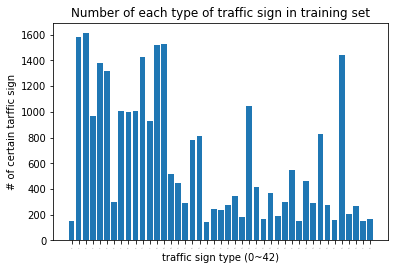

[57, 636, 638, 439, 599, 542, 120, 430, 414, 462, 586, 391, 582, 631, 262, 185, 129, 331, 385, 64, 119, 95, 112, 162, 88, 453, 188, 71, 168, 78, 153, 232, 87, 224, 128, 369, 115, 55, 629, 97, 95, 87, 74]


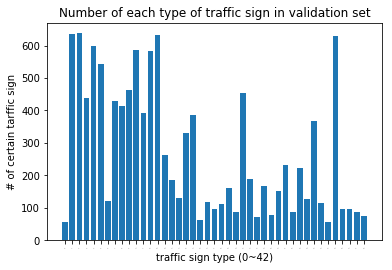

18


In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
# Testing set visualization 43 type of traffic sign numbers using bar 
train_labels_count = []
for i in range(n_classes):
    train_labels_count.append(train_labels.count(i))
print(train_labels_count)

y_pos = np.arange(n_classes)
plt.bar(y_pos, train_labels_count)
plt.xlabel('traffic sign type (0~42)', fontsize=10)
plt.ylabel('# of certain tarffic sign', fontsize=10)
plt.xticks(y_pos, fontsize=1, rotation=30)
plt.title('Number of each type of traffic sign in training set')
plt.show()

# Validation set visualization 43 type of traffic sign numbers using bar 
validation_labels_count = []
for i in range(n_classes):
    validation_labels_count.append(validation_labels.count(i))
print(validation_labels_count)

y_pos = np.arange(n_classes)
plt.bar(y_pos, validation_labels_count)
plt.xlabel('traffic sign type (0~42)', fontsize=10)
plt.ylabel('# of certain tarffic sign', fontsize=10)
plt.xticks(y_pos, fontsize=1, rotation=30)
plt.title('Number of each type of traffic sign in validation set')
plt.show()

plt.figure(figsize=(1,1))
print(train_labels[1])
plt.imshow(train_imgs[1], cmap="gray")

%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.



### Model Architecture

In [6]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def partyNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


#### Input and labels

In [7]:
x = tf.placeholder(tf.float32,[None, 32, 32, 3])
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

#### Set up the Neural Network to a entity 

In [8]:
rate = 0.001

logits = partyNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Preparation for evaluation 

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.

EPOCHS = 10
BATCH_SIZE = 128
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(train_imgs)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #x_train, y_train = shuffle(train_imgs, train_labels)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_imgs[offset:end], train_labels[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(validation_imgs, validation_labels)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './partyNet')
    print("Model saved")
    
# This cell takes about one minute 

Training...

EPOCH 1 ...
Validation Accuracy = 0.823

EPOCH 2 ...
Validation Accuracy = 0.931

EPOCH 3 ...
Validation Accuracy = 0.951

EPOCH 4 ...
Validation Accuracy = 0.960

EPOCH 5 ...
Validation Accuracy = 0.959

EPOCH 6 ...
Validation Accuracy = 0.963

EPOCH 7 ...
Validation Accuracy = 0.971

EPOCH 8 ...
Validation Accuracy = 0.978

EPOCH 9 ...
Validation Accuracy = 0.980

EPOCH 10 ...
Validation Accuracy = 0.984

Model saved


In [ ]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")